# Introduction

## Final Project Submission

Please fill out:
* Student name: Morgan Jones
* Student pace: Full Time
* Scheduled project review date/time: 2/18/20 4:00pm EST
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Initial Discovery
Microsoft is interested in creating a new movie studio, and has hired me to *help the company better understand the movie industry*. The key question Microsoft wants answered through data analysis is: 
What **type** of **films** are currently doing the **best** at the **box office**
Upon answering this question, they would like me to translate these findings into **actionable insights** for the studio to use when deciding what films they would like to make.

Words that are in bold will be the main focus throughout this project. Here we will make assessments on films with the following definition of standards:

- Type: There are several categories which be explored, for example the genre, runtime, release date, rating, production budget, etc.
- Best: For general purposes, we will consider best performance at the box office as those movies that return the highest gross at the box office.
- Actionable Insights: Upon exploration, the analysis will yield a plan of action, incorporating the insights gained from the data.

## Methodology

This project will take an in-depth look into data describing the film industry and its current trends. The process to make this exploration will be:

   - Import libraries
   - Gather data/Read in dataframes
   - Clean Data: 
           - Check for null values
           - Impute or drop null values
           - Check for duplicate values
           - Drop duplicates
           - Join dataframes where necessary
   - Ask Question 1
       - EDA 1: 
           - Conduct feature engineering where necessary
           - Make visualizations
           - Assess for valuable correlations
           - Summarize findings
   - Ask Question 2 
       - EDA 2:
           - Conduct feature engineering where necessary
           - Make visualizations
           - Assess for valuable correlations
           - Summarize findings
   - Ask Question 3 
       - EDA 3: 
           - Conduct feature engineering where necessary
           - Make visualizations
           - Assess for valuable correlations
           - Summarize findings
   - Conclusion
       - Conclude findings
       - Offer recommendations

## Import Libraries & Modules

The beginning of the project involves importing the libraries used throughout the project that do all the heavy lifting, we may call others throughout the notebook but among the first we will import are:

    - Pandas: a data analysis library we will use for its data structures and operations for manipulating numerical tables.
    - Numpy: an essential library for scientific computing in python
    - Matplotlib: a plotting library useful for making the graphs and visualizations we need.
    - Seaborn: a data visualization library based on matplotlib to make graphs more visually appealing.
    - Glob: a module for generating lists of files, and will prove useful when reading in our dataframes.
    - OS: a module which will enable us to use operating system dependent functionality.
    - Warnings: a filter used to suppress certain warning messages created from the output of 'iffy' commands.

In [1]:
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt
import seaborn as sns  # Alias seaborn to be referred to as sns
from glob import glob
import os

# Magic funtion to allow plot outputs to appear and be stored within out notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

As a side note *%matplotlib inline* is called to execute the backend setup of jupyter to allow for out matplotlib plots to be shown and stored within the notebook. Inline is called so the plot is displayed under the producing cell.

These will be the initial libraries we import, with more to come as we go along.

## Read in Initial Dataframes

In order to help Microsoft *better understand the film industry* we will need data. Here we will read in a collection of dataframes that describe the current state of the film industry to glean actionable insights. We have been provided with a zipped folder of several dataframes collected from the internet. Using pandas, we can access the files using the read_csv method.

In [2]:
# We can access a dataset we have collected using pandas pd.read_csv method
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
# Get a glance at the first 25 instances of the dataframe.
df_budget.head(25)

id  release_date                                             movie  \
0    1  Dec 18, 2009                                            Avatar   
1    2  May 20, 2011       Pirates of the Caribbean: On Stranger Tides   
2    3   Jun 7, 2019                                      Dark Phoenix   
3    4   May 1, 2015                           Avengers: Age of Ultron   
4    5  Dec 15, 2017                 Star Wars Ep. VIII: The Last Jedi   
5    6  Dec 18, 2015              Star Wars Ep. VII: The Force Awakens   
6    7  Apr 27, 2018                            Avengers: Infinity War   
7    8  May 24, 2007        Pirates of the Caribbean: At Worldâs End   
8    9  Nov 17, 2017                                    Justice League   
9   10   Nov 6, 2015                                           Spectre   
10  11  Jul 20, 2012                             The Dark Knight Rises   
11  12  May 25, 2018                           Solo: A Star Wars Story   
12  13   Jul 2, 2013                                   The Lone Ranger   
13  14   Mar 9, 2012                                       John Carter   
14  15  Nov 24, 2010                                           Tangled   
15  16   May 4, 2007                                      Spider-Man 3   
16  17   May 6, 2016                        Captain America: Civil War   
17  18  Mar 25, 2016                Batman v Superman: Dawn of Justice   
18  19  Dec 14, 2012                 The Hobbit: An Unexpected Journey   
19  20  Jul 15, 2009            Harry Potter and the Half-Blood Prince   
20  21  Dec 13, 2013               The Hobbit: The Desolation of Smaug   
21  22  Dec 17, 2014         The Hobbit: The Battle of the Five Armies   
22  23  Apr 14, 2017                           The Fate of the Furious   
23  24  Jun 28, 2006                                  Superman Returns   
24  25  May 26, 2017  Pirates of the Caribbean: Dead Men Tell No Tales   

   production_budget domestic_gross worldwide_gross  
0       $425,000,000   $760,507,625  $2,776,345,279  
1       $410,600,000   $241,063,875  $1,045,663,875  
2       $350,000,000    $42,762,350    $149,762,350  
3       $330,600,000   $459,005,868  $1,403,013,963  
4       $317,000,000   $620,181,382  $1,316,721,747  
5       $306,000,000   $936,662,225  $2,053,311,220  
6       $300,000,000   $678,815,482  $2,048,134,200  
7       $300,000,000   $309,420,425    $963,420,425  
8       $300,000,000   $229,024,295    $655,945,209  
9       $300,000,000   $200,074,175    $879,620,923  
10      $275,000,000   $448,139,099  $1,084,439,099  
11      $275,000,000   $213,767,512    $393,151,347  
12      $275,000,000    $89,302,115    $260,002,115  
13      $275,000,000    $73,058,679    $282,778,100  
14      $260,000,000   $200,821,936    $586,477,240  
15      $258,000,000   $336,530,303    $894,860,230  
16      $250,000,000   $408,084,349  $1,140,069,413  
17      $250,000,000   $330,360,194    $867,500,281  
18      $250,000,000   $303,003,568  $1,017,003,568  
19      $250,000,000   $302,089,278    $935,213,767  
20      $250,000,000   $258,366,855    $960,366,855  
21      $250,000,000   $255,119,788    $945,577,621  
22      $250,000,000   $225,764,765  $1,234,846,267  
23      $232,000,000   $200,120,000    $374,085,065  
24      $230,000,000   $172,558,876    $788,241,137

Here we can see the features our dataframe has describing the first 25 film instances. It would appear that the dataframe is already ordered by production budget, in a descending fashion. This is very helpful information, however because we have several dataframes to read in, let's use another more effecient method. to read them in at once. For this we can use glob, a useful library which can make a list of filenames that all have a certain extension, such as the dataframes that are in our zippedData folder.

In [4]:
# Use glob to create a list of the datasets we have, to bypass reading in each dataset individually.
csv_files = glob('./zippedData/*.csv.gz')
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [5]:
# Now we have a list of 9 datasets with information describing the film industry,
# lets confirm that it is indeed a list.
type(csv_files)

list

To make handling the dataframes easier, we should convert this list into a dictionary, where each key is a separate file and the values are the contents of each file, i.e. the dataframe.

In [6]:
# First we will make an empty dictionary.
d = {}

# Now lets make a for loop that iterates through our csv_files list, 
# taking each file and inserting it into the dictionary.
for file in csv_files:
    # take each element of csv_files, insert into the dict, read in element
    d[file] = pd.read_csv(file)

In [7]:
# Take a look at the the keys and values of our new dictionary.
print(d.keys())
print(d.values())

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])
dict_values([                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                   

As we can see, our dictionary now has the dataset titles and their values. However, we can clean up the file names with dictionary and for loop.

In [8]:
# Make new dict to insert elements into
csv_files_dict = {}
# Iterate through csv_files dictionary
for filename in csv_files:
    # os.path.basename method to get the basename in path:
    filename_cleaned = os.path.basename(
        # replace filetype in name with nothing, deleting it
        # .'s are not allowed in variable names in python change to _
        filename).replace(".csv", "").replace(".", "_")
    # make a new dataframe with freshly made dataframes.
    # index_col=0 changes the index of each dataframe to the first element.
    filename_df = pd.read_csv(filename, index_col=0)
    # Place this new dataframe into our dict, and make this a dataframe.
    csv_files_dict[filename_cleaned] = filename_df

In [9]:
# Check type of csv_files_dict is still a dictionary.
type(csv_files_dict)

dict

In [10]:
# Check that our new dataframe is a dataframe.
type(csv_files_dict[filename_cleaned])

pandas.core.frame.DataFrame

Now we should have very clean and concise names for our datasets, let's take a look.

In [11]:
# Look at the keys of the dictionary.
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

Great, we now have a collection of dataframes we can use to start answering our first question. Before we can harness their power, they first need to be cleaned. Let's begin by taking a look at their structure, what columns they contain, and if there are any missing or duplicated values. If there are, we will need to remove or augment them before moving forward.

## Clean data

To begin cleaning our data, we first need to take a look at a dataframe we intend to use individually to get an understanding of what kind of cleaning it will need. To get an idea of the data we have, let's take a look at the first dataframe in our dictionary.

In [12]:
# We can get a glipse of what the dataframe looks like using the head method.
csv_files_dict['bom_movie_gross_gz'].head(10)

studio  domestic_gross  \
title                                                                
Toy Story 3                                     BV     415000000.0   
Alice in Wonderland (2010)                      BV     334200000.0   
Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
Inception                                       WB     292600000.0   
Shrek Forever After                           P/DW     238700000.0   
The Twilight Saga: Eclipse                    Sum.     300500000.0   
Iron Man 2                                    Par.     312400000.0   
Tangled                                         BV     200800000.0   
Despicable Me                                 Uni.     251500000.0   
How to Train Your Dragon                      P/DW     217600000.0   

                                            foreign_gross  year  
title                                                            
Toy Story 3                                     652000000  2010  
Alice in Wonderland (2010)                      691300000  2010  
Harry Potter and the Deathly Hallows Part 1     664300000  2010  
Inception                                       535700000  2010  
Shrek Forever After                             513900000  2010  
The Twilight Saga: Eclipse                      398000000  2010  
Iron Man 2                                      311500000  2010  
Tangled                                         391000000  2010  
Despicable Me                                   291600000  2010  
How to Train Your Dragon                        277300000  2010

In [13]:
# The info method will return the column names, value counts for each column,
# and the datatype of the values in each column of the dataframe.
csv_files_dict['bom_movie_gross_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [14]:
# The shape attribute will tell us the complete structure of the dataframe.
csv_files_dict['bom_movie_gross_gz'].shape

(3387, 4)

Great our dataframe has lots to offer, however its name is a bit cumbersome. Let's rename it something a little more accessible and easier to use as we progress.

In [15]:
# Reassign the vairable name.
movie_gross_df = csv_files_dict['bom_movie_gross_gz']

We can see *movie_gross_df* has lots of missing values, to confirm we can use the isnull method chained with the values attribute and any method.

In [16]:
# Return a boolean stating if any of the values are null.
movie_gross_df.isnull().values.any()

True

In [17]:
# We will need to get the exact count and percentage of missing values to 
# determine how to resolve the issue of their absence.
movie_gross_df.isnull().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

While the year column contains all of it's value points, studio, domestic_gross, and foreign_gross are missing values. To get a better idea of what steps should be taken, lets get the percentage of missing values with respect to the total.

In [18]:
# Create a new variable to represent the percentage of missing values, get the
# total of null values and divide number by total instances.
miss_studio = (movie_gross_df['studio'].isnull().sum()
               / len(movie_gross_df)) * 100
# Make a readable statement to express the percentage of missing values.
print("The percentage of missing studio values is {}%.".format(round(miss_studio, 2)))

The percentage of missing studio values is 0.15%.


Only about a tenth of a percent of values are missing from the studio column. With such a small amount, we can remove these rows without missing much data. To remove these points, we can make use of the dropna method. We will keep in mind that df.dropna() by default returns a new dataset without NaN values. So, we have to assign it to a variable.

In [19]:
# Make a new dataframe without these null values but with same name as original.
movie_gross_df = movie_gross_df.dropna(subset=['studio'])

When dropping rows from a dataset, it's best practice to check that the method worked smoothly and there are no remaining null values in the specified column. Let's check for this now.

In [20]:
# Get total of null values in entire dataframe.
movie_gross_df.isnull().sum()

studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

Notice that in deleting some of the missing rows in the studio column, we have also deleted some rows in the other columns. We can now correct the missing values for the other gross columns. However, it would appear that we will need to find the percentage of missing values for potentially several columns in other dataframes. Let's make a function that we can call in the future to make this process quicker.

In [21]:
# Make a function that takes in a column of df and a df, returns percentage
# of values missing in that column.
def miss_per(column, df):
    """returns the percentage of missing values from a colum in a dataframe"""
    # get the total of null values and divide number by total instances.
    percentage_missing = (column.isnull().sum() / len(df)) * 100
    # return the percentage of values missing
    return percentage_missing

In [22]:
# Now let's test our new function to calculate the percentage of missing values 
# in the domestic gross column.
miss_dom = miss_per(movie_gross_df['domestic_gross'], movie_gross_df)
print("The percentage of missing domestic gross values is {}%.".format(
    round(miss_dom, 2)))

The percentage of missing domestic gross values is 0.77%.


Here we are missing about 3/4th of a percent of the domestic gross values. We can remove these rows as well considering there are so few of them.

In [23]:
# Drop null values from the domestic gross column
movie_gross_df = movie_gross_df.dropna(subset=['domestic_gross'])

In [24]:
# Let's check to make sure that the changes have occurred.
movie_gross_df.isnull().sum()

studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

Lastly we have the foreign_gross missing values, there seem to be more of these. Let's get the exact percentage.

In [25]:
miss_for = miss_per(movie_gross_df['foreign_gross'], movie_gross_df)
print("The percentage of missing foreign gross values is {}%.".format(
    round(miss_for, 2)))

The percentage of missing foreign gross values is 40.2%.


Missing 40% of data points is no laughing matter. We have to decide between deleting the entire column or filling in the missing values with another value. Because there are so many values missing, we will drop this column, and perhaps gain information on foreign/international gross earnings via another data source.

In [26]:
# Drop the foreign gross column from the dataframe
movie_gross_df = movie_gross_df.drop('foreign_gross', 1)

In [27]:
# Check that the foreign gross column has been dropped.
movie_gross_df.isnull().sum()

studio            0
domestic_gross    0
year              0
dtype: int64

We no longer have any missing values in this dataframe, now let's make sure there are no duplicate values in the dataframe using the duplicated method.

In [28]:
# Return a boolean stating if any values that are duplicated.
movie_gross_df.duplicated().values.any()

True

In [29]:
# Use a sum method chain to get total of duplicated values.
movie_gross_df.duplicated().sum()

30

In [30]:
# Remove the duplicated values with the drop duplicates method.
# Set keep to false to release all instances of the duplicate.
# Set inplace to True to remove rows with duplicates and
# save changes in place within current dataframe.
movie_gross_df.drop_duplicates(subset="domestic_gross", keep= False, inplace=True)

In [31]:
# Now we check to make sure there are no more duplicate values.
movie_gross_df.duplicated().values.any()

False

Great, this dataset has been cleaned and we can take a look to see how films have performed in the domestic gross category.

In [32]:
# View first 25 rows of dataframe.
movie_gross_df.head(25)

studio  domestic_gross  \
title                                                                         
Toy Story 3                                              BV     415000000.0   
Harry Potter and the Deathly Hallows Part 1              WB     296000000.0   
Inception                                                WB     292600000.0   
The Twilight Saga: Eclipse                             Sum.     300500000.0   
Iron Man 2                                             Par.     312400000.0   
Tangled                                                  BV     200800000.0   
Despicable Me                                          Uni.     251500000.0   
How to Train Your Dragon                               P/DW     217600000.0   
Clash of the Titans (2010)                               WB     163200000.0   
The Chronicles of Narnia: The Voyage of the Daw...      Fox     104400000.0   
The King's Speech                                     Wein.     135500000.0   
Tron Legacy                                              BV     172100000.0   
The Karate Kid                                         Sony     176600000.0   
Prince of Persia: The Sands of Time                      BV      90800000.0   
Black Swan                                             FoxS     107000000.0   
Robin Hood                                             Uni.     105300000.0   
The Last Airbender                                     Par.     131800000.0   
Salt                                                   Sony     118300000.0   
Sex and the City 2                                  WB (NL)      95300000.0   
The Tourist                                            Sony      67600000.0   
Grown Ups                                              Sony     162000000.0   
Knight & Day                                            Fox      76400000.0   
True Grit                                              Par.     171200000.0   
Gulliver's Travels                                      Fox      42800000.0   
Percy Jackson & The Olympians: The Lightning Thief      Fox      88800000.0   

                                                    year  
title                                                     
Toy Story 3                                         2010  
Harry Potter and the Deathly Hallows Part 1         2010  
Inception                                           2010  
The Twilight Saga: Eclipse                          2010  
Iron Man 2                                          2010  
Tangled                                             2010  
Despicable Me                                       2010  
How to Train Your Dragon                            2010  
Clash of the Titans (2010)                          2010  
The Chronicles of Narnia: The Voyage of the Daw...  2010  
The King's Speech                                   2010  
Tron Legacy                                         2010  
The Karate Kid                                      2010  
Prince of Persia: The Sands of Time                 2010  
Black Swan                                          2010  
Robin Hood                                          2010  
The Last Airbender                                  2010  
Salt                                                2010  
Sex and the City 2                                  2010  
The Tourist                                         2010  
Grown Ups                                           2010  
Knight & Day                                        2010  
True Grit                                           2010  
Gulliver's Travels                                  2010  
Percy Jackson & The Olympians: The Lightning Thief  2010

It would appear that all of the films in this dataframe have been released in the year 2010, this will not be so useful to us if it is the case. Lets check by looking at the unique values in the year column.

In [33]:
# Return an array of all the various values found in the year column.
movie_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

Wonderful, we simply need to organize the dataframe by another column, lets use domestic gross.

In [34]:
# Sort the rows based on the descending order of the domestic gross values
top_gross = movie_gross_df.sort_values(by=['domestic_gross'], ascending=False)
# View the 25 highest grossing films of the dataframe.
top_gross.head(25)

studio  domestic_gross  year
title                                                                   
Star Wars: The Force Awakens                    BV     936700000.0  2015
Black Panther                                   BV     700100000.0  2018
Avengers: Infinity War                          BV     678800000.0  2018
Jurassic World                                Uni.     652300000.0  2015
Marvel's The Avengers                           BV     623400000.0  2012
Star Wars: The Last Jedi                        BV     620200000.0  2017
Incredibles 2                                   BV     608600000.0  2018
Rogue One: A Star Wars Story                    BV     532200000.0  2016
Beauty and the Beast (2017)                     BV     504000000.0  2017
Finding Dory                                    BV     486300000.0  2016
Avengers: Age of Ultron                         BV     459000000.0  2015
The Dark Knight Rises                           WB     448100000.0  2012
The Hunger Games: Catching Fire                LGF     424700000.0  2013
Jurassic World: Fallen Kingdom                Uni.     417700000.0  2018
Toy Story 3                                     BV     415000000.0  2010
Wonder Woman                                    WB     412600000.0  2017
Iron Man 3                                      BV     409000000.0  2013
Captain America: Civil War                      BV     408100000.0  2016
The Hunger Games                               LGF     408000000.0  2012
Jumanji: Welcome to the Jungle                Sony     404500000.0  2017
Frozen                                          BV     400700000.0  2013
Guardians of the Galaxy Vol. 2                  BV     389800000.0  2017
Harry Potter and the Deathly Hallows Part 2     WB     381000000.0  2011
The Secret Life of Pets                       Uni.     368400000.0  2016
Despicable Me 2                               Uni.     368100000.0  2013

We can see from this dataframe the top 25 grossing films between year 2010 to 2018. Upon initial review, some characteristics that many of these 25 films share are having a story based on a content that has been created years to decades ago, having time to have built a large fanbase. Many of these films belong to a comic book universe, or are a sequel or even part of a trilogy in some cases. In fact 23 of the 25 fit in this column, that is a 0.92 correlation. This could be something to explore further.

This could be commmon among a particular genre, as it would appear that most of the films in this top 25 are of the Action/Adventure genre.

Lets take a look at the 25 worst performing films by domestic gross to find further support for this claim.

In [35]:
# View the bottom films by domestic gross of the dataframe.
top_gross.tail(25)

studio  \
title                                                            
Suntan                                                  Strand   
Barely Lethal                                              A24   
Las Acacias                                               OutF   
2 Autumns, 3 Winters                                        FM   
Liar's Autobiography                                       BSM   
Tomorrow When the War Began                               Free   
Jenny's Wedding                                            IFC   
Anna                                                        VE   
To Die Like a Man                                       Strand   
Beyond Outrage                                           Magn.   
Sleepless Night                                          Trib.   
Age of Uprising: The Legend of Michael Kohlhaas...        MBox   
In Harmony                                            Distrib.   
Blood Ties                                                 ALP   
The Swan                                            Synergetic   
As Good as Dead                                          First   
Love, Wedding, Marriage                                    IFC   
Open Windows                                             Cdgm.   
In Her Name (Au nom de ma fille)                      Distrib.   
Skin Trade                                               Magn.   
Caught in the Web                                        Vita.   
Khumba                                                     MNE   
Death of a Superhero                                     Trib.   
Max & Leon                                            Distrib.   
Storage 24                                               Magn.   

                                                    domestic_gross  year  
title                                                                     
Suntan                                                      6600.0  2017  
Barely Lethal                                               6100.0  2015  
Las Acacias                                                 6000.0  2012  
2 Autumns, 3 Winters                                        5800.0  2014  
Liar's Autobiography                                        5100.0  2012  
Tomorrow When the War Began                                 4900.0  2012  
Jenny's Wedding                                             4700.0  2015  
Anna                                                        4300.0  2014  
To Die Like a Man                                           4000.0  2011  
Beyond Outrage                                              3900.0  2014  
Sleepless Night                                             3400.0  2012  
Age of Uprising: The Legend of Michael Kohlhaas...          3300.0  2014  
In Harmony                                                  3100.0  2016  
Blood Ties                                                  2800.0  2011  
The Swan                                                    2400.0  2018  
As Good as Dead                                             2000.0  2010  
Love, Wedding, Marriage                                     1900.0  2011  
Open Windows                                                1800.0  2014  
In Her Name (Au nom de ma fille)                            1600.0  2016  
Skin Trade                                                  1200.0  2015  
Caught in the Web                                           1100.0  2013  
Khumba                                                      1000.0  2013  
Death of a Superhero                                         600.0  2012  
Max & Leon                                                   500.0  2017  
Storage 24                                                   100.0  2013

As these 25 films are not as popular, it took some research to discover whether or not many of these films belong to the previous content group. As hypothesized few of these films do, to be exact 5 of the 25 have a story based on content that had been previously made. Lets see if genre has any relevance to a film's gross.

However, before we continue it would be advantageous to clean and prepare more data to answer our first question. Lets take a wider view of all of the datasets to find those that would be useful in answering our question.

In [36]:
# Here a for loop can be used to iterate through each file in the dictionary 
# of dataframes to print the title, and columns belonging to each dataframe.
for item in csv_files_dict.items():
        # make a seperating line for readability
        print("===============New DF===============")
        # print the name of the dataframe
        print(item[0])
        # return the column description of the dataframe
        print(item[1].info())
        # make a seperating line for readability
        print("================End DF===============")

===============New DF===============
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.3+ KB
None
================End DF===============
===============New DF===============
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
================End DF===============
===============New DF===============
imdb_title_akas_gz
<class '

Upon comparing the dataframes by their columns, it appears that those from IMDB (International Movie Database) contain a more complete picture of films when put together. Lets clean these dataframes and join them, and use this new dataframe to answer our first question. Specifically, lets use those focused on the film itself and not the crew, these seem to be imdb.title.ratings, and imdb.title.basics.

However, these two dataframes do not contain any data related to budget, or gross. To resolve this we can join them with the tn.movie_budgets dataframe once we have completed the cleaning stage.

Also, lets rename our dataframe so it has a more concise name.

In [37]:
# We can also check for the type to ensure we will be able to make the join
imdb_titles = csv_files_dict['imdb_title_basics_gz']
type(imdb_titles)

pandas.core.frame.DataFrame

In [38]:
# We will again start working with the dataframe by first taking a sample.
imdb_titles.head(10)

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   
tt0111414                      A Thin Life                 A Thin Life   
tt0112502                          Bigfoot                     Bigfoot   
tt0137204                  Joe Finds Grace             Joe Finds Grace   
tt0139613                       O Silêncio                  O Silêncio   
tt0144449            Nema aviona za Zagreb       Nema aviona za Zagreb   

           start_year  runtime_minutes                      genres  
tconst                                                              
tt0063540        2013            175.0          Action,Crime,Drama  
tt0066787        2019            114.0             Biography,Drama  
tt0069049        2018            122.0                       Drama  
tt0069204        2018              NaN                Comedy,Drama  
tt0100275        2017             80.0        Comedy,Drama,Fantasy  
tt0111414        2018             75.0                      Comedy  
tt0112502        2017              NaN             Horror,Thriller  
tt0137204        2017             83.0  Adventure,Animation,Comedy  
tt0139613        2012              NaN         Documentary,History  
tt0144449        2012             82.0                   Biography

In [39]:
# lets view the columns and their structure
imdb_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [40]:
# There are some missing values so lets get the percentage to properly manage them.
imdb_titles.isnull().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Original title is not a column we are particularly interested in, because we will only use one title per film, lets only use the primary title which was given upon release and drop this column.


In [41]:
# Drop the redundant title column.
imdb_titles = imdb_titles.drop('original_title', 1)

In [42]:
# Again we check that everything has worked as expected.
imdb_titles.isnull().sum()

primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [43]:
# We can check the percentage of the missing values in the genres column.
miss_gen = miss_per(imdb_titles['genres'], imdb_titles)
print("The percentage of missing genre values is {}%.".format(round(miss_gen, 2)))

The percentage of missing genre values is 3.7%.


With 3.7% of values missing, lets drop those rows.

In [44]:
# Drop those missing values in the genres column.
imdb_titles = imdb_titles.dropna(subset=['genres'])

In [45]:
# We double check that everything worked.
imdb_titles.isnull().sum()

primary_title          0
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [46]:
# Lets check the percentage of missing runtime_minutes values
miss_min = miss_per(imdb_titles['runtime_minutes'], imdb_titles)
print("The percentage of missing runtime minute values is {}%.".format(
    round(miss_min, 2)))

The percentage of missing runtime minute values is 20.25%.


While 21% is fairly high for missing data, this feature may prove useful, lets fill the missing values with the median value of the runtime minutes. This can be achieved using the fillna method.

In [47]:
# Out of curiosity, what is the median value for runtime minutes?
imdb_titles.median()

start_year         2015.0
runtime_minutes      87.0
dtype: float64

87 minutes is just about an hour and a half, this does seem to be a common length for a film. Lets impute this value where we have none. Here we chose the median to combat against the warping effects of outliers on the data.

In [48]:
# Fill the missing valules with the median of runtime minutes, and set inplace
# to true to apply this for all missing values and save changes to df.
imdb_titles['runtime_minutes'].fillna(
    value=imdb_titles['runtime_minutes'].median(), inplace=True)

In [49]:
# We can check that this has eliminated our missing runtime minute values.
imdb_titles.isnull().sum()

primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [50]:
# Now check if there are any duplicates within the dataframe.
imdb_titles.duplicated().values.any()

True

In [51]:
# How many duplicated values?
imdb_titles.duplicated().sum()

121

In [52]:
# Lets drop these 121 duplicated rows.
# Set keep to false to release all instances of the duplicate.
# Set inplace to True to remove rows with duplicates and
# save changes in place within current dataframe.
imdb_titles.drop_duplicates(keep = False, inplace = True)

In [53]:
# Check to make sure there are no more duplicate values.
imdb_titles.duplicated().values.any()

False

In [54]:
# Review our dataframe once more to confirm all changes have been applied.
imdb_titles.head()

primary_title  start_year  runtime_minutes  \
tconst                                                                    
tt0063540                        Sunghursh        2013            175.0   
tt0066787  One Day Before the Rainy Season        2019            114.0   
tt0069049       The Other Side of the Wind        2018            122.0   
tt0069204                  Sabse Bada Sukh        2018             87.0   
tt0100275         The Wandering Soap Opera        2017             80.0   

                         genres  
tconst                           
tt0063540    Action,Crime,Drama  
tt0066787       Biography,Drama  
tt0069049                 Drama  
tt0069204          Comedy,Drama  
tt0100275  Comedy,Drama,Fantasy

Now that this dataframe has been cleaned, lets clean our next imdb dataframe.

In [55]:
# Take a glance at the dataframe.
csv_files_dict['imdb_title_ratings_gz'].head()

averagerating  numvotes
tconst                             
tt10356526            8.3        31
tt10384606            8.9       559
tt1042974             6.4        20
tt1043726             4.2     50352
tt1060240             6.5        21

In [56]:
# View how many instances there are and datatypes of columns.
csv_files_dict['imdb_title_ratings_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [57]:
# Lets change the name of this dataframe as well.
imdb_ratings = csv_files_dict['imdb_title_ratings_gz']

We can see that there are no missing values, lets confirm this and move on to checking for duplicated values.

In [58]:
# Confirm the total of values that are null.
imdb_ratings.isnull().values.sum()

0

In [59]:
# Check for duplicates.
imdb_ratings.duplicated().values.any()

True

In [60]:
# Okay there are some, now how many?
imdb_ratings.duplicated().values.sum()

45074

That is a lot of duplicates, over half actually. Lets get the exact percentage.

In [61]:
# Calculate the percentage of missing values in the dataframe
dup_val = (imdb_ratings.duplicated().values.sum() / len(imdb_ratings)) * 100
print("The percentage of duplicate values is {}%.".format(
    round(dup_val, 2)))

The percentage of duplicate values is 61.03%.


With this many values duplicated in our dataframe, we will not use it in our join. Lets instead focus on cleaning our dataframe with budget and gross information, and combine this with imdb_title.

In [62]:
# Sample the dataframe
csv_files_dict['tn_movie_budgets_gz'].head()

release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget domestic_gross worldwide_gross  
id                                                   
1       $425,000,000   $760,507,625  $2,776,345,279  
2       $410,600,000   $241,063,875  $1,045,663,875  
3       $350,000,000    $42,762,350    $149,762,350  
4       $330,600,000   $459,005,868  $1,403,013,963  
5       $317,000,000   $620,181,382  $1,316,721,747

In [63]:
# View the structure of the columns and datatypes in the dataframe.
csv_files_dict['tn_movie_budgets_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [64]:
# Rename the dataframe to make things a bit easier
movie_budgets = csv_files_dict['tn_movie_budgets_gz']
type(movie_budgets)

pandas.core.frame.DataFrame

This dataframe may prove to be more useful than the movie_gross_df we were working with earlier. It has more columns, including production budget and worldwide gross, as well as more instances. Lets confirm this by checking for null and duplicated values.

In [65]:
# Return boolean for if any values are null.
movie_budgets.isnull().values.any()

False

Yes! No null values, lets check for duplicates

In [66]:
# Return boolean for any values that are duplicates
movie_budgets.duplicated().values.any()

False

Great! That is a first for us in the project, our dataframe comes squeaky clean. Now that we have the cleaned dataframes we will use, i.e. movie budgets and imdb_titles we can join them to make a single super descriptive dataframe that can more accurately answer our first question.

In order to join these two dataframes, some changes will first have to be made. We will join the dataframes on a column that is found in both dataframes. At the moment no such column exists. To fix this lets make both dataframes have the column 'movie'. We can use the rename method to make this adjustment. Next we can change the index of each dataframe to be the movie column. After changing this we can join the dataframes on the movie column.

In [67]:
# Rename the primary title column to movies, save changes to dataframe with 
# inplace set to true.
imdb_titles.rename(columns={'primary_title': 'movie'}, inplace=True)
# Check that the changes took place.
imdb_titles.head()

movie  start_year  runtime_minutes  \
tconst                                                                    
tt0063540                        Sunghursh        2013            175.0   
tt0066787  One Day Before the Rainy Season        2019            114.0   
tt0069049       The Other Side of the Wind        2018            122.0   
tt0069204                  Sabse Bada Sukh        2018             87.0   
tt0100275         The Wandering Soap Opera        2017             80.0   

                         genres  
tconst                           
tt0063540    Action,Crime,Drama  
tt0066787       Biography,Drama  
tt0069049                 Drama  
tt0069204          Comedy,Drama  
tt0100275  Comedy,Drama,Fantasy

In [68]:
# Now change the index from tconst to movie with the set_index method. Set index
# to true so that the changes are saved in the dataframe.
imdb_titles.set_index('movie', inplace=True)
# Ensure the changes have taken place.
imdb_titles.head()

start_year  runtime_minutes  \
movie                                                          
Sunghursh                              2013            175.0   
One Day Before the Rainy Season        2019            114.0   
The Other Side of the Wind             2018            122.0   
Sabse Bada Sukh                        2018             87.0   
The Wandering Soap Opera               2017             80.0   

                                               genres  
movie                                                  
Sunghursh                          Action,Crime,Drama  
One Day Before the Rainy Season       Biography,Drama  
The Other Side of the Wind                      Drama  
Sabse Bada Sukh                          Comedy,Drama  
The Wandering Soap Opera         Comedy,Drama,Fantasy

Okay, now that movie is the index for this dataframe, lets make similar adjustments for our movie_budgets dataframe. We can begin by using the set_index method we used on the imdb_titles dataframe.

In [69]:
# Now change the index from tconst to movie with the set_index method. Set index
# to true so that the changes are saved in the dataframe.
movie_budgets.set_index('movie', inplace=True)
# Make sure the changes have taken place.
movie_budgets.head(25)

release_date  \
movie                                                            
Avatar                                            Dec 18, 2009   
Pirates of the Caribbean: On Stranger Tides       May 20, 2011   
Dark Phoenix                                       Jun 7, 2019   
Avengers: Age of Ultron                            May 1, 2015   
Star Wars Ep. VIII: The Last Jedi                 Dec 15, 2017   
Star Wars Ep. VII: The Force Awakens              Dec 18, 2015   
Avengers: Infinity War                            Apr 27, 2018   
Pirates of the Caribbean: At Worldâs End        May 24, 2007   
Justice League                                    Nov 17, 2017   
Spectre                                            Nov 6, 2015   
The Dark Knight Rises                             Jul 20, 2012   
Solo: A Star Wars Story                           May 25, 2018   
The Lone Ranger                                    Jul 2, 2013   
John Carter                                        Mar 9, 2012   
Tangled                                           Nov 24, 2010   
Spider-Man 3                                       May 4, 2007   
Captain America: Civil War                         May 6, 2016   
Batman v Superman: Dawn of Justice                Mar 25, 2016   
The Hobbit: An Unexpected Journey                 Dec 14, 2012   
Harry Potter and the Half-Blood Prince            Jul 15, 2009   
The Hobbit: The Desolation of Smaug               Dec 13, 2013   
The Hobbit: The Battle of the Five Armies         Dec 17, 2014   
The Fate of the Furious                           Apr 14, 2017   
Superman Returns                                  Jun 28, 2006   
Pirates of the Caribbean: Dead Men Tell No Tales  May 26, 2017   

                                                 production_budget  \
movie                                                                
Avatar                                                $425,000,000   
Pirates of the Caribbean: On Stranger Tides           $410,600,000   
Dark Phoenix                                          $350,000,000   
Avengers: Age of Ultron                               $330,600,000   
Star Wars Ep. VIII: The Last Jedi                     $317,000,000   
Star Wars Ep. VII: The Force Awakens                  $306,000,000   
Avengers: Infinity War                                $300,000,000   
Pirates of the Caribbean: At Worldâs End            $300,000,000   
Justice League                                        $300,000,000   
Spectre                                               $300,000,000   
The Dark Knight Rises                                 $275,000,000   
Solo: A Star Wars Story                               $275,000,000   
The Lone Ranger                                       $275,000,000   
John Carter                                           $275,000,000   
Tangled                                               $260,000,000   
Spider-Man 3                                          $258,000,000   
Captain America: Civil War                            $250,000,000   
Batman v Superman: Dawn of Justice                    $250,000,000   
The Hobbit: An Unexpected Journey                     $250,000,000   
Harry Potter and the Half-Blood Prince                $250,000,000   
The Hobbit: The Desolation of Smaug                   $250,000,000   
The Hobbit: The Battle of the Five Armies             $250,000,000   
The Fate of the Furious                               $250,000,000   
Superman Returns                                      $232,000,000   
Pirates of the Caribbean: Dead Men Tell No Tales      $230,000,000   

                                                 domestic_gross  \
movie                                                             
Avatar                                             $760,507,625   
Pirates of the Caribbean: On Stranger Tides        $241,063,875   
Dark Phoenix                                        $42,762,350   
Avengers: Age of Ultron                  

With our dataframes using the same index, we can now effectively join them by using the merge method. We choose the merge method because it is a bit easier to join on columns or indexes, as the index will be passed on to the newly made dataframe.

In [70]:
# Make a new dataframe by merging the two, combining them on the shared
# movie column.
df_movies = pd.merge(movie_budgets, imdb_titles, on='movie')

In [71]:
# View the new dataframe.
df_movies

release_date production_budget  \
movie                                                                         
Avatar                                       Dec 18, 2009      $425,000,000   
Pirates of the Caribbean: On Stranger Tides  May 20, 2011      $410,600,000   
Dark Phoenix                                  Jun 7, 2019      $350,000,000   
Avengers: Age of Ultron                       May 1, 2015      $330,600,000   
Avengers: Infinity War                       Apr 27, 2018      $300,000,000   
...                                                   ...               ...   
Clean                                        Apr 28, 2006           $10,000   
Cure                                          Jul 6, 2001           $10,000   
Newlyweds                                    Jan 13, 2012            $9,000   
Red 11                                       Dec 31, 2018            $7,000   
A Plague So Pleasant                         Sep 29, 2015            $1,400   

                                            domestic_gross worldwide_gross  \
movie                                                                        
Avatar                                        $760,507,625  $2,776,345,279   
Pirates of the Caribbean: On Stranger Tides   $241,063,875  $1,045,663,875   
Dark Phoenix                                   $42,762,350    $149,762,350   
Avengers: Age of Ultron                       $459,005,868  $1,403,013,963   
Avengers: Infinity War                        $678,815,482  $2,048,134,200   
...                                                    ...             ...   
Clean                                             $138,711        $138,711   
Cure                                               $94,596         $94,596   
Newlyweds                                           $4,584          $4,584   
Red 11                                                  $0              $0   
A Plague So Pleasant                                    $0              $0   

                                             start_year  runtime_minutes  \
movie                                                                      
Avatar                                             2011             93.0   
Pirates of the Caribbean: On Stranger Tides        2011            136.0   
Dark Phoenix                                       2019            113.0   
Avengers: Age of Ultron                            2015            141.0   
Avengers: Infinity War                             2018            149.0   
...                                                 ...              ...   
Clean                                              2017             70.0   
Cure                                               2011             93.0   
Newlyweds                                          2011             95.0   
Red 11                                             2019             77.0   
A Plague So Pleasant                               2013             76.0   

                                                               genres  
movie                                                                  
Avatar                                                         Horror  
Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy  
Dark Phoenix                                  Action,Adventure,Sci-Fi  
Avengers: Age of Ultron                       Action,Adventure,Sci-Fi  
Avengers: Infinity War                        Action,Adventure,Sci-Fi  
...                                                               ...  
Clean                                             Comedy,Drama,Horror  
Cure                                                            Drama  
Newlyweds                                                Comedy,Drama  
Red 11                                         Horror,Sci-Fi,Thriller  
A Plague So Pleasant                            Drama,Horror,Thriller  

[3733 rows x 7 columns]

Terrific, we have merged the two dataframes that have data points we can use to answer our first question, it includes very useful features. However we are not quite finished. Now we will need to check the datatypes of our values to make sure we can use them in an effective way.

In [72]:
# The info method will let us know the datatypes in each column.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, Avatar to A Plague So Pleasant
Data columns (total 7 columns):
release_date         3733 non-null object
production_budget    3733 non-null object
domestic_gross       3733 non-null object
worldwide_gross      3733 non-null object
start_year           3733 non-null int64
runtime_minutes      3733 non-null float64
genres               3733 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 233.3+ KB


In [73]:
# Get a look at the dataframe.
df_movies.head()

release_date production_budget  \
movie                                                                         
Avatar                                       Dec 18, 2009      $425,000,000   
Pirates of the Caribbean: On Stranger Tides  May 20, 2011      $410,600,000   
Dark Phoenix                                  Jun 7, 2019      $350,000,000   
Avengers: Age of Ultron                       May 1, 2015      $330,600,000   
Avengers: Infinity War                       Apr 27, 2018      $300,000,000   

                                            domestic_gross worldwide_gross  \
movie                                                                        
Avatar                                        $760,507,625  $2,776,345,279   
Pirates of the Caribbean: On Stranger Tides   $241,063,875  $1,045,663,875   
Dark Phoenix                                   $42,762,350    $149,762,350   
Avengers: Age of Ultron                       $459,005,868  $1,403,013,963   
Avengers: Infinity War                        $678,815,482  $2,048,134,200   

                                             start_year  runtime_minutes  \
movie                                                                      
Avatar                                             2011             93.0   
Pirates of the Caribbean: On Stranger Tides        2011            136.0   
Dark Phoenix                                       2019            113.0   
Avengers: Age of Ultron                            2015            141.0   
Avengers: Infinity War                             2018            149.0   

                                                               genres  
movie                                                                  
Avatar                                                         Horror  
Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy  
Dark Phoenix                                  Action,Adventure,Sci-Fi  
Avengers: Age of Ultron                       Action,Adventure,Sci-Fi  
Avengers: Infinity War                        Action,Adventure,Sci-Fi

Here we can see that some of the columns we expect to be integers are actually strings, such as production_budget, domestic_gross, and worldwide_gross. We can resolve this with a replace method which will remove the dollar sign and commas which are not able to be converted to integers, and then the pandas to_numeric method. Lets do this now.

In [74]:
# Replace dollar sign and commas for production_budget column
df_movies['production_budget'] = df_movies['production_budget'].str.replace(
    '$', '')
df_movies['production_budget'] = df_movies['production_budget'].str.replace(
    ',', '')

In [75]:
# Replace dollar sign and commas for domestic_gross column
df_movies['domestic_gross'] = df_movies['domestic_gross'].str.replace('$', '')
df_movies['domestic_gross'] = df_movies['domestic_gross'].str.replace(',', '')

In [76]:
# Replace dollar sign and commas for world_wide gross column
df_movies['worldwide_gross'] = df_movies['worldwide_gross'].str.replace(
    '$', '')
df_movies['worldwide_gross'] = df_movies['worldwide_gross'].str.replace(
    ',', '')

In [77]:
# Lets check that all of our changes have taken effect.
df_movies.head()

release_date production_budget  \
movie                                                                         
Avatar                                       Dec 18, 2009         425000000   
Pirates of the Caribbean: On Stranger Tides  May 20, 2011         410600000   
Dark Phoenix                                  Jun 7, 2019         350000000   
Avengers: Age of Ultron                       May 1, 2015         330600000   
Avengers: Infinity War                       Apr 27, 2018         300000000   

                                            domestic_gross worldwide_gross  \
movie                                                                        
Avatar                                           760507625      2776345279   
Pirates of the Caribbean: On Stranger Tides      241063875      1045663875   
Dark Phoenix                                      42762350       149762350   
Avengers: Age of Ultron                          459005868      1403013963   
Avengers: Infinity War                           678815482      2048134200   

                                             start_year  runtime_minutes  \
movie                                                                      
Avatar                                             2011             93.0   
Pirates of the Caribbean: On Stranger Tides        2011            136.0   
Dark Phoenix                                       2019            113.0   
Avengers: Age of Ultron                            2015            141.0   
Avengers: Infinity War                             2018            149.0   

                                                               genres  
movie                                                                  
Avatar                                                         Horror  
Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy  
Dark Phoenix                                  Action,Adventure,Sci-Fi  
Avengers: Age of Ultron                       Action,Adventure,Sci-Fi  
Avengers: Infinity War                        Action,Adventure,Sci-Fi

In [78]:
# Use the to_numeric method to change the type of these columns to an integer
df_movies[['production_budget', 'domestic_gross', 'worldwide_gross']] = df_movies[[
    'production_budget', 'domestic_gross', 'worldwide_gross']].apply(pd.to_numeric)

In [79]:
# Ensure the changes have taken place
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, Avatar to A Plague So Pleasant
Data columns (total 7 columns):
release_date         3733 non-null object
production_budget    3733 non-null int64
domestic_gross       3733 non-null int64
worldwide_gross      3733 non-null int64
start_year           3733 non-null int64
runtime_minutes      3733 non-null float64
genres               3733 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 233.3+ KB


In [80]:
# lets get another view of those changes
df_movies.head()

release_date  production_budget  \
movie                                                                          
Avatar                                       Dec 18, 2009          425000000   
Pirates of the Caribbean: On Stranger Tides  May 20, 2011          410600000   
Dark Phoenix                                  Jun 7, 2019          350000000   
Avengers: Age of Ultron                       May 1, 2015          330600000   
Avengers: Infinity War                       Apr 27, 2018          300000000   

                                             domestic_gross  worldwide_gross  \
movie                                                                          
Avatar                                            760507625       2776345279   
Pirates of the Caribbean: On Stranger Tides       241063875       1045663875   
Dark Phoenix                                       42762350        149762350   
Avengers: Age of Ultron                           459005868       1403013963   
Avengers: Infinity War                            678815482       2048134200   

                                             start_year  runtime_minutes  \
movie                                                                      
Avatar                                             2011             93.0   
Pirates of the Caribbean: On Stranger Tides        2011            136.0   
Dark Phoenix                                       2019            113.0   
Avengers: Age of Ultron                            2015            141.0   
Avengers: Infinity War                             2018            149.0   

                                                               genres  
movie                                                                  
Avatar                                                         Horror  
Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy  
Dark Phoenix                                  Action,Adventure,Sci-Fi  
Avengers: Age of Ultron                       Action,Adventure,Sci-Fi  
Avengers: Infinity War                        Action,Adventure,Sci-Fi

Lets order view this new dataframe by the highest worldwide grossing films.

In [81]:
# Order the dataframe by the highest to lowest worldwide gross values.
df_movies = df_movies.sort_values(by=['worldwide_gross'], ascending=False)
# Check the changes.
df_movies.head(25)

release_date  production_budget  \
movie                                                             
Avatar                          Dec 18, 2009          425000000   
Titanic                         Dec 19, 1997          200000000   
Titanic                         Dec 19, 1997          200000000   
Avengers: Infinity War          Apr 27, 2018          300000000   
Jurassic World                  Jun 12, 2015          215000000   
Furious 7                        Apr 3, 2015          190000000   
The Avengers                     May 4, 2012          225000000   
Avengers: Age of Ultron          May 1, 2015          330600000   
Black Panther                   Feb 16, 2018          200000000   
Jurassic World: Fallen Kingdom  Jun 22, 2018          170000000   
Frozen                          Nov 22, 2013          150000000   
Frozen                          Nov 22, 2013          150000000   
Frozen                          Nov 22, 2013          150000000   
Beauty and the Beast            Mar 17, 2017          160000000   
Beauty and the Beast            Mar 17, 2017          160000000   
Beauty and the Beast            Mar 17, 2017          160000000   
Incredibles 2                   Jun 15, 2018          200000000   
The Fate of the Furious         Apr 14, 2017          250000000   
Iron Man 3                       May 3, 2013          200000000   
Minions                         Jul 10, 2015           74000000   
Aquaman                         Dec 21, 2018          160000000   
Captain America: Civil War       May 6, 2016          250000000   
Transformers: Dark of the Moon  Jun 29, 2011          195000000   
Captain Marvel                   Mar 8, 2019          175000000   
Skyfall                          Nov 8, 2012          200000000   

                                domestic_gross  worldwide_gross  start_year  \
movie                                                                         
Avatar                               760507625       2776345279        2011   
Titanic                              659363944       2208208395        2018   
Titanic                              659363944       2208208395        2012   
Avengers: Infinity War               678815482       2048134200        2018   
Jurassic World                       652270625       1648854864        2015   
Furious 7                            353007020       1518722794        2015   
The Avengers                         623279547       1517935897        2012   
Avengers: Age of Ultron              459005868       1403013963        2015   
Black Panther                        700059566       1348258224        2018   
Jurassic World: Fallen Kingdom       417719760       1305772799        2018   
Frozen                               400738009       1272469910        2010   
Frozen                               400738009       1272469910        2013   
Frozen                               400738009       1272469910        2010   
Beauty and the Beast                 504014165       1259199706        2018   
Beauty and the Beast                 504014165       1259199706        2017   
Beauty and the Beast                 504014165       1259199706        2014   
Incredibles 2                        608581744       1242520711        2018   
The Fate of the Furious              225764765       1234846267        2017   
Iron Man 3                           408992272       1215392272        2013   
Minions                              336045770       1160336173        2015   
Aquaman                              335061807       1146894640        2018   
Captain America: Civil War           408084349       1140069413        2016   
Transformers: Dark of the Moon       352390543       1123790543        2011   
Captain Marvel                       426525952       1123061550        2019   
Skyfall                              304360277       1110526981        2012   

                                runtime_minutes                      genres  
movie     

We can see that there are still some duplicates here, presumably because of the way we merged the dataframes, lets drop these duplicates to further clean our dataset.

In [82]:
# Drop duplicated rows from dataframe. Release date should be a unizue identifier.
# df_movies = df_movies.drop_duplicates('release_date', keep='last')

In [83]:
# Check that the changes took effect.
df_movies.head(25)

release_date  production_budget  \
movie                                                             
Avatar                          Dec 18, 2009          425000000   
Titanic                         Dec 19, 1997          200000000   
Titanic                         Dec 19, 1997          200000000   
Avengers: Infinity War          Apr 27, 2018          300000000   
Jurassic World                  Jun 12, 2015          215000000   
Furious 7                        Apr 3, 2015          190000000   
The Avengers                     May 4, 2012          225000000   
Avengers: Age of Ultron          May 1, 2015          330600000   
Black Panther                   Feb 16, 2018          200000000   
Jurassic World: Fallen Kingdom  Jun 22, 2018          170000000   
Frozen                          Nov 22, 2013          150000000   
Frozen                          Nov 22, 2013          150000000   
Frozen                          Nov 22, 2013          150000000   
Beauty and the Beast            Mar 17, 2017          160000000   
Beauty and the Beast            Mar 17, 2017          160000000   
Beauty and the Beast            Mar 17, 2017          160000000   
Incredibles 2                   Jun 15, 2018          200000000   
The Fate of the Furious         Apr 14, 2017          250000000   
Iron Man 3                       May 3, 2013          200000000   
Minions                         Jul 10, 2015           74000000   
Aquaman                         Dec 21, 2018          160000000   
Captain America: Civil War       May 6, 2016          250000000   
Transformers: Dark of the Moon  Jun 29, 2011          195000000   
Captain Marvel                   Mar 8, 2019          175000000   
Skyfall                          Nov 8, 2012          200000000   

                                domestic_gross  worldwide_gross  start_year  \
movie                                                                         
Avatar                               760507625       2776345279        2011   
Titanic                              659363944       2208208395        2018   
Titanic                              659363944       2208208395        2012   
Avengers: Infinity War               678815482       2048134200        2018   
Jurassic World                       652270625       1648854864        2015   
Furious 7                            353007020       1518722794        2015   
The Avengers                         623279547       1517935897        2012   
Avengers: Age of Ultron              459005868       1403013963        2015   
Black Panther                        700059566       1348258224        2018   
Jurassic World: Fallen Kingdom       417719760       1305772799        2018   
Frozen                               400738009       1272469910        2010   
Frozen                               400738009       1272469910        2013   
Frozen                               400738009       1272469910        2010   
Beauty and the Beast                 504014165       1259199706        2018   
Beauty and the Beast                 504014165       1259199706        2017   
Beauty and the Beast                 504014165       1259199706        2014   
Incredibles 2                        608581744       1242520711        2018   
The Fate of the Furious              225764765       1234846267        2017   
Iron Man 3                           408992272       1215392272        2013   
Minions                              336045770       1160336173        2015   
Aquaman                              335061807       1146894640        2018   
Captain America: Civil War           408084349       1140069413        2016   
Transformers: Dark of the Moon       352390543       1123790543        2011   
Captain Marvel                       426525952       1123061550        2019   
Skyfall                              304360277       1110526981        2012   

                                runtime_minutes                      genres  
movie     

We can also see that the release_date column has string values although it is describing a date. Lets transform this to a datetime type to use for further analysis with the pd.to_datetime method.

In [84]:
# Change the type of release_date to datetime
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [85]:
# Make sure the changes have taken effect.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, Avatar to A Plague So Pleasant
Data columns (total 7 columns):
release_date         3733 non-null datetime64[ns]
production_budget    3733 non-null int64
domestic_gross       3733 non-null int64
worldwide_gross      3733 non-null int64
start_year           3733 non-null int64
runtime_minutes      3733 non-null float64
genres               3733 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 233.3+ KB


In [86]:
# View changes in the dataframe
df_movies.head()

release_date  production_budget  domestic_gross  \
movie                                                                    
Avatar                   2009-12-18          425000000       760507625   
Titanic                  1997-12-19          200000000       659363944   
Titanic                  1997-12-19          200000000       659363944   
Avengers: Infinity War   2018-04-27          300000000       678815482   
Jurassic World           2015-06-12          215000000       652270625   

                        worldwide_gross  start_year  runtime_minutes  \
movie                                                                  
Avatar                       2776345279        2011             93.0   
Titanic                      2208208395        2018            115.0   
Titanic                      2208208395        2012             87.0   
Avengers: Infinity War       2048134200        2018            149.0   
Jurassic World               1648854864        2015            124.0   

                                         genres  
movie                                            
Avatar                                   Horror  
Titanic                                  Family  
Titanic                               Adventure  
Avengers: Infinity War  Action,Adventure,Sci-Fi  
Jurassic World          Action,Adventure,Sci-Fi

### Clean data summary

We have used several methods to clean multiple dataframes. We have used the **info** method and **head** method to view the structural shape of the dataframes including their structure and datatypes, as well as look into the dataframes themselves.

Furthermore we have used this information to make informed decisions about how to manage missing and duplicated data. We have taken advantage of **.value.sum()** chains to know if a dataframe had any missing or duplicated values. We then used **dropna** and **drop_duplicates** to delete missing and duplicated values from the dataframes. 

We used **fillna** in conjunction with the **median** method to fill the missing values with the median value of a particular column of a dataframe.

We used the **merge** method to join dataframes with useful data on identical columns and used the **replace** methods to alter the values within columns. This enabled us to change datatypes of columns that were ill assigned.

Now we have our dataframe that we can use to answer our first question, intended to make a general probe into the film industry.

# Q.1: What trends exist among the 100 highest grossing films?

With this dataframe, lets look for patterns that might exist among the top grossing films. Here we will take a look at each of the features through visualizations with **matplotlib** and **seaborn**. We can start with genres. Lets explore the genres of the top 100 films by worldwide gross.

## Genre trends

As it stands our dataframe will not immediately answer this question, we still need to manage the dataframe a bit. First we should order the dataframe by the worldwide_gross column. We can consider this to be the sum of a film's gross. This ordering is possible with the sort_values method, applying it to the worldwide_gross column, and setting ascending to false. We will index this dataframe to limit it to the first 100 rows based on worldwide gross, however this would in turn change the data type from a dataframe to a list. We will then need to use the pd.DataFrame method to transform this list back to a pandas dataframe.

In [87]:
df_movies_100 = df_movies.sort_values(
    by=['worldwide_gross'], ascending=False)[:100]
df_movies_100 = pd.DataFrame(df_movies_100)
df_movies_100

release_date  production_budget  \
movie                                                                   
Avatar                                  2009-12-18          425000000   
Titanic                                 1997-12-19          200000000   
Titanic                                 1997-12-19          200000000   
Avengers: Infinity War                  2018-04-27          300000000   
Jurassic World                          2015-06-12          215000000   
...                                            ...                ...   
The Hunger Games: Mockingjay - Part 2   2015-11-20          160000000   
Thor: The Dark World                    2013-11-08          150000000   
Moana                                   2016-11-23          150000000   
Sing                                    2016-12-21           75000000   
Fast Five                               2011-04-29          125000000   

                                       domestic_gross  worldwide_gross  \
movie                                                                    
Avatar                                      760507625       2776345279   
Titanic                                     659363944       2208208395   
Titanic                                     659363944       2208208395   
Avengers: Infinity War                      678815482       2048134200   
Jurassic World                              652270625       1648854864   
...                                               ...              ...   
The Hunger Games: Mockingjay - Part 2       281723902        648986787   
Thor: The Dark World                        206362140        644602516   
Moana                                       248757044        637517365   
Sing                                        270329045        634454789   
Fast Five                                   210031325        630163454   

                                       start_year  runtime_minutes  \
movie                                                                
Avatar                                       2011             93.0   
Titanic                                      2012             87.0   
Titanic                                      2018            115.0   
Avengers: Infinity War                       2018            149.0   
Jurassic World                               2015            124.0   
...                                           ...              ...   
The Hunger Games: Mockingjay - Part 2        2015            137.0   
Thor: The Dark World                         2013            112.0   
Moana                                        2016            107.0   
Sing                                         2016            108.0   
Fast Five                                    2011            130.0   

                                                           genres  
movie                                                              
Avatar                                                     Horror  
Titanic                                                 Adventure  
Titanic                                                    Family  
Avengers: Infinity War                    Action,Adventure,Sci-Fi  
Jurassic World                            Action,Adventure,Sci-Fi  
...                                                           ...  
The Hunger Games: Mockingjay - Part 2     Action,Adventure,Sci-Fi  
Thor: The Dark World                     Action,Adventure,Fantasy  
Moana                                  Adventure,Animation,Comedy  
Sing                                      Animation,Comedy,Family  
Fast Five                                   Action,Crime,Thriller  

[100 rows x 7 columns]

In [88]:
df_movies_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Avatar to Fast Five
Data columns (total 7 columns):
release_date         100 non-null datetime64[ns]
production_budget    100 non-null int64
domestic_gross       100 non-null int64
worldwide_gross      100 non-null int64
start_year           100 non-null int64
runtime_minutes      100 non-null float64
genres               100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 6.2+ KB


When viewing the first row, we see something glaring. Avatar is listed as a horror film. Lets quickly fix this before moving forward using the at method which selects a single scalar value in the dataframe by label and allows us to set it to a new value.

In [89]:
# At method reassigns Avatar's genre to its proper value
df_movies_100.at['Avatar','genres']= 'Action,Adventure,Sci-Fi'
# Check change
df_movies_100.head()

release_date  production_budget  domestic_gross  \
movie                                                                    
Avatar                   2009-12-18          425000000       760507625   
Titanic                  1997-12-19          200000000       659363944   
Titanic                  1997-12-19          200000000       659363944   
Avengers: Infinity War   2018-04-27          300000000       678815482   
Jurassic World           2015-06-12          215000000       652270625   

                        worldwide_gross  start_year  runtime_minutes  \
movie                                                                  
Avatar                       2776345279        2011             93.0   
Titanic                      2208208395        2012             87.0   
Titanic                      2208208395        2018            115.0   
Avengers: Infinity War       2048134200        2018            149.0   
Jurassic World               1648854864        2015            124.0   

                                         genres  
movie                                            
Avatar                  Action,Adventure,Sci-Fi  
Titanic                               Adventure  
Titanic                                  Family  
Avengers: Infinity War  Action,Adventure,Sci-Fi  
Jurassic World          Action,Adventure,Sci-Fi

In [90]:
# Lets confirm that this is a new dataframe and view its shape to ensure it has 100 rows
print(df_movies_100.shape)
print(type(df_movies_100))

(100, 7)
<class 'pandas.core.frame.DataFrame'>


In [91]:
# Check the number of unique genre values, and see what they are
display(df_movies_100['genres'].unique())
print(df_movies_100['genres'].nunique())

array(['Action,Adventure,Sci-Fi', 'Adventure', 'Family',
       'Action,Crime,Thriller', 'Fantasy,Romance',
       'Adventure,Animation,Comedy', 'Adventure,Drama,Sport',
       'Family,Fantasy,Musical', 'Drama,Fantasy,Romance',
       'Action,Adventure,Animation', 'Action,Adventure,Fantasy',
       'Action,Adventure,Thriller', 'Action,Thriller', 'Documentary',
       'Adventure,Family,Fantasy', 'Fantasy,Musical',
       'Adventure,Animation,Drama', 'Action,Adventure,Comedy',
       'Animation', 'Adventure,Drama,Family', 'Adventure,Fantasy',
       'Biography,Drama,Music', 'Crime,Drama',
       'Biography,Documentary,History', 'Drama', 'Thriller',
       'Action,Sci-Fi,Thriller', 'Documentary,Drama,Sport', 'Sci-Fi',
       'Horror', 'Action,Adventure,Family', 'Action,Adventure,Drama',
       'Adventure,Drama,Fantasy', 'Horror,Thriller',
       'Drama,Sci-Fi,Thriller', 'Adventure,Drama,Sci-Fi',
       'Animation,Comedy,Family'], dtype=object)

37


Here we can see that there are 37 different types of genres in our dataset, thats quite ab bit considering there are only 100 films in the dataset. We will need to clean this by simplifying our genres into single categories. We can do this by first splitting the genre string by the comma that separates the genres with a lambda function implementing the split method. 

In [92]:
# Use a lambda function to iterate through each list within the genres column
# and make a split on the comma, if there is one, and leave if there isnt a comma
df_movies_100['genres'] = df_movies_100['genres'].apply(
    lambda x: x.split(",") if x else x)
# Check that the changes took place
df_movies_100.head()

release_date  production_budget  domestic_gross  \
movie                                                                    
Avatar                   2009-12-18          425000000       760507625   
Titanic                  1997-12-19          200000000       659363944   
Titanic                  1997-12-19          200000000       659363944   
Avengers: Infinity War   2018-04-27          300000000       678815482   
Jurassic World           2015-06-12          215000000       652270625   

                        worldwide_gross  start_year  runtime_minutes  \
movie                                                                  
Avatar                       2776345279        2011             93.0   
Titanic                      2208208395        2012             87.0   
Titanic                      2208208395        2018            115.0   
Avengers: Infinity War       2048134200        2018            149.0   
Jurassic World               1648854864        2015            124.0   

                                             genres  
movie                                                
Avatar                  [Action, Adventure, Sci-Fi]  
Titanic                                 [Adventure]  
Titanic                                    [Family]  
Avengers: Infinity War  [Action, Adventure, Sci-Fi]  
Jurassic World          [Action, Adventure, Sci-Fi]

Now that we have separated the values within the genre column, we need to eliminate the duplicate genres listed in this aggregated way. We can use the fact that sets do not allow for duplicate values to make this distinction among the genre values.

In [93]:
# Create an empty set
all_genres = set()
# Iterate through genres column and for each element
for genres in df_movies_100['genres']:
    if genres:
        # add genre to the set
        all_genres.update(genres)

In [94]:
# Lets see what values are now in our genres set
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller'}

Lets apply a one-hot encoding to our genre list now to make the values easier to tally. Here we will make a column of each genre value, and assign a one (hence one hot encoding) in the column that expresses the genre of the film. This way we are able to easily express the mixed nature of many of the films' genres. First we will need to make the columns and fill them all with zeros using numpy's zeros method.

In [95]:
# Iterate through the set.
for genre in all_genres:
    # Make a new column in dataframe and fill the columns with zeros.
    df_movies_100[genre] = np.zeros(shape=df_movies_100.shape[0])
# Check that the changes took place.                                
df_movies_100.head()

release_date  production_budget  domestic_gross  \
movie                                                                    
Avatar                   2009-12-18          425000000       760507625   
Titanic                  1997-12-19          200000000       659363944   
Titanic                  1997-12-19          200000000       659363944   
Avengers: Infinity War   2018-04-27          300000000       678815482   
Jurassic World           2015-06-12          215000000       652270625   

                        worldwide_gross  start_year  runtime_minutes  \
movie                                                                  
Avatar                       2776345279        2011             93.0   
Titanic                      2208208395        2012             87.0   
Titanic                      2208208395        2018            115.0   
Avengers: Infinity War       2048134200        2018            149.0   
Jurassic World               1648854864        2015            124.0   

                                             genres  History  Crime  Romance  \
movie                                                                          
Avatar                  [Action, Adventure, Sci-Fi]      0.0    0.0      0.0   
Titanic                                 [Adventure]      0.0    0.0      0.0   
Titanic                                    [Family]      0.0    0.0      0.0   
Avengers: Infinity War  [Action, Adventure, Sci-Fi]      0.0    0.0      0.0   
Jurassic World          [Action, Adventure, Sci-Fi]      0.0    0.0      0.0   

                        ...  Thriller  Comedy  Music  Family  Adventure  \
movie                   ...                                               
Avatar                  ...       0.0     0.0    0.0     0.0        0.0   
Titanic                 ...       0.0     0.0    0.0     0.0        0.0   
Titanic                 ...       0.0     0.0    0.0     0.0        0.0   
Avengers: Infinity War  ...       0.0     0.0    0.0     0.0        0.0   
Jurassic World          ...       0.0     0.0    0.0     0.0        0.0   

                        Biography  Musical  Drama  Action  Fantasy  
movie                                                               
Avatar                        0.0      0.0    0.0     0.0      0.0  
Titanic                       0.0      0.0    0.0     0.0      0.0  
Titanic                       0.0      0.0    0.0     0.0      0.0  
Avengers: Infinity War        0.0      0.0    0.0     0.0      0.0  
Jurassic World                0.0      0.0    0.0     0.0      0.0  

[5 rows x 25 columns]

Now we will assign a value of 1 to each column that describes a film's genre with a for loop that iterates through the genre column in the dataframe, and assigns a 1 where an element in the genres lists matches the new genre column. This is done by using the iterrows method on the dataframe. Iterrows will iterate over dataframe rows as (index, series pairs). The for loop will treat the genres column as an index, and all of the genre columns that follow as a pandas series. Where ever the value of genres matches the column of genres, we will set that value equal to 1.

In [96]:
# Iterate through the genre column as an index
# the genre rows. 
for index, row in df_movies_100.iterrows():
    # If the value in genres
    if row['genres']:
        # mathces a genre column
        for genre in row['genres']:
            # change that value to 1.
            df_movies_100.loc[index, genre] = 1
# Lets check our changes.
df_movies_100.head()

release_date  production_budget  domestic_gross  \
movie                                                                    
Avatar                   2009-12-18          425000000       760507625   
Titanic                  1997-12-19          200000000       659363944   
Titanic                  1997-12-19          200000000       659363944   
Avengers: Infinity War   2018-04-27          300000000       678815482   
Jurassic World           2015-06-12          215000000       652270625   

                        worldwide_gross  start_year  runtime_minutes  \
movie                                                                  
Avatar                       2776345279        2011             93.0   
Titanic                      2208208395        2012             87.0   
Titanic                      2208208395        2018            115.0   
Avengers: Infinity War       2048134200        2018            149.0   
Jurassic World               1648854864        2015            124.0   

                                             genres  History  Crime  Romance  \
movie                                                                          
Avatar                  [Action, Adventure, Sci-Fi]      0.0    0.0      0.0   
Titanic                                 [Adventure]      0.0    0.0      0.0   
Titanic                                    [Family]      0.0    0.0      0.0   
Avengers: Infinity War  [Action, Adventure, Sci-Fi]      0.0    0.0      0.0   
Jurassic World          [Action, Adventure, Sci-Fi]      0.0    0.0      0.0   

                        ...  Thriller  Comedy  Music  Family  Adventure  \
movie                   ...                                               
Avatar                  ...       0.0     0.0    0.0     0.0        1.0   
Titanic                 ...       0.0     0.0    0.0     1.0        1.0   
Titanic                 ...       0.0     0.0    0.0     1.0        1.0   
Avengers: Infinity War  ...       0.0     0.0    0.0     0.0        1.0   
Jurassic World          ...       0.0     0.0    0.0     0.0        1.0   

                        Biography  Musical  Drama  Action  Fantasy  
movie                                                               
Avatar                        0.0      0.0    0.0     1.0      0.0  
Titanic                       0.0      0.0    0.0     0.0      0.0  
Titanic                       0.0      0.0    0.0     0.0      0.0  
Avengers: Infinity War        0.0      0.0    0.0     1.0      0.0  
Jurassic World                0.0      0.0    0.0     1.0      0.0  

[5 rows x 25 columns]

With so many columns describing the genre of films, we no longer need the original genres column, lets drop it with the drop method. We can assign this new dataframe without the genres column a new name.

In [97]:
# Make a new dataframe that does not contain the genres column
df_movies_mod = df_movies_100.drop(columns = 'genres')

Now we can check for the counts that belong to different genres. Again a for loop wil iterate through the dataframe and tally the value counts of each genre.

In [98]:
# Iterate through each column in the dataframe
for col in df_movies_mod:
    # Make a statement that includes the column name
    print('Viewing values in col: {}'.format(col))
    # Make a statment that enters counts of each value in the column
    print('Top 5 values:\n {}'.format(df_movies_mod[col].value_counts()))

Viewing values in col: release_date
Top 5 values:
 2015-06-19    6
2013-11-22    4
2017-06-02    3
2017-03-17    3
2010-03-05    3
             ..
2013-12-13    1
2013-05-03    1
2016-08-05    1
2009-12-18    1
2018-12-21    1
Name: release_date, Length: 82, dtype: int64
Viewing values in col: production_budget
Top 5 values:
 200000000    16
175000000    13
150000000    10
160000000     6
250000000     6
170000000     4
165000000     4
75000000      3
180000000     3
300000000     3
116000000     2
215000000     2
225000000     2
125000000     2
110000000     2
210000000     1
68000000      1
58000000      1
195000000     1
410600000     1
79300000      1
80000000      1
220000000     1
275000000     1
55000000      1
130000000     1
190000000     1
74000000      1
76000000      1
90000000      1
35000000      1
330600000     1
230000000     1
145000000     1
108000000     1
95000000      1
425000000     1
Name: production_budget, dtype: int64
Viewing values in col: domestic_gross
Top 

In [99]:
# Lets make a list of all the genres. First make a list of all the columns of the dataframe.
cols = list(df_movies_mod.columns)

In [100]:
# Now index those columns that are associated with the genres and assign them a new name.
genre_cols = cols[8:]

Lets use a for loop to iterate through this list of columns to fill a dictionary where the keys are genres and the values are sum of the count of each genre.

In [101]:
# Create a new dictionary
genre_count = {}
# Iterate through the columns associated with genres, setting the name of the
# column as the keys in the dictionary.
for col in genre_cols:
    # Get the total of all the genre counts where the value equaled 1,
    # which we set previously
    count = np.sum(df_movies_100[col] == 1).sum()
    # Set the values of the dictionary equal to the total of the counts
    genre_count[col] = count

In [102]:
# Lets take a look at our dictinary.
genre_count

{'Romance': 6,
 'Sport': 6,
 'Documentary': 12,
 'Horror': 3,
 'Sci-Fi': 32,
 'Animation': 30,
 'Thriller': 10,
 'Comedy': 30,
 'Music': 1,
 'Family': 21,
 'Adventure': 87,
 'Biography': 7,
 'Musical': 6,
 'Drama': 24,
 'Action': 54,
 'Fantasy': 26}

Now to easily view the counts of the genres in a barplot, we can make the keys and values lists that can be used by matplotlib to plot the counts associated with each genre.

In [103]:
# Create a list of the dictionary keys
keys = list(genre_count.keys())
# Create a list of the dictionary values
values = list(genre_count.values())

Now we are ready to make our first visualization. We will use the seaborn library to make a barplot describing the genres, and their count among the films within the dataframe.

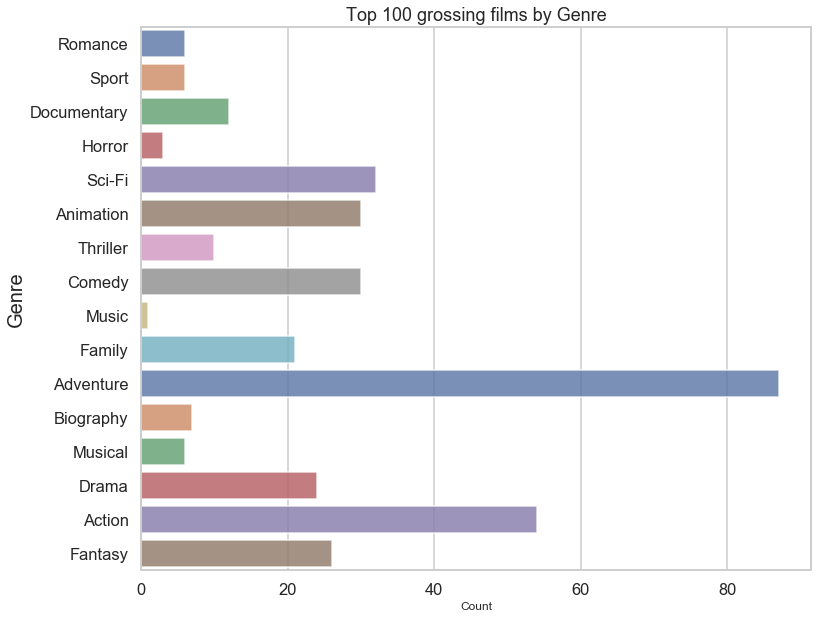

In [104]:
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = keys, x = values, alpha=0.8, palette="deep")
# Set the barplot's title.
plt.title('Top 100 grossing films by Genre')
# Label the y-axis
plt.ylabel('Genre', fontsize=20)
# Label the x-axis
plt.xlabel('Count', fontsize=12)

# Show the plot                
plt.show()

Our plot informs us that **Adventure and Action films are among the most popular** of the highest grossing films by a large margin. Lets explore this trend, to compare domestic gross between these genres.

We can make this comparison using boxplots. The boxplot will show us with more clarity the minimum and maximum values of the adventure and non-adventure genres, as well as theit Interquartile Ranges. This will display for us the median, and 1st and 3rd quartiles, or the medians within the higher and lower halves of the range. We will also be able to visualize how far the lower and higher outliers are in comparison to the IQR, lets use seabotn to create a boxplot.

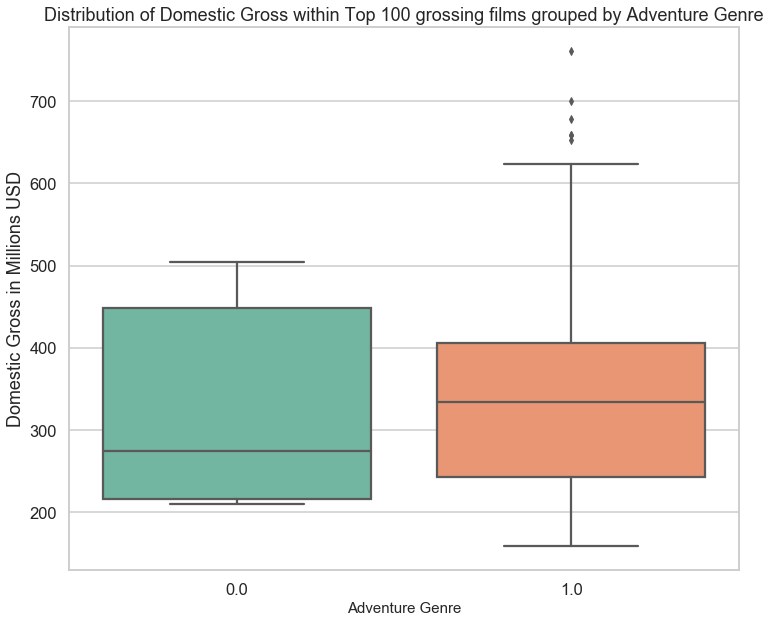

In [105]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Adventure genre and production budgets
sns.boxplot(x=df_movies_mod['Adventure'], y=df_movies_mod['domestic_gross']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Domestic Gross within Top 100 grossing films grouped by Adventure Genre')
# Set x-axis label and font size
plt.xlabel('Adventure Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Domestic Gross in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

Here we can see that action films have a smaller more centralized Interquartile Range than non-action films, while having a lower minimum and higher maximum set of values. The **median** of action films is around **50 million dollars higher** than non-action films. There are a number of outliers within the Action genre.

Lets take a look at the Adventure genre domestic gross distribution.

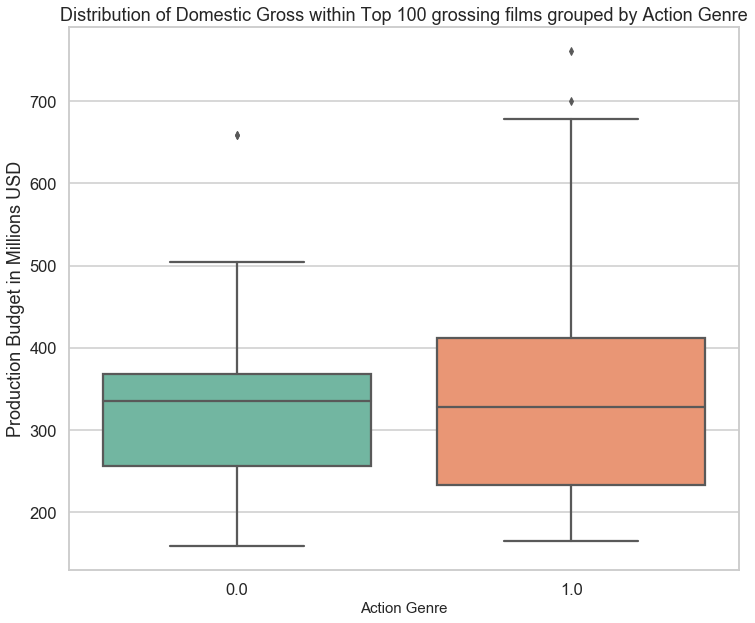

In [106]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Adventure genre and production budgets
sns.boxplot(x=df_movies_mod['Action'], y=df_movies_mod['domestic_gross']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Domestic Gross within Top 100 grossing films grouped by Action Genre')
# Set x-axis label and font size
plt.xlabel('Action Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Production Budget in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

The action genre shows a **slightly lower median** than non-action films, while having a broader IQR. The two groups appear to share the same minimum value, while action films have a much higher maximum with a few high outliers.

### Genre Insights
It would appear that the most common genres among the top 100 grossing films are **Adventure** and **Action**. This corresponds with the hypothesis we made earlier when reviewing the first dataset we read in the Reading in DataFrames section. This is a very interesting find. 

When viewing the top ten films by worldwide gross, domain knowledge informs that all ten can be considered to belong to one or both of these groups. Many of those top films incorporate superhero characters with intense and action packed story lines. This may be an insight into what the contemporary movie goer is interested in.

Lets look for other patterns among the top 100 grossing films.

## Production Budget Trends

It would be quite valuable to know how much money was spent making the most successful films in the industry. Lets explore trends associated with the production budget of the top 100 films to learn how much it costs to make a top grossing film. We can start in a similar fashion to our genre exploration, by grouping the top 100 grossing films by production budget.

In [107]:
# Make a new dataframe that is ordered by the production budget first,
# and the worldwide gross second, both in descending order, indexing only the top 100.
df_prod_100 = df_movies.sort_values(
    ['production_budget', 'worldwide_gross'], ascending=[False, False])[:100]
# View the new dataframe
df_prod_100.head(25)

release_date  \
movie                                                           
Avatar                                             2009-12-18   
Pirates of the Caribbean: On Stranger Tides        2011-05-20   
Dark Phoenix                                       2019-06-07   
Avengers: Age of Ultron                            2015-05-01   
Avengers: Infinity War                             2018-04-27   
Spectre                                            2015-11-06   
Justice League                                     2017-11-17   
The Dark Knight Rises                              2012-07-20   
Solo: A Star Wars Story                            2018-05-25   
John Carter                                        2012-03-09   
The Lone Ranger                                    2013-07-02   
Tangled                                            2010-11-24   
The Fate of the Furious                            2017-04-14   
Captain America: Civil War                         2016-05-06   
The Hobbit: An Unexpected Journey                  2012-12-14   
The Hobbit: The Desolation of Smaug                2013-12-13   
The Hobbit: The Battle of the Five Armies          2014-12-17   
Batman v Superman: Dawn of Justice                 2016-03-25   
Pirates of the Caribbean: Dead Men Tell No Tales   2017-05-26   
The Avengers                                       2012-05-04   
Man of Steel                                       2013-06-14   
The Amazing Spider-Man                             2012-07-03   
Battleship                                         2012-05-18   
Transformers: The Last Knight                      2017-06-21   
Jurassic World                                     2015-06-12   

                                                  production_budget  \
movie                                                                 
Avatar                                                    425000000   
Pirates of the Caribbean: On Stranger Tides               410600000   
Dark Phoenix                                              350000000   
Avengers: Age of Ultron                                   330600000   
Avengers: Infinity War                                    300000000   
Spectre                                                   300000000   
Justice League                                            300000000   
The Dark Knight Rises                                     275000000   
Solo: A Star Wars Story                                   275000000   
John Carter                                               275000000   
The Lone Ranger                                           275000000   
Tangled                                                   260000000   
The Fate of the Furious                                   250000000   
Captain America: Civil War                                250000000   
The Hobbit: An Unexpected Journey                         250000000   
The Hobbit: The Desolation of Smaug                       250000000   
The Hobbit: The Battle of the Five Armies                 250000000   
Batman v Superman: Dawn of Justice                        250000000   
Pirates of the Caribbean: Dead Men Tell No Tales          230000000   
The Avengers                                              225000000   
Man of Steel                                              225000000   
The Amazing Spider-Man                                    220000000   
Battleship                                                220000000   
Transformers: The Last Knight                             217000000   
Jurassic World                                            215000000   

                                                  domestic_gross  \
movie                                                              
Avatar                                                 760507625   
Pirates of the Caribbean: On Stranger Tides            241063875   
Dark Phoenix                                            42762350   
Avengers: Age of Ultron            

In [108]:
# Lets take a look at the basic statistical data of our new dataframe
df_prod_100.describe()

production_budget  domestic_gross  worldwide_gross  start_year  \
count       1.000000e+02    1.000000e+02     1.000000e+02   100.00000   
mean        2.092070e+08    2.690772e+08     7.788282e+08  2014.41000   
std         4.749142e+07    1.639610e+08     4.712783e+08     2.59796   
min         1.700000e+08    3.836248e+07     1.396303e+08  2010.00000   
25%         1.797500e+08    1.510368e+08     4.107407e+08  2012.00000   
50%         2.000000e+08    2.391730e+08     7.448241e+08  2014.00000   
75%         2.150000e+08    3.538707e+08     1.022284e+09  2017.00000   
max         4.250000e+08    7.605076e+08     2.776345e+09  2019.00000   

       runtime_minutes  
count       100.000000  
mean        119.440000  
std          25.112402  
min          48.000000  
25%         102.750000  
50%         124.000000  
75%         136.000000  
max         169.000000

In [109]:
# To change the scientific notation, we can use a lambda expression to 
# iterate thorugh each value within the result of the describe method 
# and show its plain format.
df_prod_100['worldwide_gross'].describe().apply(lambda x: format(x, 'f'))

count           100.000000
mean      778828184.090000
std       471278269.642149
min       139630336.000000
25%       410740655.750000
50%       744824108.000000
75%      1022284172.250000
max      2776345279.000000
Name: worldwide_gross, dtype: object

We can also take a look at the mean of the worldwide gross with the mean method. Lets make a bar plot with matplotlib that shows the mean value for the numeric values in our df_prod_100 dataframe, excluding the start_year and runtime_minutes, as we would only like to focus on the monetary values at the moment.

Text(0, 0.5, 'Amount in 100 Millions USD')

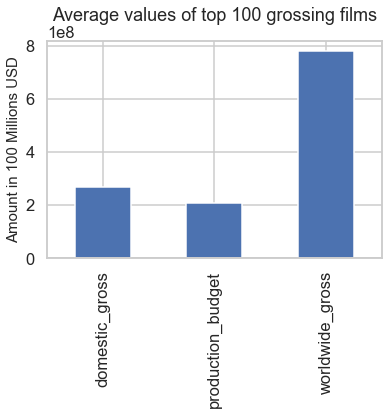

In [110]:
# Make a list of columns to remove
exclude = ['start_year', 'runtime_minutes']
# Make a bar plot using the mean values of df_prod_100.
# Use label based indexing and the difference method to return the mean values
# of the dataframe without the excluded columns.
df_prod_100.loc[:, df_prod_100.columns.difference(
    exclude)].mean().plot(kind='bar')
# Set plot title, make appropriate spacing with pad.
plt.title('Average values of top 100 grossing films', pad=20.0)
# Set y-axis label and font size
plt.ylabel('Amount in 100 Millions USD', fontsize=15)

It would appear that the **average worldwide gross** of the top 100 grossing films is close to **800 million dollars**, while the **average production budget** is around **200 million dollars**. Lets delve further.

Lets take a quick glance at the distribution of production budgets by worldwide gross in a scatterplot.

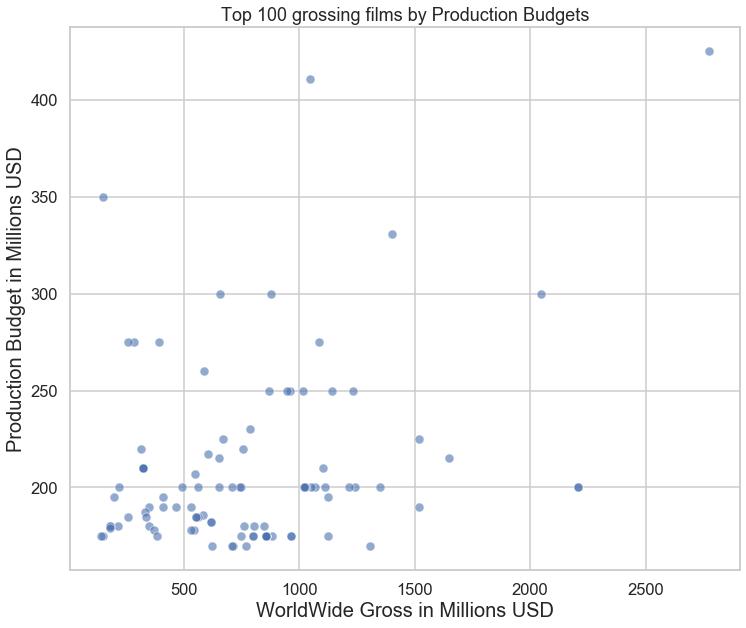

In [111]:
# Create a plot and set the appropriate size
plt.figure(figsize=(12, 10))
# Draw a seaborn scatterplot based on worldwide gross and production budget,
# divide the values by 1 million to make plot axes more readable.
sns.scatterplot(x=df_prod_100['worldwide_gross']/1000000,
                y=df_prod_100['production_budget']/1000000, alpha=0.6, palette='blues')
# Set title of plot
plt.title('Top 100 grossing films by Production Budgets')
# Set y-axis label and fontsize
plt.ylabel('Production Budget in Millions USD', fontsize=20)
# Set x-axis label and fontsize
plt.xlabel('WorldWide Gross in Millions USD', fontsize=20)
# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x')
# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

Upon first glance we can see that there is some clustering within the range of production budgets near the lower end of the top 100 grossing films, with **most budgets** lying in the range up to **200 million**. Lets further explore this to find more insights.

Lets get the min and max of the production values to make bins that can group these numeric values for visualization. I will apply a scientific notation suppression to make it easier to understand the values.

In [112]:
# To change the scientific notation, we can use a lambda expression to 
# iterate thorugh each value within the result of the describe method 
# and show its plain format.
df_prod_100['production_budget'].describe().apply(lambda x: format(x, 'f'))

count          100.000000
mean     209207000.000000
std       47491422.415319
min      170000000.000000
25%      179750000.000000
50%      200000000.000000
75%      215000000.000000
max      425000000.000000
Name: production_budget, dtype: object

Here we can see that the lowest budget for a top 100 grossing film is 170 million dollars, with the highest amount being 425 million dollars. With this knowledge we can make a column budget ranges that divides this range into bins of appropriate size to show the most common range of production budget among the top 100 grossing films. We will space the bins evenly among the range, with each bin having a range of 51 million dollars. We will use the pandas cut method to segment and sort data values into bins. This will help transform the continuous values of the production budget column into column with categorical values. The production budget column will be the input array that will be binned.

In [113]:
# Create a list of integers, including infinity defined by numpy.
bins = [170000000, 221000000, 272000000, 323000000, 374000000, np.inf]
# Create a name for the bins expressing the range for each bin.
names = ['$170-$221 million', '$221-$272 million',
         '$272-$323 million', '$323-$374 million', '$374-$425 million']
# Make a new categorical column names budget range, which is made of the 
# segments from the production budget column, 
df_prod_100['budget_range'] = pd.cut(
    #cut at the bin values and label with the names list.
    df_prod_100['production_budget'], bins=bins, labels=names)

# Make sure the datatypes are correct.
print(df_prod_100.dtypes)

release_date         datetime64[ns]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
start_year                    int64
runtime_minutes             float64
genres                       object
budget_range               category
dtype: object


In [114]:
# View the new column
df_prod_100.head(50)

release_date  \
movie                                                           
Avatar                                             2009-12-18   
Pirates of the Caribbean: On Stranger Tides        2011-05-20   
Dark Phoenix                                       2019-06-07   
Avengers: Age of Ultron                            2015-05-01   
Avengers: Infinity War                             2018-04-27   
Spectre                                            2015-11-06   
Justice League                                     2017-11-17   
The Dark Knight Rises                              2012-07-20   
Solo: A Star Wars Story                            2018-05-25   
John Carter                                        2012-03-09   
The Lone Ranger                                    2013-07-02   
Tangled                                            2010-11-24   
The Fate of the Furious                            2017-04-14   
Captain America: Civil War                         2016-05-06   
The Hobbit: An Unexpected Journey                  2012-12-14   
The Hobbit: The Desolation of Smaug                2013-12-13   
The Hobbit: The Battle of the Five Armies          2014-12-17   
Batman v Superman: Dawn of Justice                 2016-03-25   
Pirates of the Caribbean: Dead Men Tell No Tales   2017-05-26   
The Avengers                                       2012-05-04   
Man of Steel                                       2013-06-14   
The Amazing Spider-Man                             2012-07-03   
Battleship                                         2012-05-18   
Transformers: The Last Knight                      2017-06-21   
Jurassic World                                     2015-06-12   
Men in Black 3                                     2012-05-25   
Transformers: Age of Extinction                    2014-06-27   
Robin Hood                                         2010-05-14   
Robin Hood                                         2010-05-14   
Robin Hood                                         2010-05-14   
Robin Hood                                         2010-05-14   
King Kong                                          2005-12-14   
Titanic                                            1997-12-19   
Titanic                                            1997-12-19   
Black Panther                                      2018-02-16   
Incredibles 2                                      2018-06-15   
Iron Man 3                                         2013-05-03   
Skyfall                                            2012-11-08   
Toy Story 3                                        2010-06-18   
Rogue One: A Star Wars Story                       2016-12-16   
Alice in Wonderland                                2010-03-05   
Alice in Wonderland                                2010-03-05   
Alice in Wonderland                                2010-03-05   
Finding Dory                                       2016-06-17   
X-Men: Days of Future Past                         2014-05-23   
Monsters University                                2013-06-21   
The Amazing Spider-Man 2                           2014-05-02   
Fantastic Beasts: The Crimes of Grindelwald        2018-11-16   
Cars 2                                             2011-06-24   
Oz the Great and Powerful                          2013-03-08   

                                                  production_budget  \
movie                                                                 
Avatar                                                    425000000   
Pirates of the Caribbean: On Stranger Tides               410600000   
Dark Phoenix                                              350000000   
Avengers: Age of Ultron                                   330600000   
Avengers: Infinity War                                    300000000   
Spectre                                                   300000000   
Justice League                                            300000000   
The Dark Knight Rises        

Now that we have a categorical feature that defines the production budget of a top grossing films, we can visualize how many films belong to the various ranges to get a better idea of the distribution of budgets. Lets make a seaborn barplot to illustrate this.

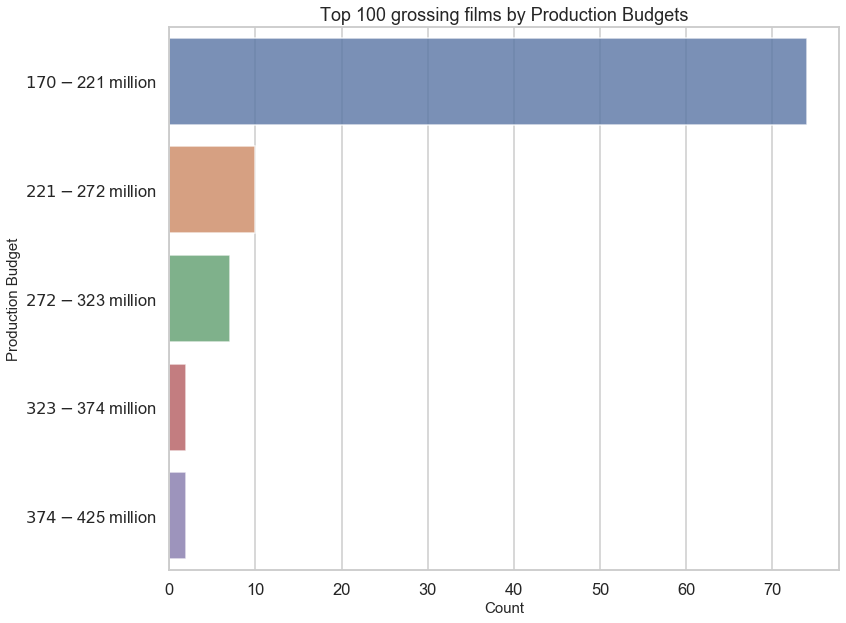

In [115]:
# Create a plot figure and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn barplot plotting range names on y-axis and counts of films 
# in range on the x-axis
sns.barplot(y=names, x=df_prod_100['budget_range'].value_counts(
), alpha=0.8, palette="deep")
# Set title of plot
plt.title('Top 100 grossing films by Production Budgets')
# Set y-axis label and font size
plt.ylabel('Production Budget', fontsize=15)
# Set x-axis label and font size
plt.xlabel('Count', fontsize=15)

# Show plot
plt.show()

Our plot confirms that about **80%** of the top grossing films had a **production budget between 171 and 221 million dollars**. It may prove valuable to evaluate the Action and Adventure genres by their production budget to see what the typical cost of making the most common genre of films is, and if it differs from the general cost of the other genres. 

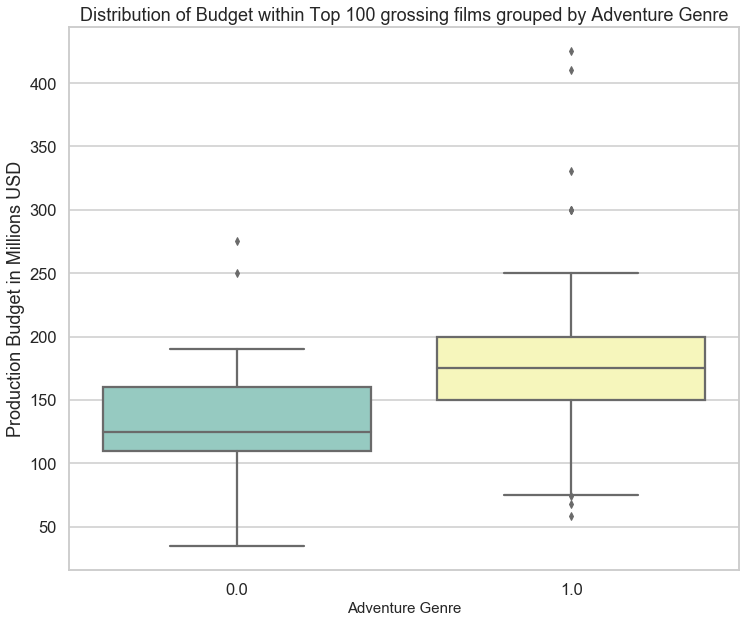

In [116]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Adventure genre and production budgets
sns.boxplot(x=df_movies_mod['Adventure'], y=df_movies_mod['production_budget']/1000000, palette="Set3")
# Set title of plot
plt.title('Distribution of Budget within Top 100 grossing films grouped by Adventure Genre')
# Set x-axis label and font size
plt.xlabel('Adventure Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Production Budget in Millions USD')
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

Our box plot shows that while **Adventure films have a tighter IQR vs the rest of the genres**, the **median value** of making an Adventure film is about **30 million dollars higher**. Adventure films have more outliers both lower and higher, while the **highest production budget was not an adventure film**. This may be to use of animation teams, stunt crews and props. Let's compare the Action films and the rest of the genres.

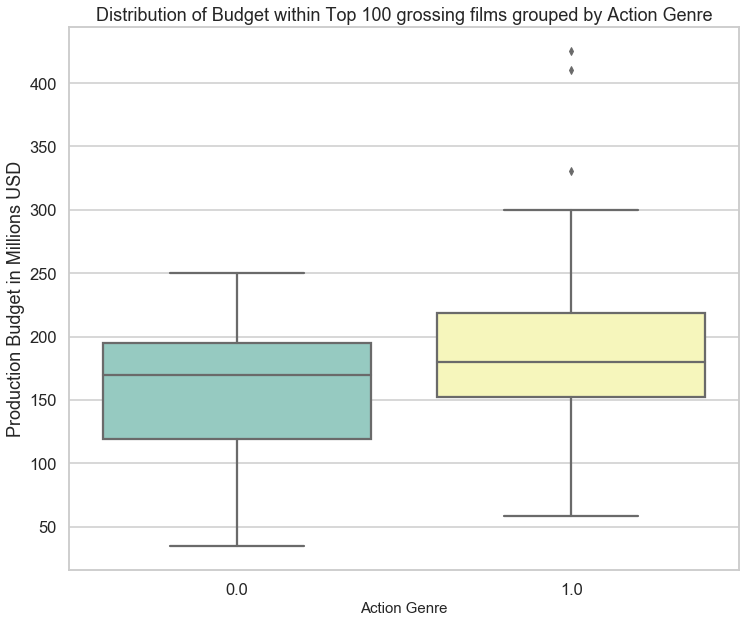

In [117]:
# Create a plot and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on the Action genre and production budgets
sns.boxplot(x=df_movies_mod['Action'], y=df_movies_mod['production_budget']/1000000, palette="Set3")
# Set title for plot
plt.title('Distribution of Budget within Top 100 grossing films grouped by Action Genre')
# Set x-axis label and define font size
plt.xlabel('Action Genre', fontsize=15)
# Set y-axis label
plt.ylabel('Production Budget in Millions USD')
# Remove scientific notation tick labels from the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show plot
plt.show()

Very interesting. The Interquartile Range appears to be shifted 50 million dollars higher for action films vs. non-action films. Action films would appear to cost around 50 million more dollars to make, although the median values for the two categories are about the same. It would seem that while they are more popular, the **Adventure and Action genres cost more money to make**. This would be helpful information if the studio intends to make Action or Adventure films.

It could also prove worthwhile to take a look at the features of films based on correlation of production budget. To do this from a wide view, we can use a pairplot with a hue set to budget range.

<Figure size 1080x1080 with 0 Axes>

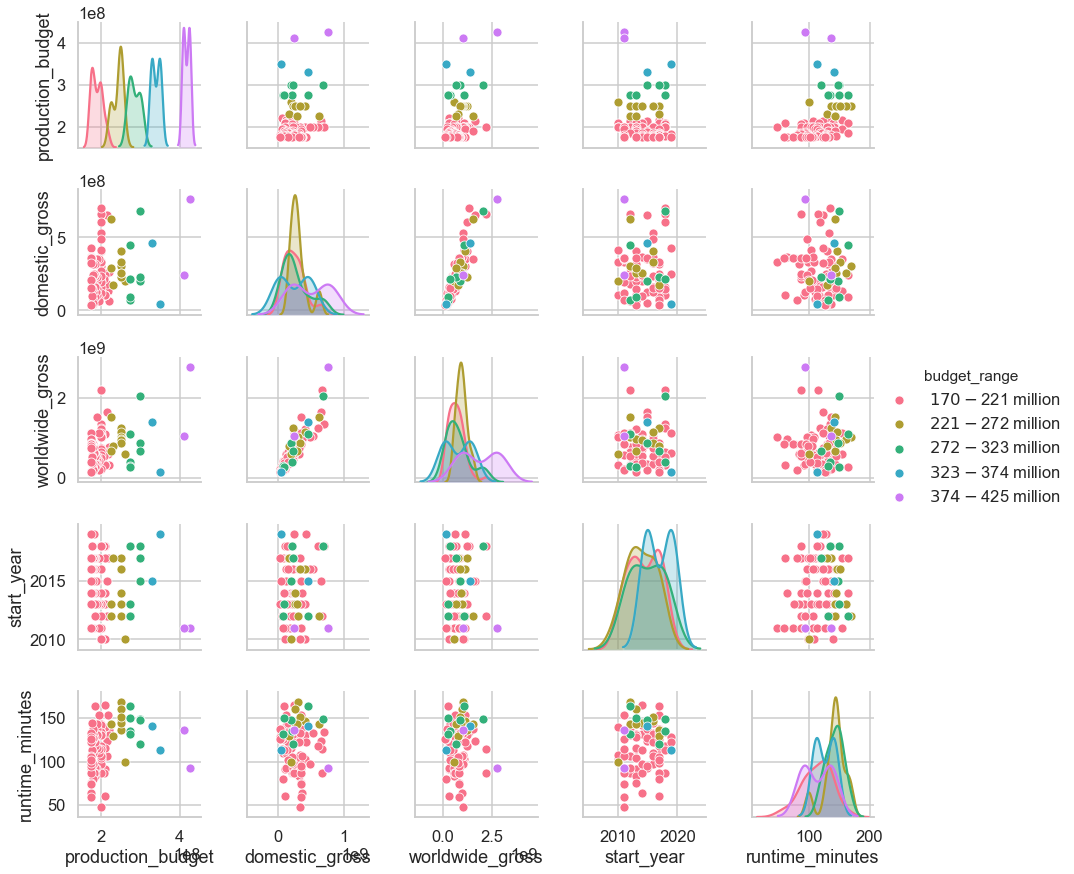

In [118]:
# Create a seaborn pairplot with budget range as the variable to map plot colors to.
plt.figure(figsize=(15,15))
sns.pairplot(df_prod_100, hue='budget_range', palette="husl", diag_kind="kde")

### Production Budget Insights

Our bar plot shows us that around **75 of the top 100 grossing films** had a production budget between **170 to 221 million dollars**. This is valuable information. If the goal for Microsoft is to make a film that ranks among the top 100 highest grossing films worldwide, it would be safe to inform them that a healthy budget for their project should be within this range. 

Our pairplot also illustrates that there is a trend of most top 100 films having a production budget within the 170-221 million dollars range, but also shows with more detail the correlation between budget and gross, generally speaking the **higher the budget, the higher the expected gross**. There does appear to be a **correlation between runtime minutes and production budget** as well, the lower the production budget, the lower the length of the film. Lets follow this and look deeper in to the runtime trends.

## Runtime Trends

Now that we have an idea of what genres and production budgets have a high correlation to the top 100 highest grossing films, lets take a look at the patterns pertaining to the length of a film. Do films that last longer have a tendency to return a higher gross? In order to answer this question, lets take a look at the data.

We can use a seaborn distplot to get counts of the films' various runtimes in minutes.

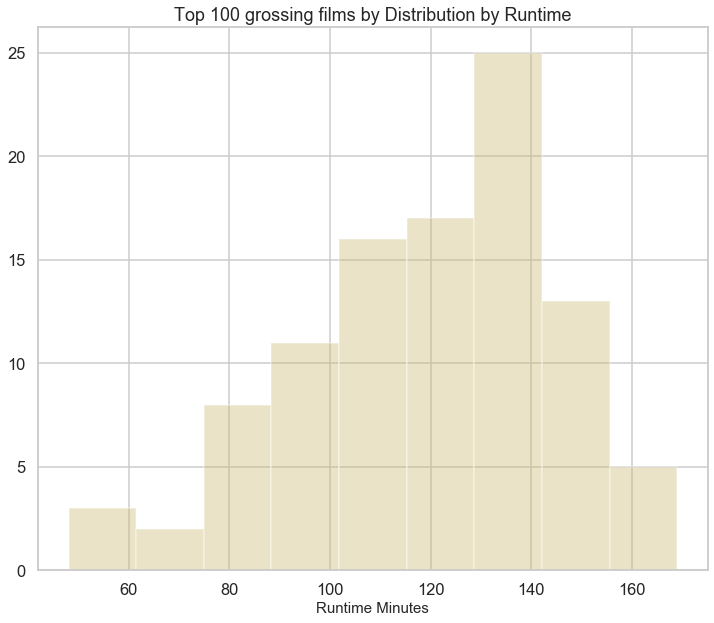

In [119]:
# Create a plot and define its size.
plt.figure(figsize=(12, 10))
# Draw a distplot showing the distribution of top grossing film
# runtime minutes, set kde to false to create a histogram That gives counts
# instead of probability density.
sns.distplot(df_prod_100['runtime_minutes'], color="y", kde=False)
# Set title of plot
plt.title('Top 100 grossing films by Distribution by Runtime')
# Set x-axis label and define font
plt.xlabel('Runtime Minutes', fontsize=15)

# Show plot
plt.show()

It would appear on first glance that a majority of the films within the top 100 gross have a runtime between 100 and 150 minutes, or in other words between 1.67 hours and 2.5 hours. Lets take a deeper look into the runtime trends to discover what the most common runtime is among the highest grossing films.

In [120]:
# Use the describe method to return stats on runtime and remove scientific
# notation with a lambda function that changes the format of values.
df_prod_100['runtime_minutes'].describe().apply(lambda x: format(x, 'f'))

count    100.000000
mean     119.440000
std       25.112402
min       48.000000
25%      102.750000
50%      124.000000
75%      136.000000
max      169.000000
Name: runtime_minutes, dtype: object

Here the describe method tells us that the minimum runtime within the top 100 grossing group is **48 minutes**, and the maximum is **169 minutes**. The median runtime amount i 124 minutes, roughly 2 hours. It would appear that a boxplot could be useful in showing us with a little more clarity what a reasonable runtime should be if we want our film in the top 100 grossing category. Lets use a similar method as in the budget case, and make evenly spaced bins of runtime minutes to describe the distribution with the pandas cut method. 

First we will need to make the bins.

In [121]:
# Create a list of integers, including infinity defined by numpy.
mins = [48, 72, 96, 120, 144, np.inf]
# Create a name for the bins expressing the range for each bin
groups = ['48-72 min', '72-96 min',
         '96-120 min', '120-144 min', '144-169 min']
# Make a nre categorical column Length_minutes, which is made of the
# segments from the runtime_minutes column,
df_prod_100['length_minutes'] = pd.cut(
    # cut at the min values and label them with the groups list.
    df_prod_100['runtime_minutes'], bins=mins, labels=groups)

# Check that the datatypes are correct
print(df_prod_100.dtypes)

release_date         datetime64[ns]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
start_year                    int64
runtime_minutes             float64
genres                       object
budget_range               category
length_minutes             category
dtype: object


Now that we have a new feature that groups the length of a film into categories, we can make a seaborn boxplot describing the runtime minute categories with the production budget ranges.

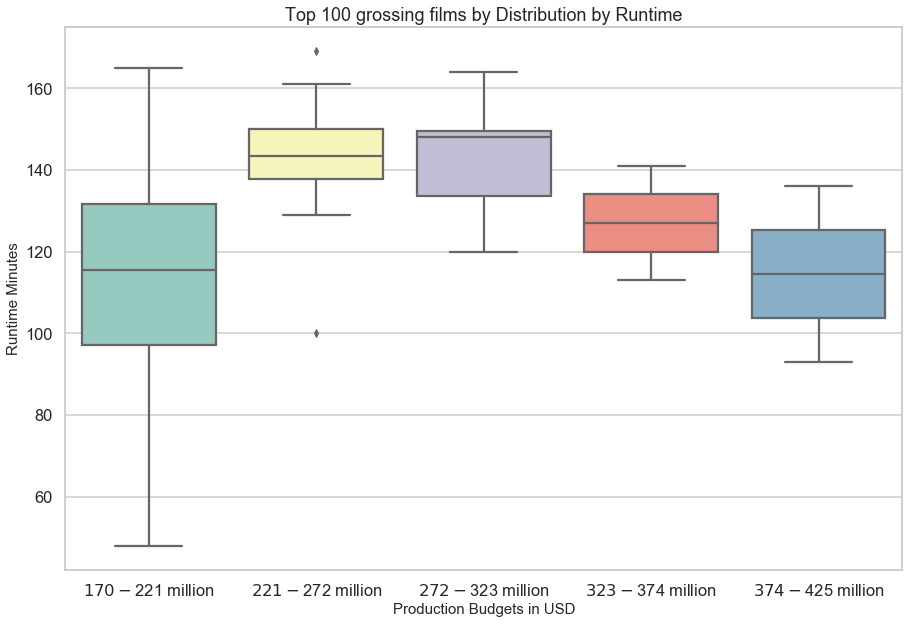

In [122]:
# Create a plot and define its size.
plt.figure(figsize=(15, 10))
# Draw a boxplot showing the runtime minute distributions among the ranges of 
# production budget.
sns.boxplot(x=df_prod_100['budget_range'], y=df_prod_100['runtime_minutes'], palette="Set3")
# Set the plot title
plt.title('Top 100 grossing films by Distribution by Runtime')
# Set the x-axis Label and define fontsize
plt.xlabel('Production Budgets in USD', fontsize=15)
# Set the y-axis label and define fontsize
plt.ylabel('Runtime Minutes', fontsize=15)

# Show plot
plt.show()

Considering that close to 80% of the 100 highest grossing films have a production budget between 170-221 million dollars, it is no surprise that it has an Interquartile Range that is larger than the other ranges. We can see that the **highest median of runtime minutes** of the films with budgets between **272-323 million dollars**. It is interesting to note that the movies with the **highest and lowest budgets share roughly the same median**.

Lets continue to use the power of boxplots to show the distribution of runtime minutes among the most common genres of films, Adventure and Action.

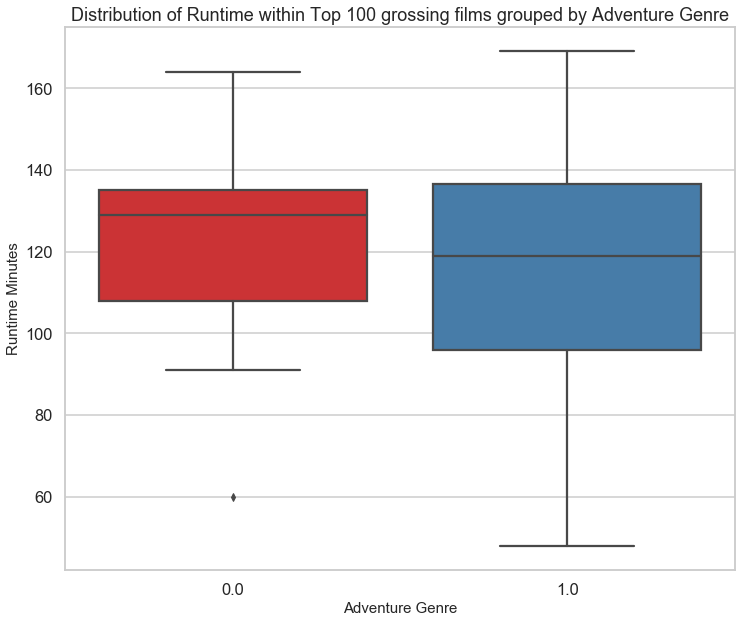

In [123]:
# Create a plot and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot showing the IQR of runtime minutes of Adventure and 
# non-adventure films.
sns.boxplot(x=df_movies_mod['Adventure'], y=df_movies_mod['runtime_minutes'], palette="Set1")
# Set the plot title
plt.title('Distribution of Runtime within Top 100 grossing films grouped by Adventure Genre')
# Set the x-axis label and define font size
plt.xlabel('Adventure Genre', fontsize=15)
# Set the y-axis label and define font size
plt.ylabel('Runtime Minutes', fontsize=15)

# Show plot
plt.show()

It would seem that although on average **Adventure films** cost more to make, they are **on average shorter films** with a median about 10 minutes shorter than non-adventure films.

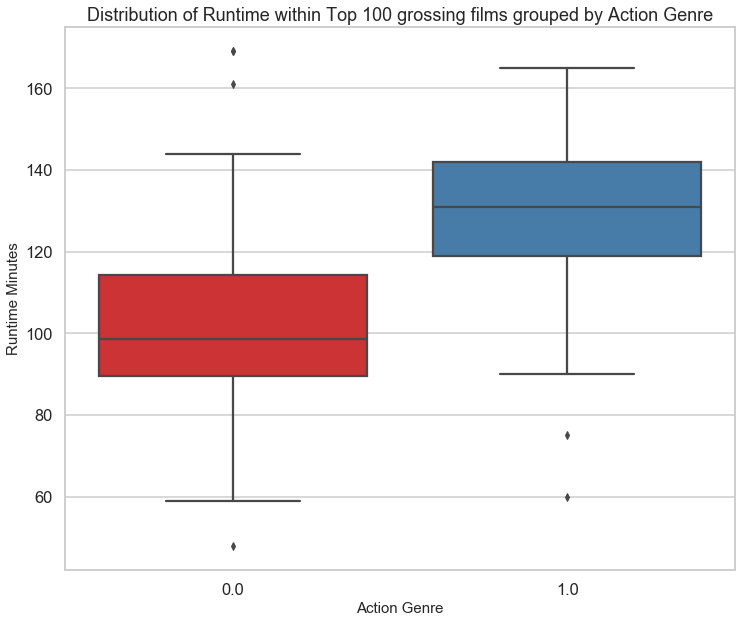

In [124]:
# Create a plot and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot showing the IQR of runtime minutes of Action and 
# non-action films.
sns.boxplot(x=df_movies_mod['Action'], y=df_movies_mod['runtime_minutes'], palette="Set1")
# Set title of plot 
plt.title('Distribution of Runtime within Top 100 grossing films grouped by Action Genre')
# Set the x-axis label and define its fontsize
plt.xlabel('Action Genre', fontsize=15)
# Set the y-axis label and define its fontsize
plt.ylabel('Runtime Minutes', fontsize=15)

# Show plot
plt.show()

While the median runtime for Adventure films was lower than non-adventure films, Action films have a higher median than non-action films, by about **30 minutes**. It would seem that even **between Adventure and Action films, Action films last longer**.

Lets take a closer look at the relationship between runtime minutes and production budget. We can use a seaborn scatterplot to see the correlation.

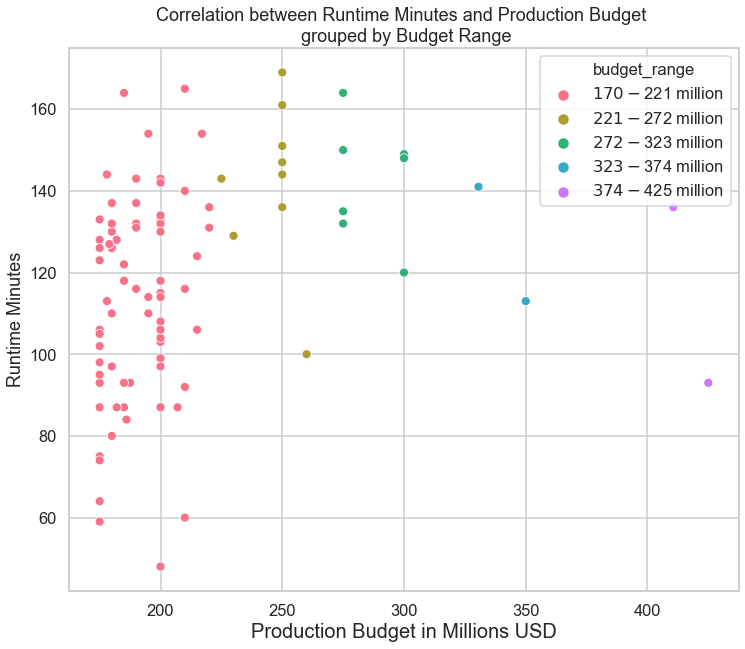

In [125]:
# Create a plot and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn scatterplot that shows the correlation between production budget
# and runtime minutes, set colors by budget range.
sns.scatterplot(x=df_prod_100['production_budget']/1000000,
                y=df_prod_100['runtime_minutes'], hue=df_prod_100['budget_range'], palette="husl")
# Set plot title
plt.title('Correlation between Runtime Minutes and Production Budget \n grouped by Budget Range')
# Set x-axis label and define fontsize
plt.xlabel('Production Budget in Millions USD', fontsize=20)
# Set y-axis label and define fontsize
plt.ylabel('Runtime Minutes')
# Remove scientific notation from plot
plt.ticklabel_format(style='plain', axis='x')

# Show plot
plt.show()

We can see a clear seperation in our scatterplot for runtime of **films that cost between 220-374 million dollars lasting longer than 2 hours**. This information could be useful for Microsoft when deciding how long a film they produce should last

Lets use another scatterplot to see if runtime minutes has any correlation between gross.

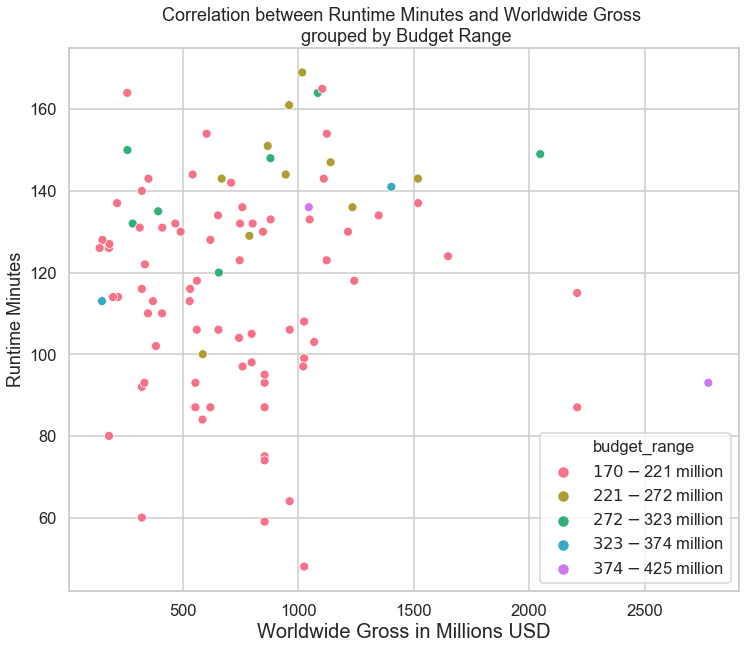

In [126]:
# Create a plot and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn scatterplot that shows the correlation between worlwide gross
# and runtime minutes, set colors by budget range.
sns.scatterplot(x=df_prod_100['worldwide_gross']/1000000,
                y=df_prod_100['runtime_minutes'], hue=df_prod_100['budget_range'], palette="husl")
# Set plot title
plt.title('Correlation between Runtime Minutes and Worldwide Gross \n grouped by Budget Range')
# Set x-axis label and define fontsize
plt.xlabel('Worldwide Gross in Millions USD', fontsize=20)
# Set y-axis label and define fontsize
plt.ylabel('Runtime Minutes')
# Remove scientific notation from plot
plt.ticklabel_format(style='plain', axis='x')

# Show plot
plt.show()

From our scatterplot we can see that there is **no strong correlation between a film's runtime and its worldwide gross**.

### Runtime Insights

We can see through the data visualizations that the average runtime for a film in the top 100 grossing group is around **120 minutes, in other words 2 hours**. This seems to be consistent with my own movie going experience. What is very interesting to note is the trend seen among the most popular genres. While Adventure movies seemed to have a similar distribution of runtime with other genres, **Action movies seem to have a slightly higher average**, of around 130 minutes. Also we found that typically, a film that costs more than **220 million dollars should last longer than 2 hours**. 

However there does **not appear to be a correlation between a film's gross and runtime**. This could prove useful for Microsoft if they choose the route of making an Action film!

## Q.1 Conclusion

Lets use a seaborn pairplot to recap the correlations found in the 100 highest grossing film data.

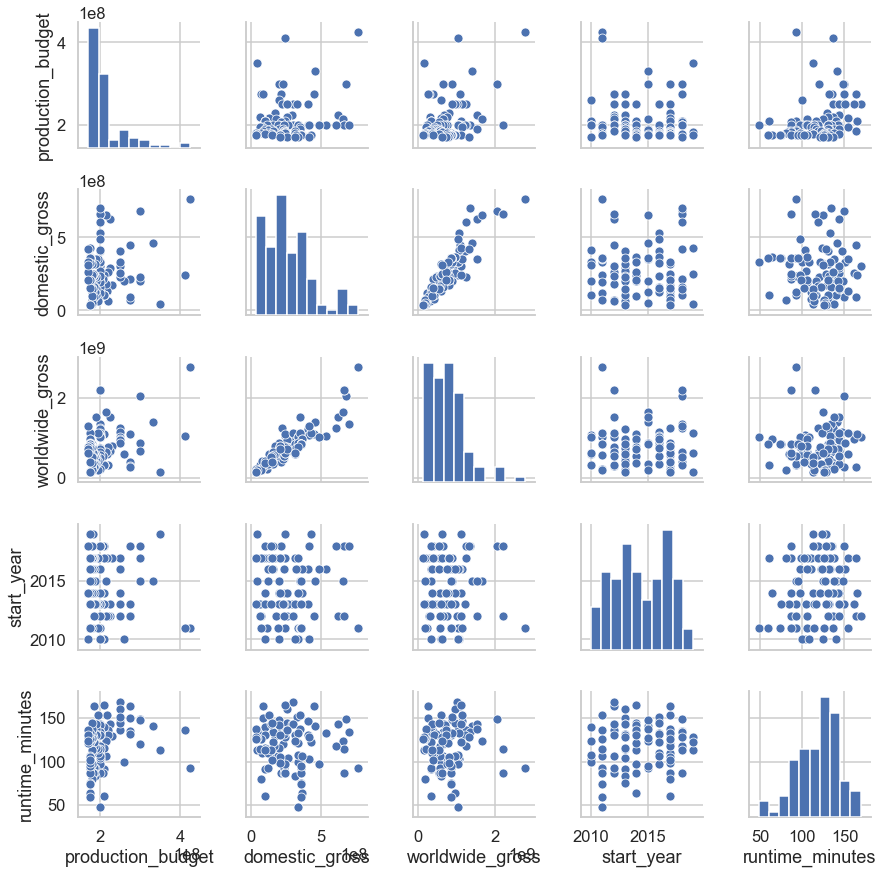

In [127]:
sns.pairplot(df_prod_100)

Upon inspection, and exploratory data analysis there would appear to be trends among the top 100 worldwide grossing films. The data shows that:

  - **Action** and **Adventure** films are among the most popular genre of films among the top grossing around the world.
  - A reasonable budget for production for a film expected to be in the top 100 grossing is between **170-221 million dollars**, with Action films costing **50 million dollars** more to make on average. The average worlwide gross of the top 100 films was roughly **780 million** dollars. 
  - A favorable runtime for a film belonging to the top 100 grossing worldwide is around **120 minutes**, with Action movies having an average **30 minute** longer length. There does **not appear to be a correlation between a film's gross and runtime**.

# Q.2 Is there a correlation between Franchise Films and 100 highest grossing films? 

![title](img/franchises.png)

When taking a look at the list of top 100 grossing films, there seems to be a pattern not just among the genre, or budget, but also within the content. Many of these films are a part of a series, or have origins that are within the same fictional source. Lets explore the relationship between those films that are a part of a franchise and the highest grossing films.

### Definitions

Lets define some of the film vernacular we will use in this section.

 - Film Franchise: a collection of related films in succession that share the same fictional universe, or are marketed as a series. Film series will be used interchangeably with Film franchise.
 - Trilogy: a group of three related films.

## New Dataset for Q2

In order to take a look at the trends among franchise films, we will need a dataframe that informs us as to what films belong to a franchise, and the gross of these films and franchises. While we do not have this dataset on hand, it is readily available on various websites. We will need to scrape one such site for this data. Lets use web scraping to retrieve a dataframe with the relevant information to answer question 2.

We can reference a website url that holds the data we are looking for on the-numbers.com, which looks like this:

![title](img/grossing_franchises.PNG)

To make things a bit easier, we can use pandas to read in the table that is on the site by saving the site as an html file locally and then reading in that file with the pandas read_html method. Lets try this now.

In [128]:
# Save this url locally and use pandas to read the html into python.
table = pd.read_html(
    'file:///C:/Users/morga/Desktop/Desktop/A%20I/Flatiron/Module%201/Project/Movie%20Franchises%20-%20Box%20Office%20History%20-%20The%20Numbers.html')

In [129]:
# Confirm the read_html method worked by taking a look at table.
table

[          Year Marvel Cinematic Universe       Star Wars      James Bond  \
 0   Year: 1960                        $0              $0              $0   
 1   Year: 1961                        $0              $0              $0   
 2   Year: 1962                        $0              $0              $0   
 3   Year: 1963                        $0              $0    $172,200,809   
 4   Year: 1964                        $0              $0    $915,694,346   
 ..         ...                       ...             ...             ...   
 56  Year: 2016            $4,773,883,318  $6,573,710,718  $5,931,136,027   
 57  Year: 2017            $5,827,853,955  $7,207,864,195  $5,931,136,027   
 58  Year: 2018            $7,427,210,882  $7,524,594,721  $5,931,136,027   
 59  Year: 2019            $9,102,945,806  $7,976,176,977  $5,931,136,027   
 60  Year: 2020            $9,102,945,806  $8,035,697,261  $5,931,136,027   
 
             Batman    Harry Potter  
 0               $0              $0 

In [130]:
# Check the type of table
type(table)

list

In [131]:
# Table is a list, lets view its shape and contents.
len(table)

2

There are two elements in the list. We will only need the dataframe containing the features of the franchise films. Lets use indexing to find the dataframe.

In [132]:
# Index the first element of the list, we are looking for a dataframe.
table[0]

Year Marvel Cinematic Universe       Star Wars      James Bond  \
0   Year: 1960                        $0              $0              $0   
1   Year: 1961                        $0              $0              $0   
2   Year: 1962                        $0              $0              $0   
3   Year: 1963                        $0              $0    $172,200,809   
4   Year: 1964                        $0              $0    $915,694,346   
..         ...                       ...             ...             ...   
56  Year: 2016            $4,773,883,318  $6,573,710,718  $5,931,136,027   
57  Year: 2017            $5,827,853,955  $7,207,864,195  $5,931,136,027   
58  Year: 2018            $7,427,210,882  $7,524,594,721  $5,931,136,027   
59  Year: 2019            $9,102,945,806  $7,976,176,977  $5,931,136,027   
60  Year: 2020            $9,102,945,806  $8,035,697,261  $5,931,136,027   

            Batman    Harry Potter  
0               $0              $0  
1               $0              $0  
2               $0              $0  
3               $0              $0  
4               $0              $0  
..             ...             ...  
56  $3,434,806,595  $3,467,608,875  
57  $3,613,300,018  $3,479,148,211  
58  $3,614,279,982  $3,637,471,798  
59  $3,948,265,436  $3,640,245,840  
60  $3,949,509,790  $3,640,245,840  

[61 rows x 6 columns]

This is not the dataframe we were looking for, it would appear that this is the first graph on the website:

![title](img/table_0.png)

We need to access the chart below table[0], this most likely is the other element on the page. Lets check this by indexing the second element on the web page.

In [133]:
# Index for the second element on the web page.
table[1]

Franchise  No. of Movies Domestic Box Office  \
0    Marvel Cinematic Universe             30      $8,545,426,433   
1                    Star Wars             15      $5,075,019,577   
2                   James Bond             27      $2,136,666,623   
3                       Batman             22      $2,786,557,399   
4                 Harry Potter             12      $2,786,938,291   
..                         ...            ...                 ...   
848  Tales From Sanctuary City              1                  $0   
849      Greenstreet Hooligans              1                  $0   
850                 Blind Dead              1                  $0   
851                   Ironclad              1                  $0   
852              Biggest Loser              1                  $0   

    Infl. Adj. Dom. Box Office Worldwide Box Office  First Year  Last Year  \
0               $9,102,945,801      $22,590,455,007        2008       2022   
1               $8,035,697,253      $10,310,160,586        1977       2026   
2               $5,931,136,027       $7,119,674,009        1963       2020   
3               $3,948,280,777       $6,049,944,480        1989       2021   
4               $3,638,704,111       $9,185,046,972        2001       2021   
..                         ...                  ...         ...        ...   
848                         $0                   $0        2020       2020   
849                         $0                   $0        2015       2015   
850                         $0                   $0        1977       1977   
851                         $0           $5,297,411        2011       2011   
852                         $0                   $0        2006       2006   

     No. of Years  
0            14.0  
1            49.0  
2            57.0  
3            32.0  
4            20.0  
..            ...  
848           NaN  
849           NaN  
850           NaN  
851           NaN  
852           NaN  

[853 rows x 8 columns]

This is the dataframe we were looking for, now we can work with the data.

In [134]:
# Lets name this element and double check that it is a pandas dataframe.
franchise_df = table[1]
# Check that our dataframe is still a dataframe.
type(franchise_df)

pandas.core.frame.DataFrame

In [135]:
# Get a view of the dataframe
franchise_df.head(25)

Franchise  No. of Movies Domestic Box Office  \
0           Marvel Cinematic Universe             30      $8,545,426,433   
1                           Star Wars             15      $5,075,019,577   
2                          James Bond             27      $2,136,666,623   
3                              Batman             22      $2,786,557,399   
4                        Harry Potter             12      $2,786,938,291   
5                          Spider-Man             10      $2,715,087,276   
6                               X-Men             14      $2,434,609,696   
7                            Avengers              4      $2,619,552,260   
8                       Jurassic Park              6      $1,882,766,527   
9                           Star Trek             13      $1,400,952,879   
10  Peter Jackson's Lord of the Rings              7      $1,852,304,517   
11               DC Extended Universe             25      $2,103,903,493   
12                      Indiana Jones              5        $919,839,275   
13                           Superman              9      $1,152,698,852   
14               Fast and the Furious             11      $1,690,752,038   
15                              Shrek              8      $1,419,598,493   
16                              Rocky              8        $792,039,875   
17           Pirates of the Caribbean              5      $1,451,769,807   
18                       Transformers              7      $1,582,401,601   
19                          Toy Story              5      $1,317,393,746   
20                               Jaws              4        $420,895,891   
21                       Hunger Games              4      $1,451,538,526   
22                           Twilight              6      $1,365,922,346   
23                Mission: Impossible              8      $1,154,492,507   
24                Dark Knight Trilogy              3      $1,190,225,564   

   Infl. Adj. Dom. Box Office Worldwide Box Office  First Year  Last Year  \
0              $9,102,945,801      $22,590,455,007        2008       2022   
1              $8,035,697,253      $10,310,160,586        1977       2026   
2              $5,931,136,027       $7,119,674,009        1963       2020   
3              $3,948,280,777       $6,049,944,480        1989       2021   
4              $3,638,704,111       $9,185,046,972        2001       2021   
5              $3,298,866,477       $7,227,553,657        2002       2019   
6              $2,878,961,702       $6,049,624,526        2000       2020   
7              $2,746,635,625       $7,767,987,269        2012       2019   
8              $2,705,746,069       $4,987,492,478        1993       2021   
9              $2,594,747,188       $2,267,036,257        1979       2016   
10             $2,520,333,945       $5,858,102,224        2001       2018   
11             $2,183,802,652       $5,363,607,319        2013       2022   
12             $2,063,482,532       $1,961,339,569        1981       2021   
13             $2,050,758,403       $2,554,512,067        1978       2016   
14             $1,993,550,748       $5,901,315,134        2001       2021   
15             $1,952,505,250       $3,547,384,012        2001       2022   
16             $1,942,429,850       $1,513,939,512        1976       2018   
17             $1,912,071,782       $4,517,852,068        2003       2017   
18             $1,863,419,555       $4,846,579,018        1986       2018   
19             $1,787,870,306       $3,054,046,196        1995       2019   
20             $1,714,929,704         $737,573,891        1975       1987   
21             $1,622,424,771       $2,958,353,344        2012       2015   
22             $1,610,862,622       $3,317,470,739        2008       2012   
23             $1,593,972,703       $3,577,703,029        1996       2022   
24             $1,481,303,737       $2,448,599,772        2005       2012   

    No. of Years  
0           14.0  
1         

### Cleaning new Data

Now that we have new data, we will need to clean it in order to use it for visualizations

In [136]:
# As always we will need to do a little cleaning now that we have the dataframe,
# first check the number of rows with values per column.
franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 8 columns):
Franchise                     853 non-null object
No. of Movies                 853 non-null int64
Domestic Box Office           853 non-null object
Infl. Adj. Dom. Box Office    853 non-null object
Worldwide Box Office          853 non-null object
First Year                    853 non-null int64
Last Year                     853 non-null int64
No. of Years                  726 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 53.4+ KB


We will need to clean this dataframe a bit, all of the box office columns have string data where we would need integers, we will first have to remove the non numeric characters, primarily the commas and dollar signs before we can change the datatype to integer. Lets use the rename function, then astype to accomplish this.

In [137]:
# Replace dollar sign and commas for the Domestic Box Office column.
franchise_df['Domestic Box Office'] = franchise_df['Domestic Box Office'].str.replace(
    '$', '')
franchise_df['Domestic Box Office'] = franchise_df['Domestic Box Office'].str.replace(
    ',', '')

In [138]:
# Replace dollar sign and commas for the Infl. Adj. Dom. Box Office column.
franchise_df['Infl. Adj. Dom. Box Office'] = franchise_df['Infl. Adj. Dom. Box Office'].str.replace(
    '$', '')
franchise_df['Infl. Adj. Dom. Box Office'] = franchise_df['Infl. Adj. Dom. Box Office'].str.replace(
    ',', '')

In [139]:
# Replace dollar sign and commas for the Worldwide Box Office column.
franchise_df['Worldwide Box Office'] = franchise_df['Worldwide Box Office'].str.replace(
    '$', '')
franchise_df['Worldwide Box Office'] = franchise_df['Worldwide Box Office'].str.replace(
    ',', '')

In [140]:
# Use the to_numeric method to change the type of these values to an integer
franchise_df[['Domestic Box Office', 'Infl. Adj. Dom. Box Office', 'Worldwide Box Office']] = franchise_df[[
    'Domestic Box Office', 'Infl. Adj. Dom. Box Office', 'Worldwide Box Office']].apply(pd.to_numeric)

In [141]:
# Ensure the changes took place as intended
franchise_df.head()

Franchise  No. of Movies  Domestic Box Office  \
0  Marvel Cinematic Universe             30           8545426433   
1                  Star Wars             15           5075019577   
2                 James Bond             27           2136666623   
3                     Batman             22           2786557399   
4               Harry Potter             12           2786938291   

   Infl. Adj. Dom. Box Office  Worldwide Box Office  First Year  Last Year  \
0                  9102945801           22590455007        2008       2022   
1                  8035697253           10310160586        1977       2026   
2                  5931136027            7119674009        1963       2020   
3                  3948280777            6049944480        1989       2021   
4                  3638704111            9185046972        2001       2021   

   No. of Years  
0          14.0  
1          49.0  
2          57.0  
3          32.0  
4          20.0

In [142]:
# Make sure there are no missing values
franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 8 columns):
Franchise                     853 non-null object
No. of Movies                 853 non-null int64
Domestic Box Office           853 non-null int64
Infl. Adj. Dom. Box Office    853 non-null int64
Worldwide Box Office          853 non-null int64
First Year                    853 non-null int64
Last Year                     853 non-null int64
No. of Years                  726 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 53.4+ KB


There are some missing values in the No. of Years column. This may not be a very important column. We can resolve the missing values issue by imputing the median of the the No. of years with the fillna method and a median chain.

In [143]:
# Fill in the number of years with the median of the number of years
franchise_df['No. of Years'] = franchise_df['No. of Years'].fillna(
    franchise_df['No. of Years'].median())

In [144]:
# Make sure all of the changes have taken place
franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 8 columns):
Franchise                     853 non-null object
No. of Movies                 853 non-null int64
Domestic Box Office           853 non-null int64
Infl. Adj. Dom. Box Office    853 non-null int64
Worldwide Box Office          853 non-null int64
First Year                    853 non-null int64
Last Year                     853 non-null int64
No. of Years                  853 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 53.4+ KB


In [145]:
# Make sure there are no duplicated values in our new dataframe.
franchise_df.duplicated().values.any()

False

Now we have a useful dataframe that we can use to explore question 2. I would like to have one more that shows the highest grossing film for each of these franchises. There is such a table on a very informative Wikipedia page. Lets follow the same steps to pull this table from the web. We will need to use the pandas read_html method after saving the html file locally.

In [146]:
# Read in the html file with pandas read_html method.
table_2 = pd.read_html('sites/Film series - Wikipedia.html')
# Check table_2
table_2

[       #                        Franchise Total Gross  Movie Count  \
 0    1.0        Marvel Cinematic Universe    $8,525.3           23   
 1    2.0                        Star Wars    $4,220.7           11   
 2    3.0  Disney Live Action Reimaginings      $3,220           14   
 3    4.0                  Wizarding World    $2,785.4           10   
 4    NaN                         Avengers    $2,619.1            4   
 ..   ...                              ...         ...          ...   
 62  50.0          The Secret Life of Pets        $525            2   
 63  51.0                   Monsters, Inc.      $524.4            2   
 64  52.0                    Kung Fu Panda      $524.2            3   
 65  53.0                        Rush Hour      $507.5            3   
 66  54.0                         Die Hard      $502.4            5   
 
    Average Gross                          Highest Grossing Film   Gross  
 0         $370.7                              Avengers: Endgame  $857.

In [147]:
# Check the type of table_2.
type(table_2)

list

In [148]:
# Check the length of the list.
len(table_2)

2

In [149]:
# Index the list to find the dataframe we are looking for.
table_2[0]

#                        Franchise Total Gross  Movie Count  \
0    1.0        Marvel Cinematic Universe    $8,525.3           23   
1    2.0                        Star Wars    $4,220.7           11   
2    3.0  Disney Live Action Reimaginings      $3,220           14   
3    4.0                  Wizarding World    $2,785.4           10   
4    NaN                         Avengers    $2,619.1            4   
..   ...                              ...         ...          ...   
62  50.0          The Secret Life of Pets        $525            2   
63  51.0                   Monsters, Inc.      $524.4            2   
64  52.0                    Kung Fu Panda      $524.2            3   
65  53.0                        Rush Hour      $507.5            3   
66  54.0                         Die Hard      $502.4            5   

   Average Gross                          Highest Grossing Film   Gross  
0         $370.7                              Avengers: Endgame  $857.9  
1         $383.7                   Star Wars: The Force Awakens  $936.7  
2           $230                           Beauty and the Beast    $504  
3         $253.2  Harry Potter and the Deathly Hallows – Part 2    $381  
4         $654.8                              Avengers: Endgame  $857.9  
..           ...                                            ...     ...  
62        $262.5                        The Secret Life of Pets  $368.4  
63        $262.2                            Monsters University  $268.5  
64        $174.7                                  Kung Fu Panda  $215.4  
65        $169.2                                      Rush Hour     NaN  
66        $100.5                          Live Free or Die Hard  $134.5  

[67 rows x 7 columns]

This is indeed the table we were looking for. It has lots of valuable information for us to use.

In [150]:
# Assign a new name to our dataframe
franchise_2_df = table_2[0]
# Ensure the dataframe is indeed a dataframe
franchise_2_df.head(25)

#                        Franchise Total Gross  Movie Count  \
0    1.0        Marvel Cinematic Universe    $8,525.3           23   
1    2.0                        Star Wars    $4,220.7           11   
2    3.0  Disney Live Action Reimaginings      $3,220           14   
3    4.0                  Wizarding World    $2,785.4           10   
4    NaN                         Avengers    $2,619.1            4   
5    5.0                       Spider-Man    $2,474.1            8   
6    6.0                            X-Men    $2,428.5           12   
7    7.0                           Batman    $2,407.7           11   
8    NaN                     Harry Potter    $2,391.8            8   
9    8.0                       James Bond    $2,112.9           25   
10   9.0             DC Extended Universe    $2,063.5            7   
11  10.0                     Middle Earth    $1,846.7            6   
12  11.0                    Jurassic Park    $1,837.3            5   
13  12.0         The Fast and the Furious    $1,625.3            9   
14  13.0                     Transformers    $1,582.4            6   
15  14.0         Pirates of the Caribbean    $1,451.8            5   
16  15.0                 The Hunger Games    $1,451.5            4   
17  16.0                            Shrek    $1,419.6            5   
18  17.0                        Star Trek      $1,401           13   
19  18.0                The Twilight Saga    $1,363.5            5   
20  19.0                        Toy Story    $1,302.9            4   
21  20.0                    Despicable Me    $1,220.2            4   
22   NaN          The Dark Knight Trilogy    $1,186.8            3   
23  21.0              Mission: Impossible      $1,155            6   
24  22.0                         Superman    $1,139.5            7   

   Average Gross                          Highest Grossing Film   Gross  
0         $370.7                              Avengers: Endgame  $857.9  
1         $383.7                   Star Wars: The Force Awakens  $936.7  
2           $230                           Beauty and the Beast    $504  
3         $253.2  Harry Potter and the Deathly Hallows – Part 2    $381  
4         $654.8                              Avengers: Endgame  $857.9  
5         $309.3                                     Spider-Man  $403.7  
6         $202.4                                       Deadpool  $363.1  
7         $218.9                          The Dark Knight Rises  $533.3  
8         $265.8  Harry Potter and the Deathly Hallows – Part 2    $381  
9          $84.5                                        Skyfall  $304.4  
10        $294.8                                        Aquaman  $1.148  
11        $307.8                         The Return of the King    $377  
12        $367.5                                 Jurassic World  $652.3  
13        $180.6                                      Furious 7    $353  
14        $226.1                                 Transformers 2  $402.1  
15        $290.4                               Dead Man's Chest  $423.3  
16        $362.9                                  Catching Fire  $424.7  
17        $283.9                                        Shrek 2  $441.2  
18        $107.8                                      Star Trek  $257.7  
19        $272.7                     The Twilight Saga: Eclipse  $300.5  
20        $260.6                                    Toy Story 4  $419.6  
21        $305.1                                Despicable Me 2  $368.1  
22        $395.6                                The Dark Knight  $533.3  
23        $192.5                          Mission: Impossible 6  $220.2  
24        $162.8                              Batman v Superman  $330.4

We will need to take this dataframe through the same processes to clean it and prepare it for use.

In [151]:
# Lets check for missing values.
franchise_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
#                        54 non-null float64
Franchise                67 non-null object
Total Gross              67 non-null object
Movie Count              67 non-null int64
Average Gross            67 non-null object
Highest Grossing Film    67 non-null object
Gross                    66 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 3.8+ KB


We will need to clean this dataset in a similar manner to table_df. One additional hurdle we will have to overcome is the fact that the dollars are entered per million, as opposed to dollars as in the previous dataframe. A simple lambda function should be able to resolve this.

In [152]:
# Replace dollar signs and periods for the Total Gross column.
franchise_2_df['Total Gross'] = franchise_2_df['Total Gross'].str.replace(
    '$', '')
franchise_2_df['Total Gross'] = franchise_2_df['Total Gross'].str.replace(
    ',', '')
franchise_2_df['Total Gross'] = franchise_2_df['Total Gross'].str.replace(
    '.', '')

In [153]:
# Replace dollar signs and periods for the Average Gross column.
franchise_2_df['Average Gross'] = franchise_2_df['Average Gross'].str.replace(
    '$', '')
franchise_2_df['Average Gross'] = franchise_2_df['Average Gross'].str.replace(
    '.', '')

In [154]:
# Replace dollar signs and periods for the Gross column.
franchise_2_df['Gross'] = franchise_2_df['Gross'].str.replace('$', '')
franchise_2_df['Gross'] = franchise_2_df['Gross'].str.replace('.', '')
franchise_2_df['Gross'] = franchise_2_df['Gross'].str.replace(',', '')

In [155]:
# Take a look at the changes.
franchise_2_df.head()

#                        Franchise Total Gross  Movie Count  \
0  1.0        Marvel Cinematic Universe       85253           23   
1  2.0                        Star Wars       42207           11   
2  3.0  Disney Live Action Reimaginings        3220           14   
3  4.0                  Wizarding World       27854           10   
4  NaN                         Avengers       26191            4   

  Average Gross                          Highest Grossing Film Gross  
0          3707                              Avengers: Endgame  8579  
1          3837                   Star Wars: The Force Awakens  9367  
2           230                           Beauty and the Beast   504  
3          2532  Harry Potter and the Deathly Hallows – Part 2   381  
4          6548                              Avengers: Endgame  8579

In [156]:
# Use the to_numeric method to change the type of these values to an integer.
franchise_2_df[['Total Gross', 'Average Gross', 'Gross']] = franchise_2_df[[
    'Total Gross', 'Average Gross', 'Gross']].apply(pd.to_numeric)

In [157]:
# Make sure the changes have taken place.
franchise_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
#                        54 non-null float64
Franchise                67 non-null object
Total Gross              67 non-null int64
Movie Count              67 non-null int64
Average Gross            67 non-null int64
Highest Grossing Film    67 non-null object
Gross                    66 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.8+ KB


In [158]:
# Lets drop the # column, it is not useful.
franchise_2_df = franchise_2_df.drop('#', 1)

In [159]:
# Check for the changes
franchise_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
Franchise                67 non-null object
Total Gross              67 non-null int64
Movie Count              67 non-null int64
Average Gross            67 non-null int64
Highest Grossing Film    67 non-null object
Gross                    66 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ KB


There is one missing value among the entire dataframe, lets remove it by imputing the median of the gross column to combat the warping effects of outliers.

In [160]:
# Fill in the missing values with the median of Gross
franchise_2_df['Gross'] = franchise_2_df['Gross'].fillna(franchise_2_df['Gross'].median())

In [161]:
# Check for the changes
franchise_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
Franchise                67 non-null object
Total Gross              67 non-null int64
Movie Count              67 non-null int64
Average Gross            67 non-null int64
Highest Grossing Film    67 non-null object
Gross                    67 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ KB


In [162]:
# Lets make the numeric values match the other dataframe by multiplying the gross
# columns by one million
franchise_2_df['Total Gross'] = franchise_2_df['Total Gross'].apply(
    lambda x: x*100000)
franchise_2_df['Average Gross'] = franchise_2_df['Average Gross'].apply(
    lambda x: x*100000)
franchise_2_df['Gross'] = franchise_2_df['Gross'].apply(lambda x: x*100000)

In [163]:
# Ensure the changes have taken place
franchise_2_df.head(25)

Franchise  Total Gross  Movie Count  Average Gross  \
0         Marvel Cinematic Universe   8525300000           23      370700000   
1                         Star Wars   4220700000           11      383700000   
2   Disney Live Action Reimaginings    322000000           14       23000000   
3                   Wizarding World   2785400000           10      253200000   
4                          Avengers   2619100000            4      654800000   
5                        Spider-Man   2474100000            8      309300000   
6                             X-Men   2428500000           12      202400000   
7                            Batman   2407700000           11      218900000   
8                      Harry Potter   2391800000            8      265800000   
9                        James Bond   2112900000           25       84500000   
10             DC Extended Universe   2063500000            7      294800000   
11                     Middle Earth   1846700000            6      307800000   
12                    Jurassic Park   1837300000            5      367500000   
13         The Fast and the Furious   1625300000            9      180600000   
14                     Transformers   1582400000            6      226100000   
15         Pirates of the Caribbean   1451800000            5      290400000   
16                 The Hunger Games   1451500000            4      362900000   
17                            Shrek   1419600000            5      283900000   
18                        Star Trek    140100000           13      107800000   
19                The Twilight Saga   1363500000            5      272700000   
20                        Toy Story   1302900000            4      260600000   
21                    Despicable Me   1220200000            4      305100000   
22          The Dark Knight Trilogy   1186800000            3      395600000   
23              Mission: Impossible    115500000            6      192500000   
24                         Superman   1139500000            7      162800000   

                            Highest Grossing Film        Gross  
0                               Avengers: Endgame  857900000.0  
1                    Star Wars: The Force Awakens  936700000.0  
2                            Beauty and the Beast   50400000.0  
3   Harry Potter and the Deathly Hallows – Part 2   38100000.0  
4                               Avengers: Endgame  857900000.0  
5                                      Spider-Man  403700000.0  
6                                        Deadpool  363100000.0  
7                           The Dark Knight Rises  533300000.0  
8   Harry Potter and the Deathly Hallows – Part 2   38100000.0  
9                                         Skyfall  304400000.0  
10                                        Aquaman  114800000.0  
11                         The Return of the King   37700000.0  
12                                 Jurassic World  652300000.0  
13                                      Furious 7   35300000.0  
14                                 Transformers 2  402100000.0  
15                               Dead Man's Chest  423300000.0  
16                                  Catching Fire  424700000.0  
17                                        Shrek 2  441200000.0  
18                                      Star Trek  257700000.0  
19                     The Twilight Saga: Eclipse  300500000.0  
20                                    Toy Story 4  419600000.0  
21                                Despicable Me 2  368100000.0  
22                                The Dark Knight  533300000.0  
23                          Mission: Impossible 6  220200000.0  
24                              Batman v Superman  330400000.0

In [164]:
# Check that there are no duplicated values in our dataframe
franchise_2_df.duplicated().values.any()

False

Great! Now we have some dataframes that can help us answer question 2. We can investigate how many of the highest grossing films within each franchise belong to the overall top grossing films

 Lets find some correlations between the features of our dataframes and the higest grossing films.

## Franchise Trends

Now that our dataframes have been prepared, we can comb through them for some valuable insights. Lets first see if there is any correlation between a film being in a franchise and it having a place in the top 100 grossing films.

In [165]:
# Check the basic statistics with the describe method.
franchise_2_df.describe()

Total Gross  Movie Count  Average Gross         Gross
count  6.700000e+01    67.000000   6.700000e+01  6.700000e+01
mean   1.083497e+09     5.656716   2.066090e+08  4.495784e+08
std    1.231496e+09     4.318923   1.135738e+08  1.228575e+09
min    3.060000e+07     2.000000   8.800000e+06  1.710000e+07
25%    5.349500e+08     3.000000   1.351000e+08  1.900000e+08
50%    6.816000e+08     4.000000   1.925000e+08  2.631500e+08
75%    1.391550e+09     7.000000   2.724500e+08  4.029000e+08
max    8.525300e+09    25.000000   6.548000e+08  1.021100e+10

We can make a distplot of the total gross of Franchises with seaborn, and compare these statistics with those returned from the df_prod_100 dataframe.

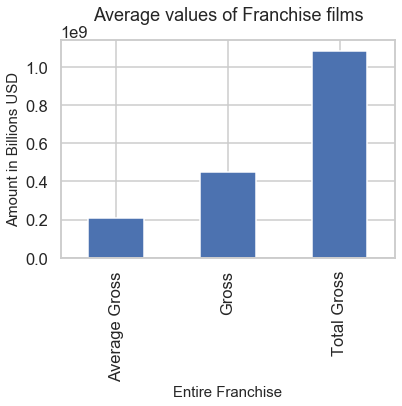

In [166]:
# Make a list of columns we do not want to analyze, movie count will be too small,
# lets focus on monetary values for the moment.
exclude = ['Movie Count']
# Make a bar plot using the mean values of franchise_2_df.
# Use label based indexing and the difference method to return the mean 
# values of the dataframe without the excluded columns.
franchise_2_df.loc[:, franchise_2_df.columns.difference(
    exclude)].mean().plot(kind='bar')
# Set the plot title, and spacing from plot
plt.title('Average values of Franchise films', pad=20.0)
# Set the y-axis label and define its fontsize
plt.ylabel('Amount in Billions USD', fontsize=15)
# Set the x-axis label and define its fontsize
plt.xlabel('Entire Franchise', fontsize=15)

# Show plot
plt.show()

This chart shows us that Film Franchises are quite lucrative. The **average domestic gross of a franchise film is 200 million dollars**, while the **gross of a franchise's number one film is around 450 million dollars**. The **average gross of an entire franchise however is 1.8 billion dollars**.

Lets make subplots comparing the top 50 highest grossing franchise films, and 50 highest grossing films.

### Top Franchise & Top Grossing Trends

So far our describe method data would suggest that franchise films have a high correlation with being among the highest grossing films in the industry. Lets take a closer look into the links between franchise and high gross performance.

In [167]:
# Review dataframe to look for meaningful features
franchise_df.head(10)

Franchise  No. of Movies  Domestic Box Office  \
0  Marvel Cinematic Universe             30           8545426433   
1                  Star Wars             15           5075019577   
2                 James Bond             27           2136666623   
3                     Batman             22           2786557399   
4               Harry Potter             12           2786938291   
5                 Spider-Man             10           2715087276   
6                      X-Men             14           2434609696   
7                   Avengers              4           2619552260   
8              Jurassic Park              6           1882766527   
9                  Star Trek             13           1400952879   

   Infl. Adj. Dom. Box Office  Worldwide Box Office  First Year  Last Year  \
0                  9102945801           22590455007        2008       2022   
1                  8035697253           10310160586        1977       2026   
2                  5931136027            7119674009        1963       2020   
3                  3948280777            6049944480        1989       2021   
4                  3638704111            9185046972        2001       2021   
5                  3298866477            7227553657        2002       2019   
6                  2878961702            6049624526        2000       2020   
7                  2746635625            7767987269        2012       2019   
8                  2705746069            4987492478        1993       2021   
9                  2594747188            2267036257        1979       2016   

   No. of Years  
0          14.0  
1          49.0  
2          57.0  
3          32.0  
4          20.0  
5          17.0  
6          20.0  
7           7.0  
8          28.0  
9          37.0

In [168]:
# Get basic statistics to search for correlations
franchise_df.describe()

No. of Movies  Domestic Box Office  Infl. Adj. Dom. Box Office  \
count     853.000000         8.530000e+02                8.530000e+02   
mean        2.976553         1.724673e+08                2.712933e+08   
std         2.721315         4.647694e+08                6.282967e+08   
min         1.000000         0.000000e+00                0.000000e+00   
25%         2.000000         8.984040e+05                1.261653e+06   
50%         2.000000         4.802291e+07                8.630916e+07   
75%         3.000000         1.693278e+08                2.818417e+08   
max        32.000000         8.545426e+09                9.102946e+09   

       Worldwide Box Office   First Year    Last Year  No. of Years  
count          8.530000e+02   853.000000   853.000000    853.000000  
mean           4.135731e+08  1999.856975  2009.014068     10.050410  
std            1.220856e+09    14.465458    11.197115     10.944849  
min            0.000000e+00  1933.000000  1935.000000      1.000000  
25%            1.139279e+07  1991.000000  2005.000000      4.000000  
50%            7.939766e+07  2004.000000  2013.000000      6.000000  
75%            3.208965e+08  2011.000000  2017.000000     12.000000  
max            2.259046e+10  2020.000000  2027.000000     87.000000

<Figure size 1440x1440 with 0 Axes>

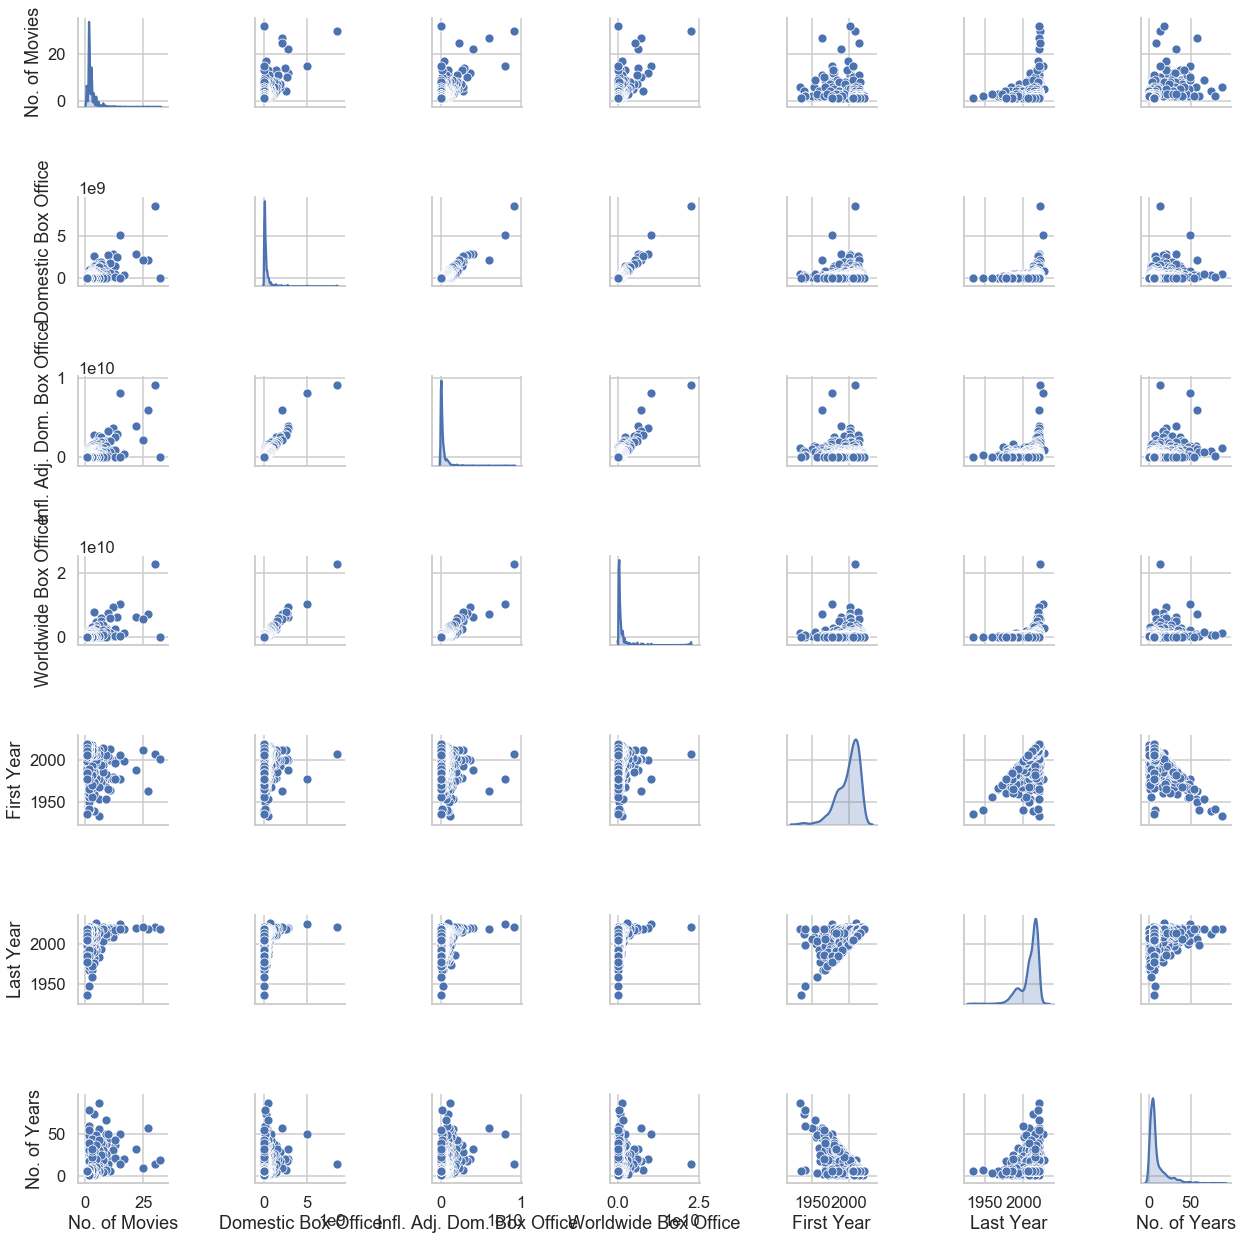

<Figure size 1440x1440 with 0 Axes>

In [169]:
# Use a pairplot to show relationships among features within the franchise films
sns.pairplot(franchise_df, palette="husl", diag_kind="kde")
plt.figure(figsize=(20,20))

This gives us a lot of information to look through. There appears to be a correlation among the no. of movies and no. of years categories. Lets further investigate this pattern.

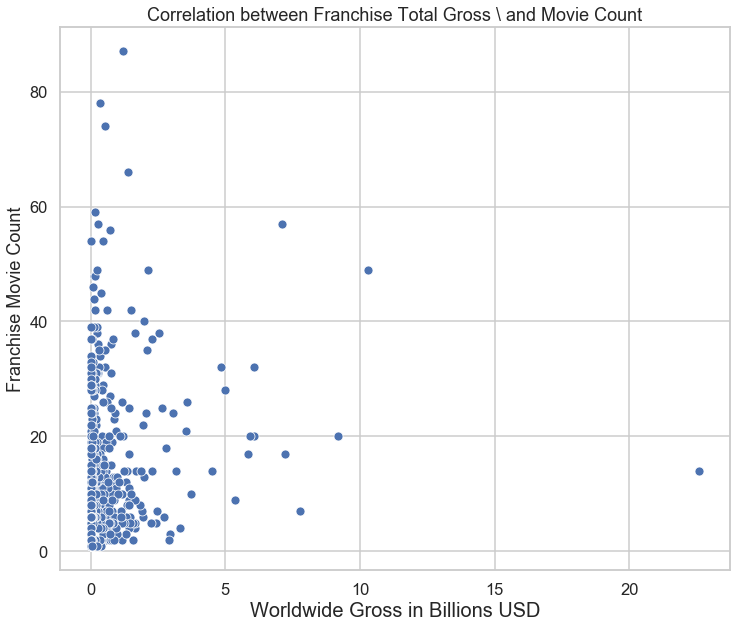

In [170]:
# Create a plot and define its size
plt.figure(figsize=(12, 10))
# Draw a seaborn scatterplot that shows the correlation between franchise total gross
# and franchise movie count, set colors by budget range.
sns.scatterplot(x=franchise_df['Worldwide Box Office']/1000000000,
                y=franchise_df['No. of Years'], palette="husl")
# Set plot title
plt.title('Correlation between Franchise Total Gross \ and Movie Count')
# Set x-axis label and define fontsize
plt.xlabel('Worldwide Gross in Billions USD', fontsize=20)
# Set y-axis label and define fontsize
plt.ylabel('Franchise Movie Count')
# Remove scientific notation from plot
plt.ticklabel_format(style='plain', axis='x')

# Show plot
plt.show()

In [171]:
franchise_2_df.head()

Franchise  Total Gross  Movie Count  Average Gross  \
0        Marvel Cinematic Universe   8525300000           23      370700000   
1                        Star Wars   4220700000           11      383700000   
2  Disney Live Action Reimaginings    322000000           14       23000000   
3                  Wizarding World   2785400000           10      253200000   
4                         Avengers   2619100000            4      654800000   

                           Highest Grossing Film        Gross  
0                              Avengers: Endgame  857900000.0  
1                   Star Wars: The Force Awakens  936700000.0  
2                           Beauty and the Beast   50400000.0  
3  Harry Potter and the Deathly Hallows – Part 2   38100000.0  
4                              Avengers: Endgame  857900000.0

In [172]:
franchise_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
Franchise                67 non-null object
Total Gross              67 non-null int64
Movie Count              67 non-null int64
Average Gross            67 non-null int64
Highest Grossing Film    67 non-null object
Gross                    67 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ KB


In [173]:
franchise_2_df.describe()

Total Gross  Movie Count  Average Gross         Gross
count  6.700000e+01    67.000000   6.700000e+01  6.700000e+01
mean   1.083497e+09     5.656716   2.066090e+08  4.495784e+08
std    1.231496e+09     4.318923   1.135738e+08  1.228575e+09
min    3.060000e+07     2.000000   8.800000e+06  1.710000e+07
25%    5.349500e+08     3.000000   1.351000e+08  1.900000e+08
50%    6.816000e+08     4.000000   1.925000e+08  2.631500e+08
75%    1.391550e+09     7.000000   2.724500e+08  4.029000e+08
max    8.525300e+09    25.000000   6.548000e+08  1.021100e+10

<Figure size 1440x2880 with 0 Axes>

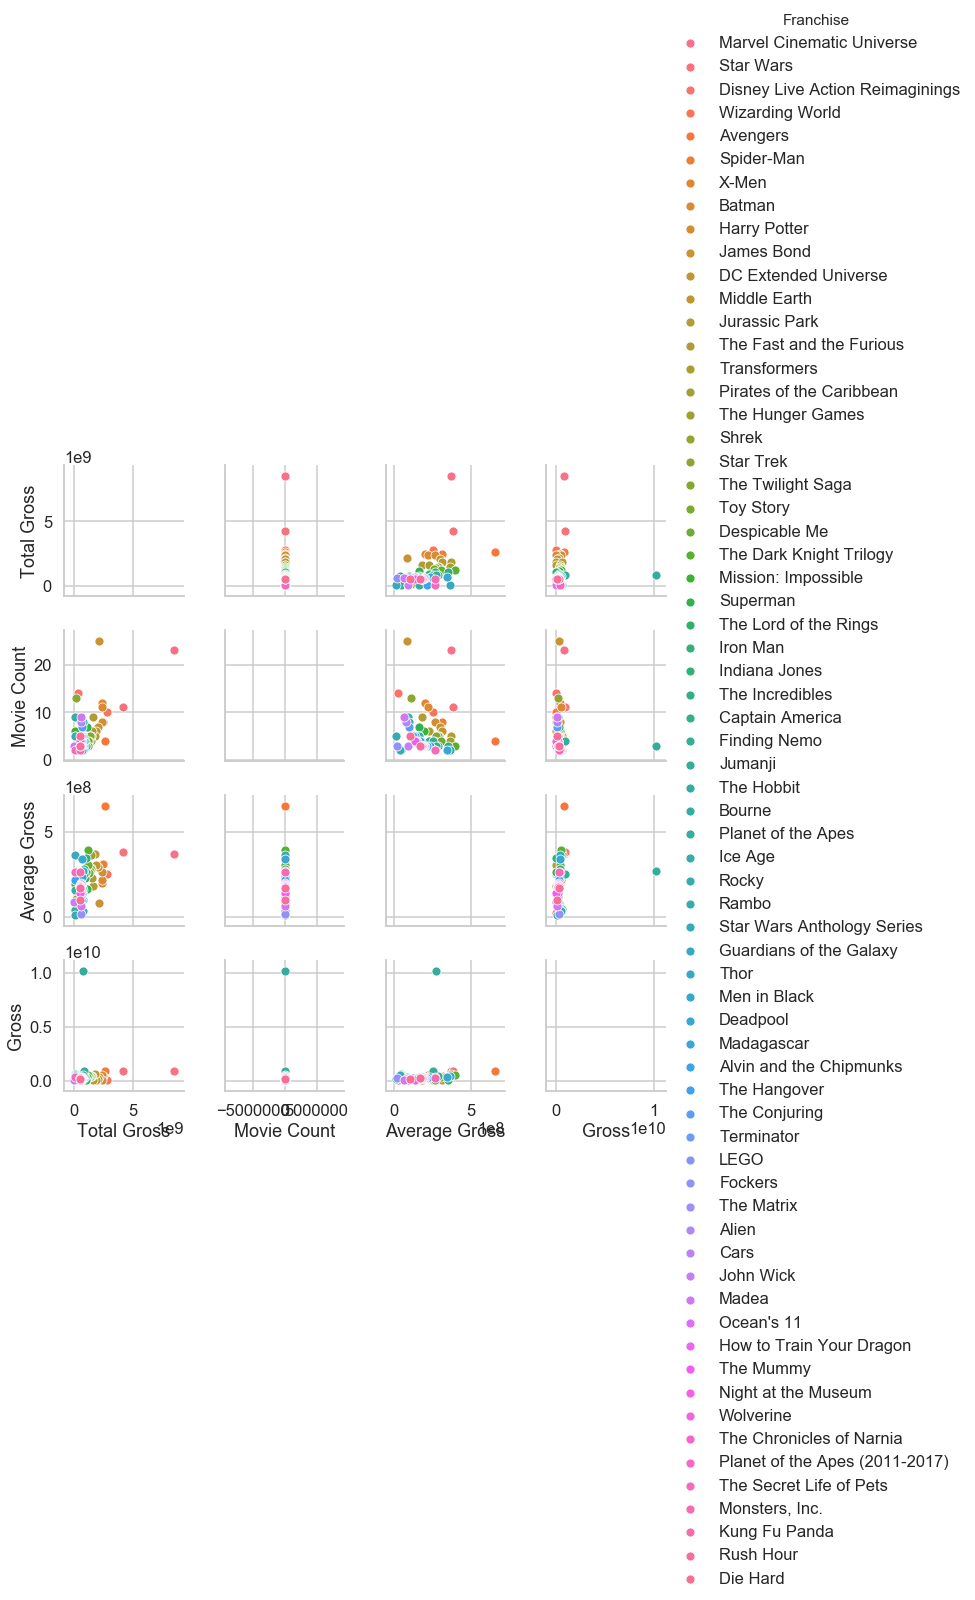

<Figure size 1440x2880 with 0 Axes>

In [174]:
# Use a pairplot to show relationships between features within the franchise films
sns.pairplot(franchise_2_df, palette="husl", diag_kind="kde", hue='Franchise')
plt.figure(figsize=(20,40))

Now that we can take a full look at our data, there appear to be some interesting patterns. Lets turn our investigation into the amount of films a franchise has. To visualize this better, we can use a barplot showing the count of films each of our franchises have.

### Franchise Movie Count & Franchise Age Correlations

Text(0, 0.5, 'Years')

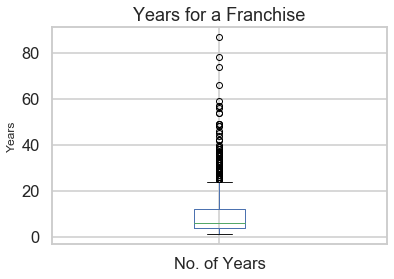

In [175]:
exclude = ['No. of Movies', 'Domestic Box Office', 'Infl. Adj. Dom. Box Office', 'Worldwide Box Office', 'First Year', 'Last Year']
franchise_df.loc[:, franchise_df.columns.difference(exclude)].plot(kind='box')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Years for a Franchise')
plt.ylabel('Years', fontsize=12)

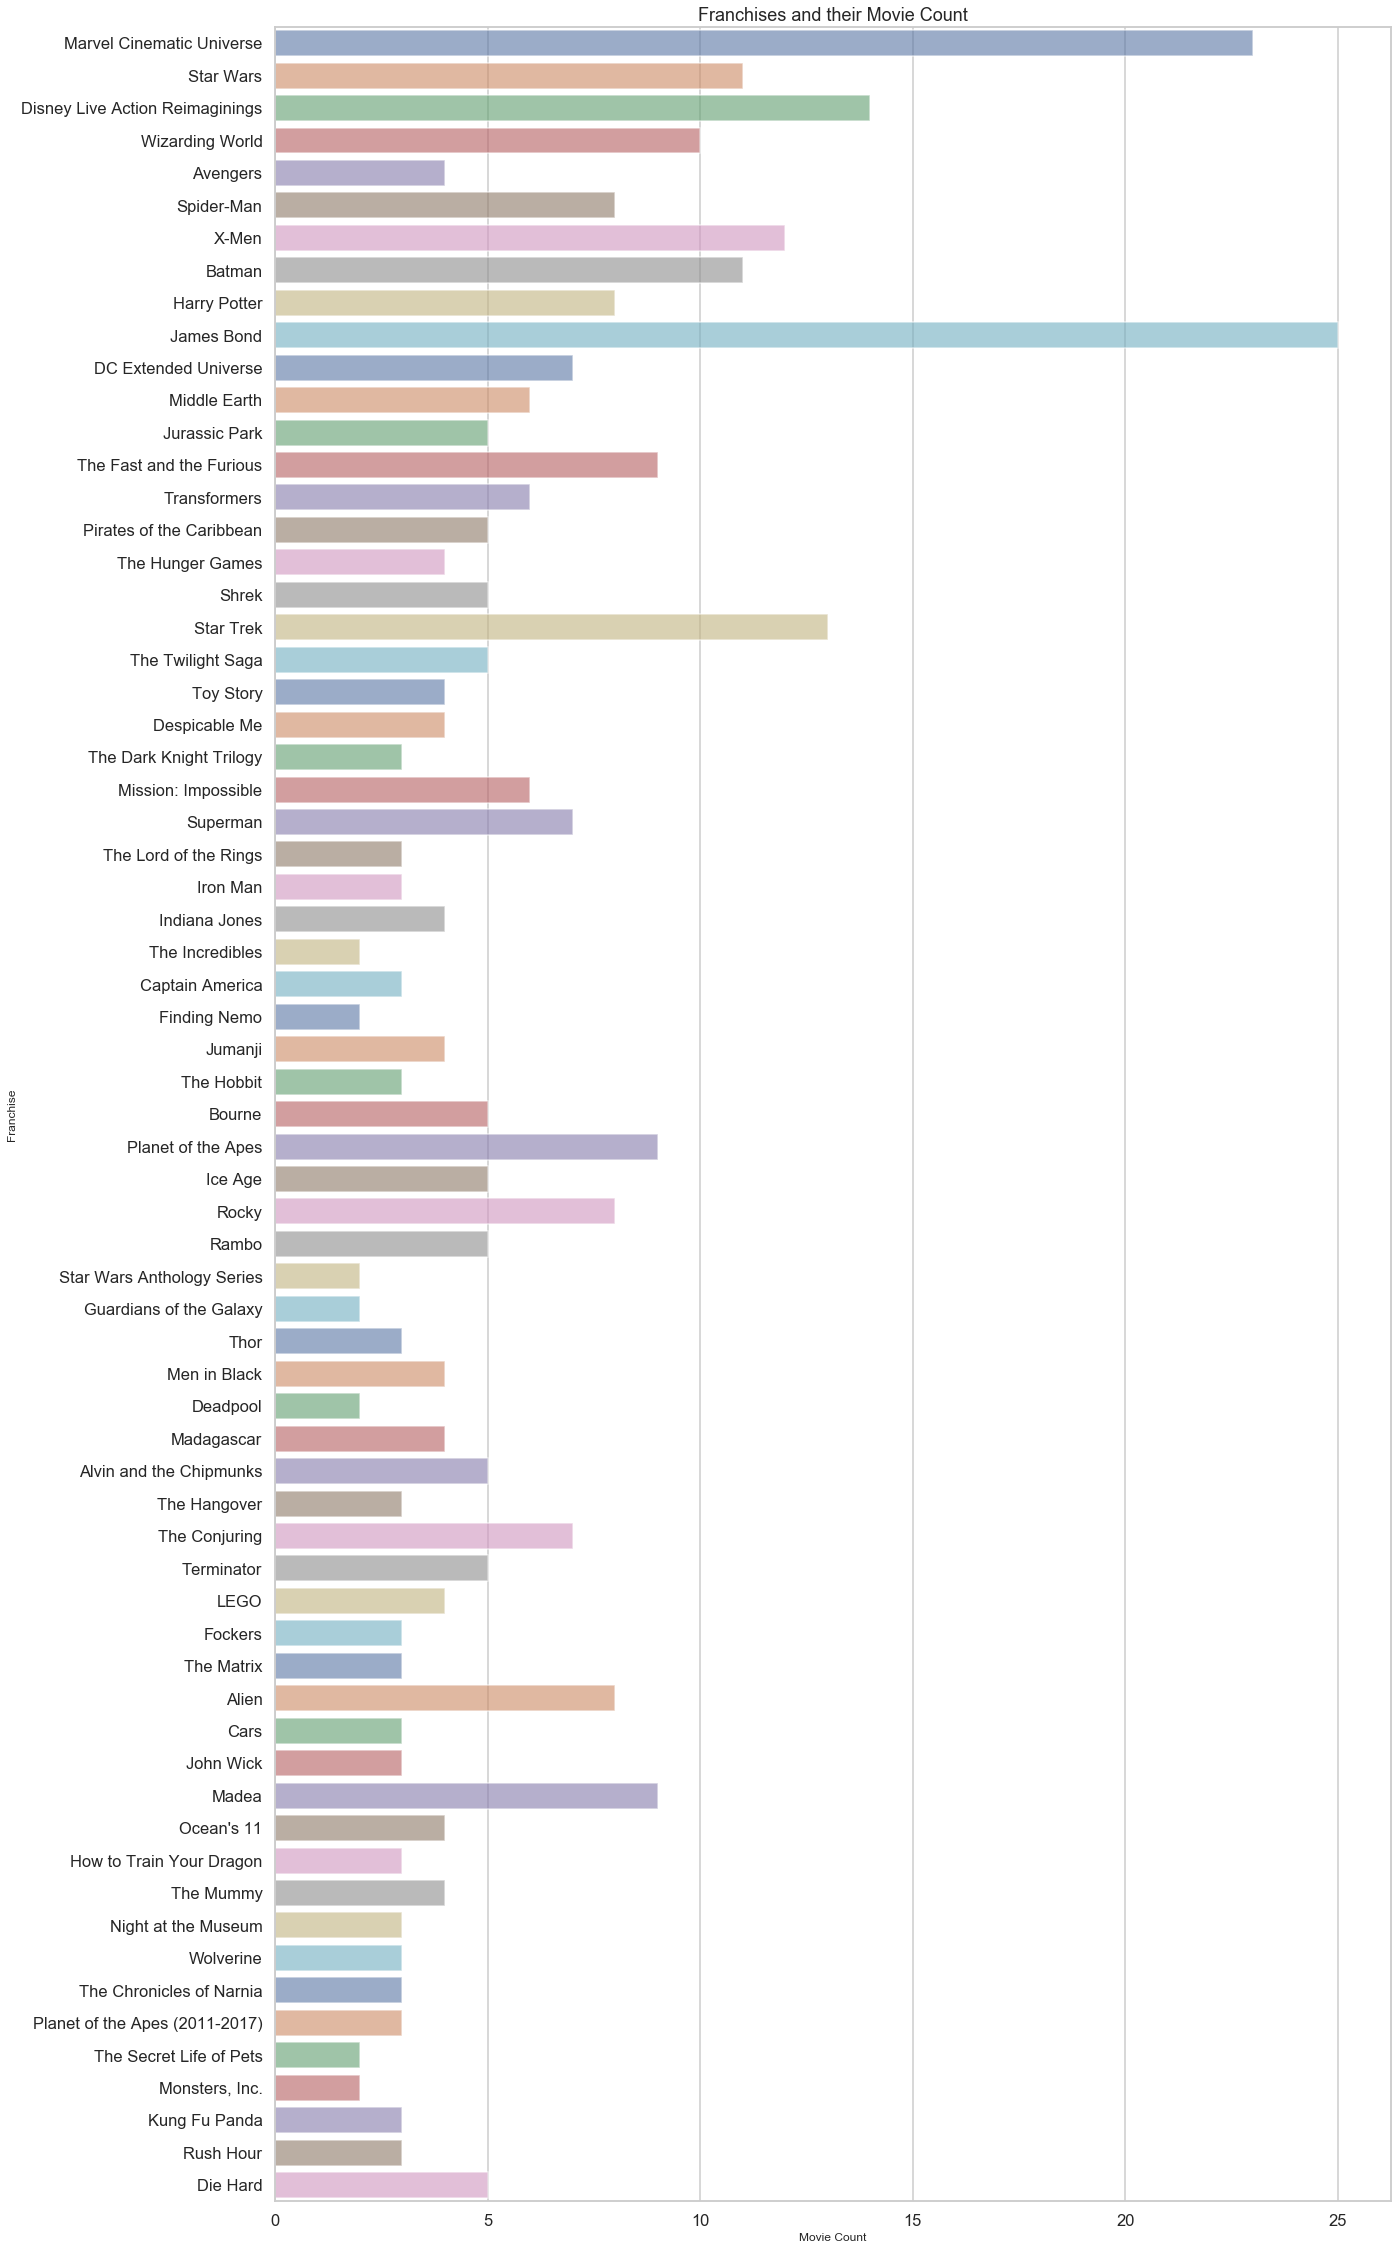

In [176]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(20, 40))
sns.barplot(x=franchise_2_df['Movie Count'],
                y=franchise_2_df['Franchise'], alpha=0.6, palette="deep")
plt.title('Franchises and their Movie Count')
plt.ylabel('Franchise', fontsize=12)
plt.xlabel('Movie Count', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
#plt.ticklabel_format(style='plain', axis='y')
plt.show()

This gives a clearer picture of the number of films a franchise has. Is there a correlation between the movie count of a franchise, and the number of years a franchise has been created? We can see from the describe method used earlier that the mean number of years a film franchise has been active is 10 years. We can also see that the average number of movies per franchise is 3-5. Lets see if there is a correlation between the number of years a franchise has been around and the number of movies a franchise has released.

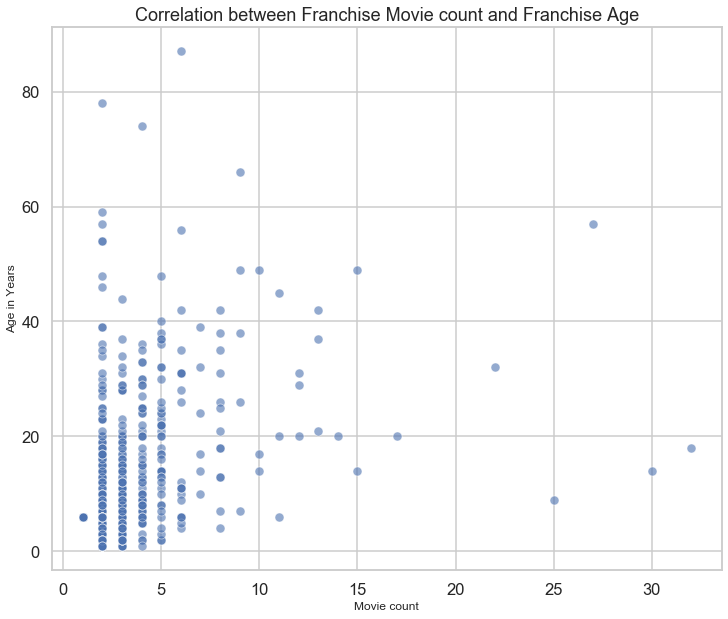

In [177]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 10))
sns.scatterplot(x=franchise_df['No. of Movies'],
                y=franchise_df['No. of Years'], alpha=0.6, palette='blues')
plt.title('Correlation between Franchise Movie count and Franchise Age')
plt.ylabel('Age in Years', fontsize=12)
plt.xlabel('Movie count', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [178]:
# Use a lambda function to iterate through each stat to change its format.
franchise_2_df['Total Gross'].describe().apply(lambda x: format(x, 'f'))

count            67.000000
mean     1083497014.925373
std      1231496090.247137
min        30600000.000000
25%       534950000.000000
50%       681600000.000000
75%      1391550000.000000
max      8525300000.000000
Name: Total Gross, dtype: object

### Franchise Trends Insights

Here we can confirm that **most Franchises have no more than 5 films**. This is useful information if the studio decides to create a film franchise. An insight that we can gain here is that the more films a studio is able to make, the longer the franchise stays alive, and vice versa. The average number of films a **Franchise has is between 3-5 films**, while the **average age of film Franchises is 10 years**. This would equate to a film roughly every 2-3 years.The average franchise gross was around **10.8 billion dollars**. 

Domain Knowledge also informs us that nearly all of the film franchises are composed of Action and Adventure genres. This correlates strongly with the results of our first inquiry, and is worth looking further into. Lets take a quick glance at some of the Microsoft owned content that may successful franchises.

### Viable Microsoft Franchises

Microsoft is already the owner of lots of popular content, especially within the gaming industry. If Microsoft were interested in creating a film franchise, it may be worth looking into the content for which they already own the rights, versus buying the rights like many other film studios. Lets take a look at some of the best selling Microsoft Games for their potential to be transformed into film franchises.

Lets again use webscraping to get data on some of the most popular Microsoft Game Studios video games. We can find which games are most popular by comparing games across Microsoft's various gaming platforms. Here we can use the web to get dataframes of Microsoft games on Android, iOS, PC, and XBox One.

In [179]:
# Read in Wikipedia Page detailing Microsoft games across different platforms
mic_games = pd.read_html('sites/List of Xbox Game Studios video games - Wikipedia.html')

In [180]:
# Check type of mic_games
type(mic_games)

list

In [181]:
# Get the length of our list
len(mic_games)

10

In [182]:
# Take a look at the contents of our list
mic_games

[                             Title                    Genre(s)  \
 0     Age of Empires: Castle Siege     Strategy, Tower-defense   
 1                     Forza Street                      Racing   
 2                       Gears POP!                    Strategy   
 3                      Kinectimals                 Digital pet   
 4            Kinectimals Unleashed                 Digital pet   
 5   Microsoft Solitaire Collection                Card & Board   
 6              Microsoft Wordament                Card & Board   
 7                        Minecraft           Sandbox, survival   
 8                  Minecraft Earth  Augmented reality, sandbox   
 9                        QuizToWin                   Live Game   
 10                     Snap Attack                 Word puzzle   
 11    Tentacles: Enter The Dolphin                  Platformer   
 12                       Wordament                 Word puzzle   
 
                   Release date                        Devel

In [183]:
# Create a dataframe of the Android Games.
mic_android = mic_games[0]
mic_android

Title                    Genre(s)  \
0     Age of Empires: Castle Siege     Strategy, Tower-defense   
1                     Forza Street                      Racing   
2                       Gears POP!                    Strategy   
3                      Kinectimals                 Digital pet   
4            Kinectimals Unleashed                 Digital pet   
5   Microsoft Solitaire Collection                Card & Board   
6              Microsoft Wordament                Card & Board   
7                        Minecraft           Sandbox, survival   
8                  Minecraft Earth  Augmented reality, sandbox   
9                        QuizToWin                   Live Game   
10                     Snap Attack                 Word puzzle   
11    Tentacles: Enter The Dolphin                  Platformer   
12                       Wordament                 Word puzzle   

                  Release date                        Developer(s)  
0                April 6, 2017             Smoking Gun Interactive  
1                          TBD  Electric Square, a Keywords Studio  
2              August 22, 2019                    Mediatonic Games  
3            December 13, 2011               Frontier Developments  
4            November 28, 2014               Frontier Developments  
5            November 23, 2016                            Arkadium  
6            November 26, 2018               Behaviour Interactive  
7              October 7, 2011                              Mojang  
8   Closed beta: July 16, 2019                              Mojang  
9                  May 9, 2014                    Microsoft Europe  
10                 May 6, 2014                You vs. the Internet  
11                 May 8, 2014                          Press Play  
12             October 8, 2013                You vs. the Internet

In [184]:
# Create a dataframe of the iOS games.
mic_ios = mic_games[1]
mic_ios

Title                    Genre(s)  \
0     Age of Empires: Castle Siege     Strategy, Tower-defense   
1                     Forza Street                      Racing   
2                       Gears POP!                    Strategy   
3            Halo: Spartan Assault         Twin Sticks Shooter   
4             Halo: Spartan Strike         Twin Sticks Shooter   
5                      Kinectimals                 Digital pet   
6            Kinectimals Unleashed                 Digital pet   
7   Microsoft Solitaire Collection                Card & Board   
8              Microsoft Wordament                Card & Board   
9                        Minecraft           Sandbox, survival   
10                 Minecraft Earth  Augmented reality, sandbox   
11                Ms. Splosion Man                  Platformer   
12                       QuizToWin                   Live Game   
13                     Snap Attack                 Word puzzle   
14    Tentacles: Enter The Dolphin                  Platformer   
15                       Wordament                 Word puzzle   

                  Release date                        Developer(s)  
0                 May 20, 2015             Smoking Gun Interactive  
1                          TBD  Electric Square, a Keywords Studio  
2              August 22, 2019                    Mediatonic Games  
3                July 18, 2013                      Vanguard Games  
4               April 16, 2015                      Vanguard Games  
5            December 13, 2011               Frontier Developments  
6            November 28, 2014               Frontier Developments  
7           September 26, 2016                            Arkadium  
8            November 26, 2018               Behaviour Interactive  
9            November 17, 2011                              Mojang  
10  Closed beta: July 16, 2019                              Mojang  
11              March 28, 2013                 Twisted Pixel Games  
12                 May 9, 2014                    Microsoft Europe  
13                 May 6, 2014                You vs. the Internet  
14             October 4, 2012                          Press Play  
15           December 21, 2012                You vs. the Internet

In [185]:
# Create a dataframe of the PC games.
mic_pc = mic_games[2]
mic_pc

Title                  Genre(s)  \
0                   3D Pinball Space Cadet      Arcade game, Pinball   
1                   A Kingdom for Keflings        City-building game   
2                           Age of Empires        Real-time strategy   
3      Age of Empires II: The Age of Kings        Real-time strategy   
4                       Age of Empires III        Real-time strategy   
..                                     ...                       ...   
122                            Viva Piñata           Life simulation   
123  Where's Waldo?: The Fantastic Journey         Puzzle, Adventure   
124                           World of Goo                    Puzzle   
125                             Zoo Tycoon  Business simulation game   
126                           Zoo Tycoon 2  Business simulation game   

           Release date             Developer(s)  
0       August 24, 1995  David Plummer/Microsoft  
1        March 20, 2010                 NinjaBee  
2      October 15, 1997         Ensemble Studios  
3    September 30, 1999         Ensemble Studios  
4      October 18, 2005         Ensemble Studios  
..                  ...                      ...  
122    November 6, 2007                     Rare  
123  September 22, 2009                    Ludia  
124    October 13, 2008                   2D Boy  
125    October 17, 2001          Blue Fang Games  
126    November 9, 2004          Blue Fang Games  

[127 rows x 4 columns]

In [186]:
# Create a dataframe of the XBox One games
mic_xbox_one = mic_games[5]
mic_xbox_one

Title                           Genre(s)  \
0                              Battletoads            Beat 'em up, platformer   
1                            Bleeding Edge                       Team brawler   
2        Cobalt (Co-published with Mojang)                             Action   
3                              Crackdown 3                   Action-adventure   
4                           Crimson Dragon                       Rail shooter   
..                                     ...                                ...   
62                      Super Lucky's Tale                           Platform   
63                             Tell Me Why                          Adventure   
64                         Voice Commander  Real-time strategy, Tower defense   
65                              Zoo Tycoon                Business simulation   
66  Zoo Tycoon: Ultimate Animal Collection                Business simulation   

         Release date           Developer(s)  
0            TBA 2020          Dlala Studios  
1      March 24, 2020           Ninja Theory  
2    February 2, 2016      Oxeye Game Studio  
3   February 15, 2019           Sumo Digital  
4   September 4, 2014          Grounding Inc  
..                ...                    ...  
62   November 7, 2017          Playful Corp.  
63       TBA Mid-2020  Dontnod Entertainment  
64   October 22, 2014      Microsoft Foundry  
65  November 22, 2013  Frontier Developments  
66   October 31, 2017           Asobo Studio  

[67 rows x 4 columns]

Among these games there are some that appear to be on every platform Microsoft is available on, and among these there are record breaking titles. Lets take a look at some of the most notable to see if they compare to some of the top grossing feature films.

#### Minecraft

![title](img/minecraft.png)

![title](img/Minecraft_Momentum.png)

![title](img/statistic_id680124_minecraft-unit-sales-worldwide-2016-2019.png)

![title](img/statistic_id972711_mobile-gross-revenue-of-minecraft-worldwide-2017-2018.png)

##### Minecraft Insights

There is no doubt that Minecraft has a global following of devoted players. We can see that Minecraft brings a large revenue in for Microsoft. With so much success, Minecraft could be a potential contender to make into a fim Franchise for Microsoft. There are a number of animated film franchises from Disney that top the gross charts including Toy Story and the Lion King. Minecraft's genre also lends itself to easily transforming into an Action or Adventure movie.

#### Halo

![title](img/halo.png)

Halo has been one of the most popular gaming franchises of all time. Since its first installment on the original Xbox in 2001, it has sold over 65 million copies.

 - Halo: Combat Evolved: 6.43 million
 - Halo 2: 8.49 million
 - Halo 3: 11.87 million
 - Halo Wars: 2.34 million
 - Halo ODST: 6.22 million
 - Halo Reach: 9.52 million
 - Halo Combat Evolved Anniversary: 2.21 million
 - Halo 4: 8.94 million

##### Halo Insights

While there was once an attempt to create a Halo film that backfired due to production team complications, there is still an obvious potential in taking this record breaking franchise to the big screen. Halo games alone over the past nearly twenty years have grossed over $3 billion dollars. The storyline fits perfectly in line with the trending Action and Adventure genres. With Halo being listed as one of the highest-grossing media franchises of all time and one of the highest grossing video game franchises, it would be worth considering if Microsoft is looking to make franchise films. A Halo franchise could share similar success with films of the Marvel and DC film universe, and share sci-fi features which the Star Wars franchise has popularized.

#### Forza

![title](img/forza.jfif)

The original installment of the Forza gaming franchise was released mid 2015. For 15 years, Forza has allowed Microsoft to maintain a large portion of the racing game market. Since this time, the Forza franchise has sold over 20 million copies, and grossed over 1 billion dollars. With its fast paced content, Microsoft film studios could transform the Forza gaming franchise into a film franchise that could rival the record breaking Fast & Furious franchise.

In [187]:
franchise_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
Franchise                67 non-null object
Total Gross              67 non-null int64
Movie Count              67 non-null int64
Average Gross            67 non-null int64
Highest Grossing Film    67 non-null object
Gross                    67 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ KB


## Q.2 Conclusion

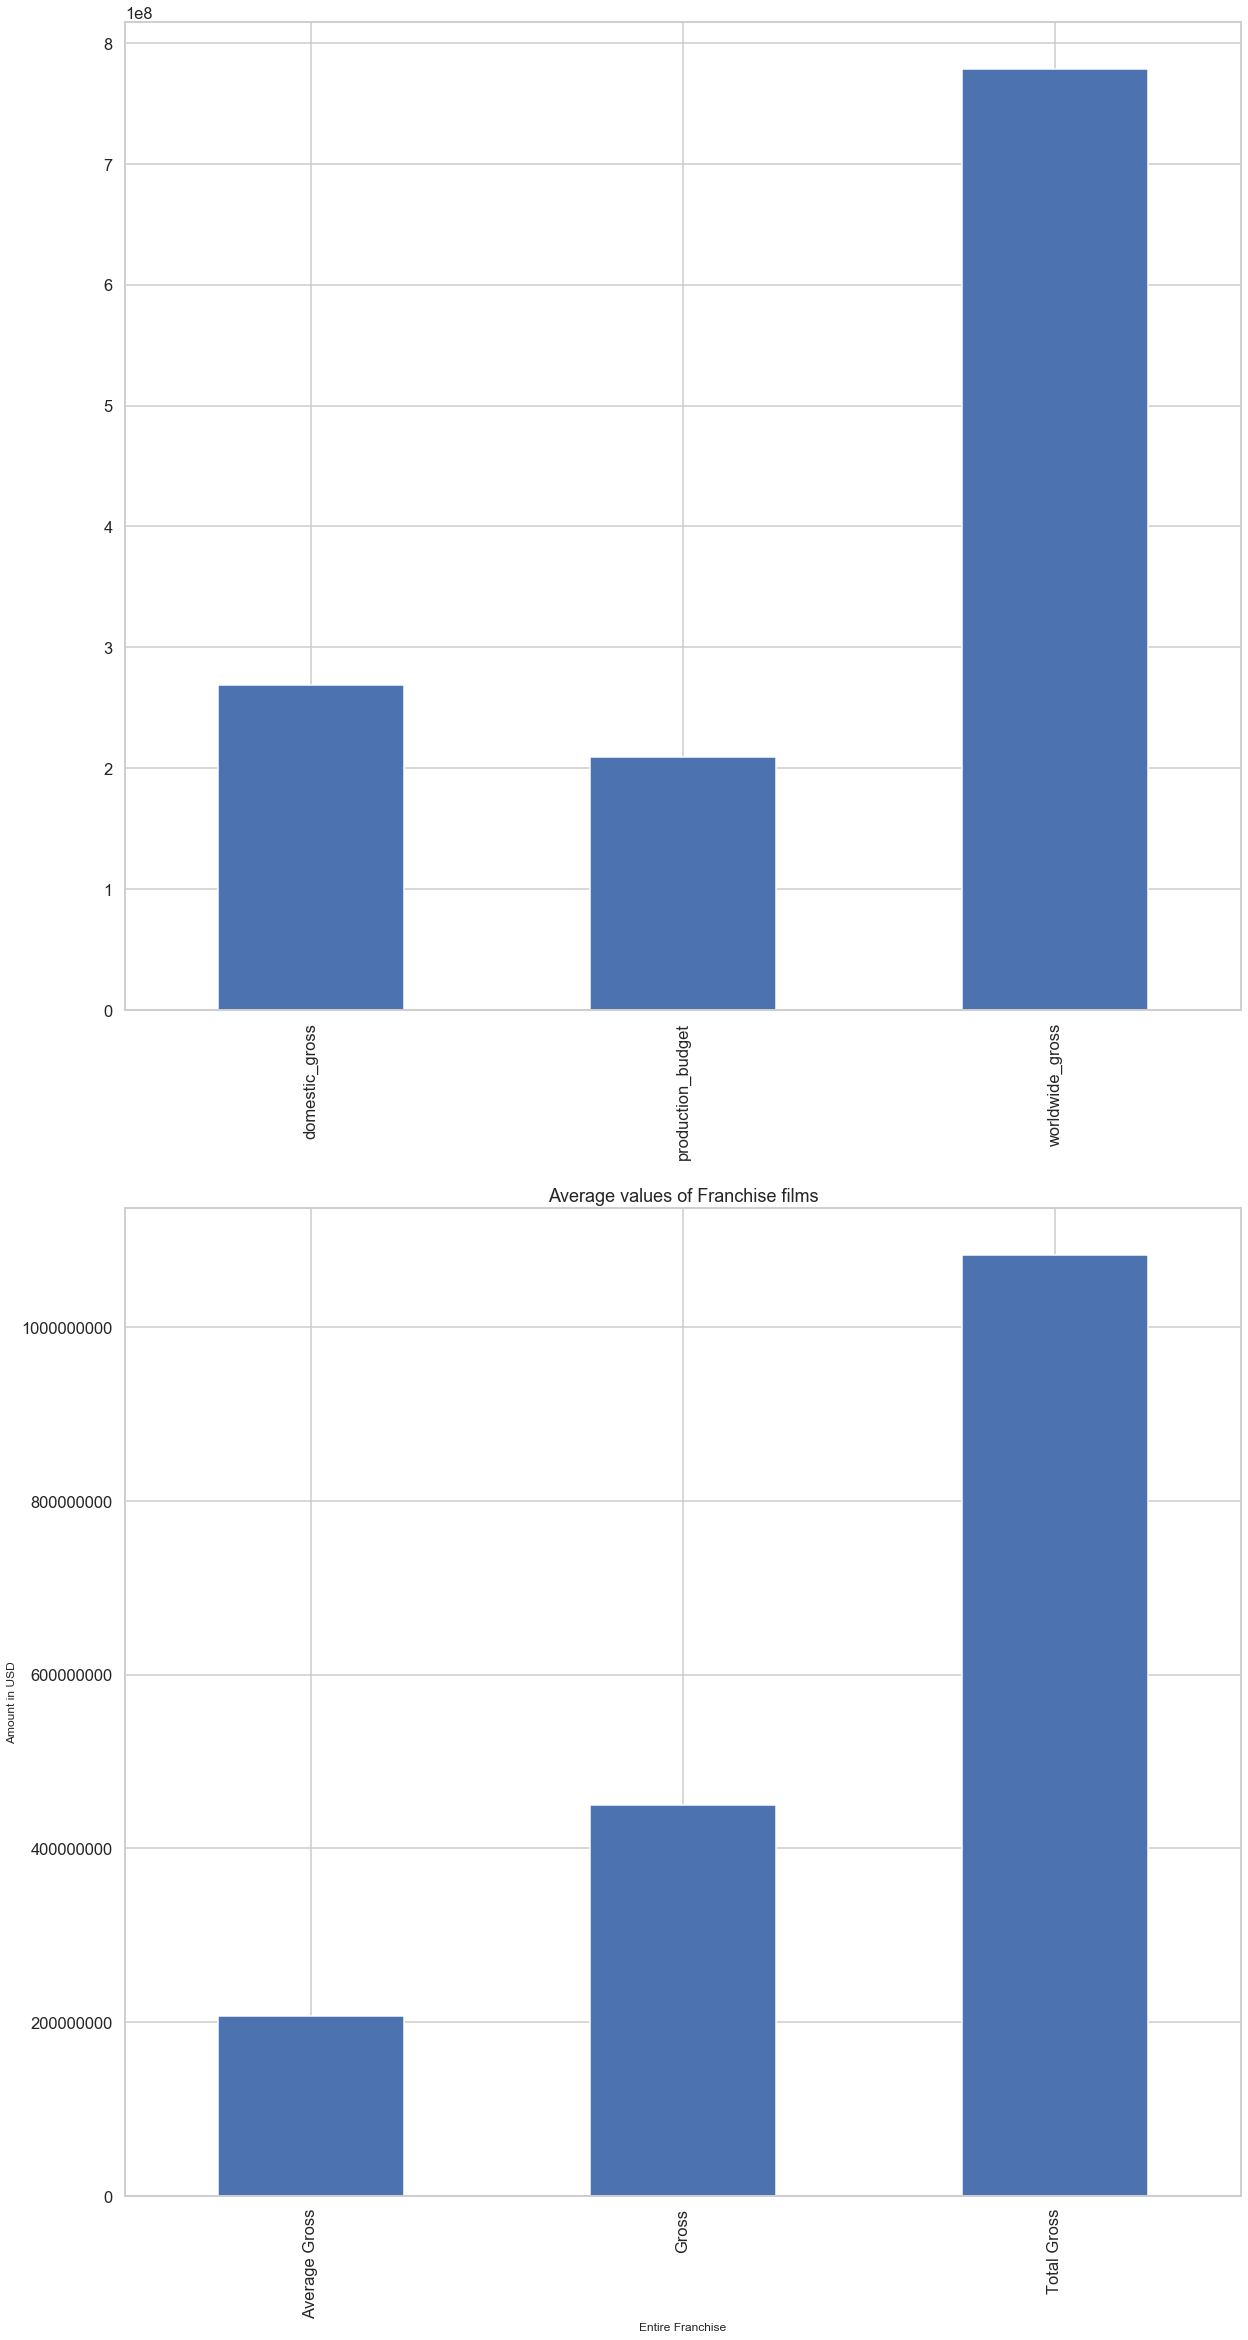

In [188]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,40))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#ax1.set_ylim(0, 8000000000)
#ax2.set_ylim(0, 8000000000)

sns.set(style="whitegrid")
sns.set_context("talk")

# Tell pointplot to plot on ax1 with the ax argument
exclude_1 = ['start_year', 'runtime_minutes']
df_prod_100.loc[:, df_prod_100.columns.difference(
    exclude_1)].mean().plot(kind='bar', ax=ax1)
#plt.ticklabel_format(style='plain', axis='y')
plt.title('Average values of top 100 grossing films')
plt.ylabel('Amount in USD', fontsize=12)
plt.xlabel('Category', fontsize=12)

exclude = ['Movie Count']
franchise_2_df.loc[:, franchise_2_df.columns.difference(
    exclude)].mean().plot(kind='bar', ax=ax2)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average values of Franchise films')
plt.ylabel('Amount in USD', fontsize=12)
plt.xlabel('Entire Franchise', fontsize=12)

plt.show()

Text(0.5, 0, 'Category')

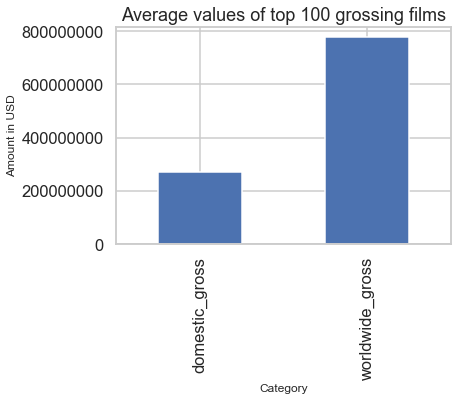

In [189]:
exclude_1 = ['start_year', 'runtime_minutes', 'production_budget']
df_prod_100.loc[:, df_prod_100.columns.difference(
    exclude_1)].mean().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average values of top 100 grossing films')
plt.ylabel('Amount in USD', fontsize=12)
plt.xlabel('Category', fontsize=12)

Text(0.5, 0, 'Entire Franchise')

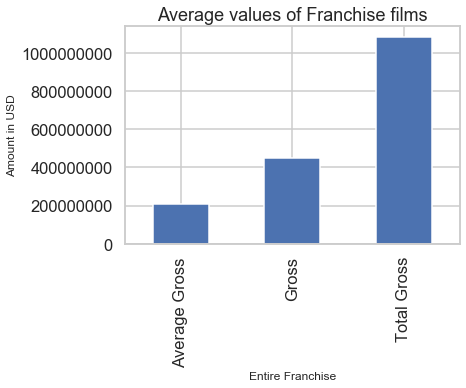

In [190]:
exclude = ['Movie Count']
franchise_2_df.loc[:, franchise_2_df.columns.difference(
    exclude)].mean().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average values of Franchise films')
plt.ylabel('Amount in USD', fontsize=12)
plt.xlabel('Entire Franchise', fontsize=12)

In [191]:
franchise_2_df.describe()

Total Gross  Movie Count  Average Gross         Gross
count  6.700000e+01    67.000000   6.700000e+01  6.700000e+01
mean   1.083497e+09     5.656716   2.066090e+08  4.495784e+08
std    1.231496e+09     4.318923   1.135738e+08  1.228575e+09
min    3.060000e+07     2.000000   8.800000e+06  1.710000e+07
25%    5.349500e+08     3.000000   1.351000e+08  1.900000e+08
50%    6.816000e+08     4.000000   1.925000e+08  2.631500e+08
75%    1.391550e+09     7.000000   2.724500e+08  4.029000e+08
max    8.525300e+09    25.000000   6.548000e+08  1.021100e+10

Upon exploring the relationship between Franchise films and the top 100 grossing films, it is clear that there is a strong correlation. The **average gross of a franchise film was found to be around 200 million dollars**, while the **average gross of a franchise's best performing film was around 450 million dollars**. The **average gross of an entire franchise was 10.8 billion dollars**. 

Creating a franchise would allow Microsoft studios to create a collection of films, **releasing a film on average every 2-3 years**. Data has also shown that the Action and Adventure genre is popular among the most common franchise films.

Upon review of currently owned Microsoft franchises, there appear to be a number of high potential candidates to base a film franchise on, including **Minecraft, Halo, and Forza**. If Microsoft were successful in transferring the fanbases of these gaming franchises into the movie industry, the three franchises combined could add around **33 billion dollars** worth of revenue into the company.

# Q.3 What is a key correlation among Franchise Plots

With franchise films appearing to be among the most successful in the box office, it would prove valuable to explore some common traits of franchise films beyond the genre and budget. Here we can investigate some commonalities between the storylines of these blockbusters, and share these insights with the team at Microsoft to enable them to make one of the most successful franchises of all time.

## The Hero's Journey

When analyzing a franchise, the most important aspect is the fact that the storyline must be one of depth, an epic that allows for several installments to tell the story, and in many cases a space for continuation that allows the story to grow over the years. Using domain knowledge brings me to the Hero's Journey. In Joseph Campbell's most notable work, *The Hero With a Thousand Faces*, a theory is introduced of the hero archetype that has been told countless times across history of the monomyth, or One Myth, known as The Hero’s Journey. The Hero's journey is characterized by 10-12 steps:

1. THE ORDINARY WORLD. The hero, uneasy, uncomfortable or unaware, is introduced sympathetically so the audience can identify with the situation or dilemma. The hero is shown against a background of environment, heredity, and personal history. Some kind of polarity in the hero’s life is pulling in different directions and causing stress.

2. THE CALL TO ADVENTURE. Something shakes up the situation, either from external pressures or from something rising up from deep within, so the hero must face the beginnings of change.

3. REFUSAL OF THE CALL. The hero feels the fear of the unknown and tries to turn away from the adventure, however briefly. Alternately, another character may express the uncertainty and danger ahead.

4. MEETING WITH THE MENTOR. The hero comes across a seasoned traveler of the worlds who gives him or her training, equipment, or advice that will help on the journey. Or the hero reaches within to a source of courage and wisdom.

5. CROSSING THE THRESHOLD. At the end of Act One, the hero commits to leaving the Ordinary World and entering a new region or condition with unfamiliar rules and values.

6. TESTS, ALLIES AND ENEMIES. The hero is tested and sorts out allegiances in the Special World.

7. APPROACH. The hero and newfound allies prepare for the major challenge in the Special world.

8. THE ORDEAL. Near the middle of the story, the hero enters a central space in the Special World and confronts death or faces his or her greatest fear. Out of the moment of death comes a new life.

9. THE REWARD. The hero takes possession of the treasure won by facing death. There may be celebration, but there is also danger of losing the treasure again.

10. THE ROAD BACK. About three-fourths of the way through the story, the hero is driven to complete the adventure, leaving the Special World to be sure the treasure is brought home. Often a chase scene signals the urgency and danger of the mission.

11. THE RESURRECTION. At the climax, the hero is severely tested once more on the threshold of home. He or she is purified by a last sacrifice, another moment of death and rebirth, but on a higher and more complete level. By the hero’s action, the polarities that were in conflict at the beginning are finally resolved.

12. RETURN WITH THE ELIXIR. The hero returns home or continues the journey, bearing some element of the treasure that has the power to transform the world as the hero has been transformed.

There are many successful films that follow the plot of the monomyth, indeed it has long been apart of human history. Lets take a look at some franchises that share follow the Hero's Journey and how they align with its steps.

![title](img/HerosJourneybig.png)

In [192]:
franchise_2_df.head(60)

Franchise  Total Gross  Movie Count  Average Gross  \
0         Marvel Cinematic Universe   8525300000           23      370700000   
1                         Star Wars   4220700000           11      383700000   
2   Disney Live Action Reimaginings    322000000           14       23000000   
3                   Wizarding World   2785400000           10      253200000   
4                          Avengers   2619100000            4      654800000   
5                        Spider-Man   2474100000            8      309300000   
6                             X-Men   2428500000           12      202400000   
7                            Batman   2407700000           11      218900000   
8                      Harry Potter   2391800000            8      265800000   
9                        James Bond   2112900000           25       84500000   
10             DC Extended Universe   2063500000            7      294800000   
11                     Middle Earth   1846700000            6      307800000   
12                    Jurassic Park   1837300000            5      367500000   
13         The Fast and the Furious   1625300000            9      180600000   
14                     Transformers   1582400000            6      226100000   
15         Pirates of the Caribbean   1451800000            5      290400000   
16                 The Hunger Games   1451500000            4      362900000   
17                            Shrek   1419600000            5      283900000   
18                        Star Trek    140100000           13      107800000   
19                The Twilight Saga   1363500000            5      272700000   
20                        Toy Story   1302900000            4      260600000   
21                    Despicable Me   1220200000            4      305100000   
22          The Dark Knight Trilogy   1186800000            3      395600000   
23              Mission: Impossible    115500000            6      192500000   
24                         Superman   1139500000            7      162800000   
25            The Lord of the Rings   1060700000            3      265200000   
26                         Iron Man   1039900000            3      346600000   
27                    Indiana Jones    906400000            4      226600000   
28                  The Incredibles     87000000            2       43500000   
29                  Captain America    844500000            3      281500000   
30                     Finding Nemo     82600000            2       41300000   
31                          Jumanji    817700000            4      252500000   
32                       The Hobbit    816500000            3      272200000   
33                           Bourne     80100000            5      160200000   
34               Planet of the Apes     79400000            9       88200000   
35                          Ice Age    793700000            5      158700000   
36                            Rocky    791100000            8       98900000   
37                            Rambo     79300000            5        8800000   
38       Star Wars Anthology Series    745900000            2       37300000   
39          Guardians of the Galaxy     72300000            2      361500000   
40                             Thor    702500000            3      234200000   
41                     Men in Black    699400000            4      174900000   
42                         Deadpool    681600000            2      340800000   
43                       Madagascar    673300000            4      168300000   
44          Alvin and the Chipmunks    662700000            5      132500000   
45                     The Hangover     64400000            3      214700000   
46                    The Conjuring    672600000            7       96200000   
47                       Terminator    608700000            5      121700000   
48                             LEGO    598600000            4      149600000   
49                        

In [193]:
franchise_2_df.duplicated().values.any()

False

In [194]:
franchise_df.head(50)

Franchise  No. of Movies  Domestic Box Office  \
0           Marvel Cinematic Universe             30           8545426433   
1                           Star Wars             15           5075019577   
2                          James Bond             27           2136666623   
3                              Batman             22           2786557399   
4                        Harry Potter             12           2786938291   
5                          Spider-Man             10           2715087276   
6                               X-Men             14           2434609696   
7                            Avengers              4           2619552260   
8                       Jurassic Park              6           1882766527   
9                           Star Trek             13           1400952879   
10  Peter Jackson's Lord of the Rings              7           1852304517   
11               DC Extended Universe             25           2103903493   
12                      Indiana Jones              5            919839275   
13                           Superman              9           1152698852   
14               Fast and the Furious             11           1690752038   
15                              Shrek              8           1419598493   
16                              Rocky              8            792039875   
17           Pirates of the Caribbean              5           1451769807   
18                       Transformers              7           1582401601   
19                          Toy Story              5           1317393746   
20                               Jaws              4            420895891   
21                       Hunger Games              4           1451538526   
22                           Twilight              6           1365922346   
23                Mission: Impossible              8           1154492507   
24                Dark Knight Trilogy              3           1190225564   
25                          Peter Pan              6            355579537   
26                 Planet of the Apes              9            793882111   
27                      The Lion King              4            965423326   
28                      Despicable Me              6           1220249440   
29                 Lady and the Tramp              2             93600000   
30                           Exorcist              5            322436443   
31                         Billy Jack              3            223000000   
32                           Iron Man              3           1040029729   
33                       Mary Poppins              2            274230583   
34                          King Kong              6            453458502   
35                              Alien              8            591630347   
36                       Men in Black              5            704184140   
37                         Terminator              6            669177934   
38                       Finding Nemo              2            866824931   
39                  Beverly Hills Cop              4            431012375   
40                         Home Alone              5            490039196   
41                      Lethal Weapon              4            487622466   
42                             Bourne              5            800424270   
43                            Ice Age              5            793676582   
44                       Ghostbusters              4            483057779   
45                         Cinderella              2             85000000   
46                    The Incredibles              2            870022836   
47                            Airport              4            190774302   
48                 Back to the Future              3            418765047   
49                          Jack Ryan              5            495058617   

    Infl. Adj. Dom. Box Office  Worldwide Box Office  First Year  Last Year  \
0                   9

### New Dataset for Q3

We can see that all of the films in our Hero's Journey diagram are within the top 50 film franchises. This would appear to be a promising correlation among successful film franchises. Lets use a dataframe compiled of films that follow the Heros Journey to further explore this correlation.

In [195]:
from bs4 import BeautifulSoup
import requests

In [196]:
URL = 'https://www.imdb.com/list/ls055945505/'
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')

print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls055945505?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Hero's Journey Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.

In [197]:
heroes = soup.find('div', {'class':'lister list detail sub-list'})

rows = heroes.find_all('', {'class':'lister-item-header'})
print(rows)
type(rows)

[<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0076759/">Star Wars: Episode IV - A New Hope</a>
<span class="lister-item-year text-muted unbold">(1977)</span>
</h3>, <h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">2.</span>
<a href="/title/tt0133093/">The Matrix</a>
<span class="lister-item-year text-muted unbold">(1999)</span>
</h3>, <h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">3.</span>
<a href="/title/tt1104001/">TRON: Legacy</a>
<span class="lister-item-year text-muted unbold">(2010)</span>
</h3>, <h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">4.</span>
<a href="/title/tt0032138/">The Wizard of Oz</a>
<span class="lister-item-year text-muted unbold">(1939)</span>
</h3>, <h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">5.</span>
<a href="/title/tt0089218/">The Goonies</a>
<

bs4.element.ResultSet

In [198]:
hero_df = pd.DataFrame(rows)
hero_df

0      1   2                                                  3   4  \
0   \n   [1.]  \n               [Star Wars: Episode IV - A New Hope]  \n   
1   \n   [2.]  \n                                       [The Matrix]  \n   
2   \n   [3.]  \n                                     [TRON: Legacy]  \n   
3   \n   [4.]  \n                                 [The Wizard of Oz]  \n   
4   \n   [5.]  \n                                      [The Goonies]  \n   
5   \n   [6.]  \n  [The Chronicles of Narnia: The Lion, the Witch...  \n   
6   \n   [7.]  \n  [The Lord of the Rings: The Fellowship of the ...  \n   
7   \n   [8.]  \n            [The Lord of the Rings: The Two Towers]  \n   
8   \n   [9.]  \n    [The Lord of the Rings: The Return of the King]  \n   
9   \n  [10.]  \n                                        [Star Trek]  \n   
10  \n  [11.]  \n   [Star Wars: Episode V - The Empire Strikes Back]  \n   
11  \n  [12.]  \n       [Star Wars: Episode VI - Return of the Jedi]  \n   
12  \n  [13.]  \n            [Harry Potter and the Sorcerer's Stone]  \n   
13  \n  [14.]  \n          [Harry Potter and the Chamber of Secrets]  \n   
14  \n  [15.]  \n              [Harry Potter and the Goblet of Fire]  \n   
15  \n  [16.]  \n        [Harry Potter and the Order of the Phoenix]  \n   
16  \n  [17.]  \n           [Harry Potter and the Half-Blood Prince]  \n   
17  \n  [18.]  \n         [Harry Potter and the Prisoner of Azkaban]  \n   
18  \n  [19.]  \n     [Harry Potter and the Deathly Hallows: Part 1]  \n   
19  \n  [20.]  \n     [Harry Potter and the Deathly Hallows: Part 2]  \n   
20  \n  [21.]  \n                                           [Avatar]  \n   
21  \n  [22.]  \n                                    [Batman Begins]  \n   
22  \n  [23.]  \n                                     [Man of Steel]  \n   
23  \n  [24.]  \n                                         [Iron Man]  \n   
24  \n  [25.]  \n                 [Bill & Ted's Excellent Adventure]  \n   
25  \n  [26.]  \n                                  [The Last Dragon]  \n   
26  \n  [27.]  \n                                       [Fight Club]  \n   
27  \n  [28.]  \n                      [Big Trouble in Little China]  \n   
28  \n  [29.]  \n                              [Clash of the Titans]  \n   
29  \n  [30.]  \n                                           [Wanted]  \n   
30  \n  [31.]  \n                      [Scott Pilgrim vs. the World]  \n   
31  \n  [32.]  \n  [Percy Jackson & the Olympians: The Lightning ...  \n   
32  \n  [33.]  \n                                    [The Lion King]  \n   
33  \n  [34.]  \n                                     [Finding Nemo]  \n   
34  \n  [35.]  \n                                         [Megamind]  \n   

           5   6  
0   [(1977)]  \n  
1   [(1999)]  \n  
2   [(2010)]  \n  
3   [(1939)]  \n  
4   [(1985)]  \n  
5   [(2005)]  \n  
6   [(2001)]  \n  
7   [(2002)]  \n  
8   [(2003)]  \n  
9   [(2009)]  \n  
10  [(1980)]  \n  
11  [(1983)]  \n  
12  [(2001)]  \n  
13  [(2002)]  \n  
14  [(2005)]  \n  
15  [(2007)]  \n  
16  [(2009)]  \n  
17  [(2004)]  \n  
18  [(2010)]  \n  
19  [(2011)]  \n  
20  [(2009)]  \n  
21  [(2005)]  \n  
22  [(2013)]  \n  
23  [(2008)]  \n  
24  [(1989)]  \n  
25  [(1985)]  \n  
26  [(1999)]  \n  
27  [(1986)]  \n  
28  [(2010)]  \n  
29  [(2008)]  \n  
30  [(2010)]  \n  
31  [(2010)]  \n  
32  [(1994)]  \n  
33  [(2003)]  \n  
34  [(2010)]  \n

In [199]:
del hero_df[0]
del hero_df[1]
del hero_df[2]
del hero_df[4]
del hero_df[6]

hero_df.head()

3         5
0  [Star Wars: Episode IV - A New Hope]  [(1977)]
1                          [The Matrix]  [(1999)]
2                        [TRON: Legacy]  [(2010)]
3                    [The Wizard of Oz]  [(1939)]
4                         [The Goonies]  [(1985)]

In [200]:
hero_df[3] = hero_df[3].apply(lambda x: ','.join(map(str, x)))

In [201]:
hero_df[5] = hero_df[5].apply(lambda x: ','.join(map(str, x)))

In [202]:
hero_df.head()

3       5
0  Star Wars: Episode IV - A New Hope  (1977)
1                          The Matrix  (1999)
2                        TRON: Legacy  (2010)
3                    The Wizard of Oz  (1939)
4                         The Goonies  (1985)

In [203]:
hero_df[5] = hero_df[5].str.replace('(', '')
hero_df[5] = hero_df[5].str.replace(')', '')

In [204]:
hero_df.head()

3     5
0  Star Wars: Episode IV - A New Hope  1977
1                          The Matrix  1999
2                        TRON: Legacy  2010
3                    The Wizard of Oz  1939
4                         The Goonies  1985

In [205]:
hero_df.columns = ['movie', 'year']

In [206]:
hero_df

movie  year
0                  Star Wars: Episode IV - A New Hope  1977
1                                          The Matrix  1999
2                                        TRON: Legacy  2010
3                                    The Wizard of Oz  1939
4                                         The Goonies  1985
5   The Chronicles of Narnia: The Lion, the Witch ...  2005
6   The Lord of the Rings: The Fellowship of the Ring  2001
7               The Lord of the Rings: The Two Towers  2002
8       The Lord of the Rings: The Return of the King  2003
9                                           Star Trek  2009
10     Star Wars: Episode V - The Empire Strikes Back  1980
11         Star Wars: Episode VI - Return of the Jedi  1983
12              Harry Potter and the Sorcerer's Stone  2001
13            Harry Potter and the Chamber of Secrets  2002
14                Harry Potter and the Goblet of Fire  2005
15          Harry Potter and the Order of the Phoenix  2007
16             Harry Potter and the Half-Blood Prince  2009
17           Harry Potter and the Prisoner of Azkaban  2004
18       Harry Potter and the Deathly Hallows: Part 1  2010
19       Harry Potter and the Deathly Hallows: Part 2  2011
20                                             Avatar  2009
21                                      Batman Begins  2005
22                                       Man of Steel  2013
23                                           Iron Man  2008
24                   Bill & Ted's Excellent Adventure  1989
25                                    The Last Dragon  1985
26                                         Fight Club  1999
27                        Big Trouble in Little China  1986
28                                Clash of the Titans  2010
29                                             Wanted  2008
30                        Scott Pilgrim vs. the World  2010
31  Percy Jackson & the Olympians: The Lightning T...  2010
32                                      The Lion King  1994
33                                       Finding Nemo  2003
34                                           Megamind  2010

In [207]:
hero_top = pd.merge(hero_df, df_movies, on='movie')

In [208]:
hero_top

movie  year release_date  \
0                                             Avatar  2009   2009-12-18   
1                                       Man of Steel  2013   2013-06-14   
2                                           Iron Man  2008   2008-05-02   
3                                Clash of the Titans  2010   2010-04-01   
4                                Clash of the Titans  2010   1981-06-12   
5                                             Wanted  2008   2008-06-27   
6                                             Wanted  2008   2008-06-27   
7  Percy Jackson & the Olympians: The Lightning T...  2010   2010-02-12   
8                                      The Lion King  1994   1994-06-15   
9                                           Megamind  2010   2010-11-05   

   production_budget  domestic_gross  worldwide_gross  start_year  \
0          425000000       760507625       2776345279        2011   
1          225000000       291045518        667999518        2013   
2          186000000       318604126        585171547        2013   
3          125000000       163214888        493214888        2010   
4           15000000        30000000         44400000        2010   
5           75000000       134508551        342416460        2010   
6           75000000       134508551        342416460        2011   
7           95000000        88768303        223050874        2010   
8           79300000       421785283        986214868        2019   
9          130000000       148415853        321887208        2010   

   runtime_minutes                     genres  
0             93.0                     Horror  
1            143.0    Action,Adventure,Sci-Fi  
2             84.0        Comedy,Drama,Family  
3            106.0   Action,Adventure,Fantasy  
4            106.0   Action,Adventure,Fantasy  
5            110.0                     Action  
6            160.0               Action,Drama  
7            118.0   Adventure,Family,Fantasy  
8             87.0  Adventure,Animation,Drama  
9             95.0    Action,Animation,Comedy

In [209]:
hero_top = hero_top.drop(hero_top.index[4])
hero_top

movie  year release_date  \
0                                             Avatar  2009   2009-12-18   
1                                       Man of Steel  2013   2013-06-14   
2                                           Iron Man  2008   2008-05-02   
3                                Clash of the Titans  2010   2010-04-01   
5                                             Wanted  2008   2008-06-27   
6                                             Wanted  2008   2008-06-27   
7  Percy Jackson & the Olympians: The Lightning T...  2010   2010-02-12   
8                                      The Lion King  1994   1994-06-15   
9                                           Megamind  2010   2010-11-05   

   production_budget  domestic_gross  worldwide_gross  start_year  \
0          425000000       760507625       2776345279        2011   
1          225000000       291045518        667999518        2013   
2          186000000       318604126        585171547        2013   
3          125000000       163214888        493214888        2010   
5           75000000       134508551        342416460        2010   
6           75000000       134508551        342416460        2011   
7           95000000        88768303        223050874        2010   
8           79300000       421785283        986214868        2019   
9          130000000       148415853        321887208        2010   

   runtime_minutes                     genres  
0             93.0                     Horror  
1            143.0    Action,Adventure,Sci-Fi  
2             84.0        Comedy,Drama,Family  
3            106.0   Action,Adventure,Fantasy  
5            110.0                     Action  
6            160.0               Action,Drama  
7            118.0   Adventure,Family,Fantasy  
8             87.0  Adventure,Animation,Drama  
9             95.0    Action,Animation,Comedy

In [210]:
hero_top = hero_top.drop(hero_top.index[5])
hero_top

movie  year release_date  \
0                                             Avatar  2009   2009-12-18   
1                                       Man of Steel  2013   2013-06-14   
2                                           Iron Man  2008   2008-05-02   
3                                Clash of the Titans  2010   2010-04-01   
5                                             Wanted  2008   2008-06-27   
7  Percy Jackson & the Olympians: The Lightning T...  2010   2010-02-12   
8                                      The Lion King  1994   1994-06-15   
9                                           Megamind  2010   2010-11-05   

   production_budget  domestic_gross  worldwide_gross  start_year  \
0          425000000       760507625       2776345279        2011   
1          225000000       291045518        667999518        2013   
2          186000000       318604126        585171547        2013   
3          125000000       163214888        493214888        2010   
5           75000000       134508551        342416460        2010   
7           95000000        88768303        223050874        2010   
8           79300000       421785283        986214868        2019   
9          130000000       148415853        321887208        2010   

   runtime_minutes                     genres  
0             93.0                     Horror  
1            143.0    Action,Adventure,Sci-Fi  
2             84.0        Comedy,Drama,Family  
3            106.0   Action,Adventure,Fantasy  
5            110.0                     Action  
7            118.0   Adventure,Family,Fantasy  
8             87.0  Adventure,Animation,Drama  
9             95.0    Action,Animation,Comedy

### Hero's Journey Film Trends

In [211]:
hero_top.describe()

production_budget  domestic_gross  worldwide_gross   start_year  \
count       8.000000e+00    8.000000e+00     8.000000e+00     8.000000   
mean        1.675375e+08    2.908563e+08     7.995376e+08  2012.000000   
std         1.163486e+08    2.205028e+08     8.340223e+08     3.116775   
min         7.500000e+07    8.876830e+07     2.230509e+08  2010.000000   
25%         9.107500e+07    1.449390e+08     3.372841e+08  2010.000000   
50%         1.275000e+08    2.271302e+08     5.391932e+08  2010.500000   
75%         1.957500e+08    3.443994e+08     7.475534e+08  2013.000000   
max         4.250000e+08    7.605076e+08     2.776345e+09  2019.000000   

       runtime_minutes  
count         8.000000  
mean        104.500000  
std          19.442222  
min          84.000000  
25%          91.500000  
50%         100.500000  
75%         112.000000  
max         143.000000

<Figure size 1440x1440 with 0 Axes>

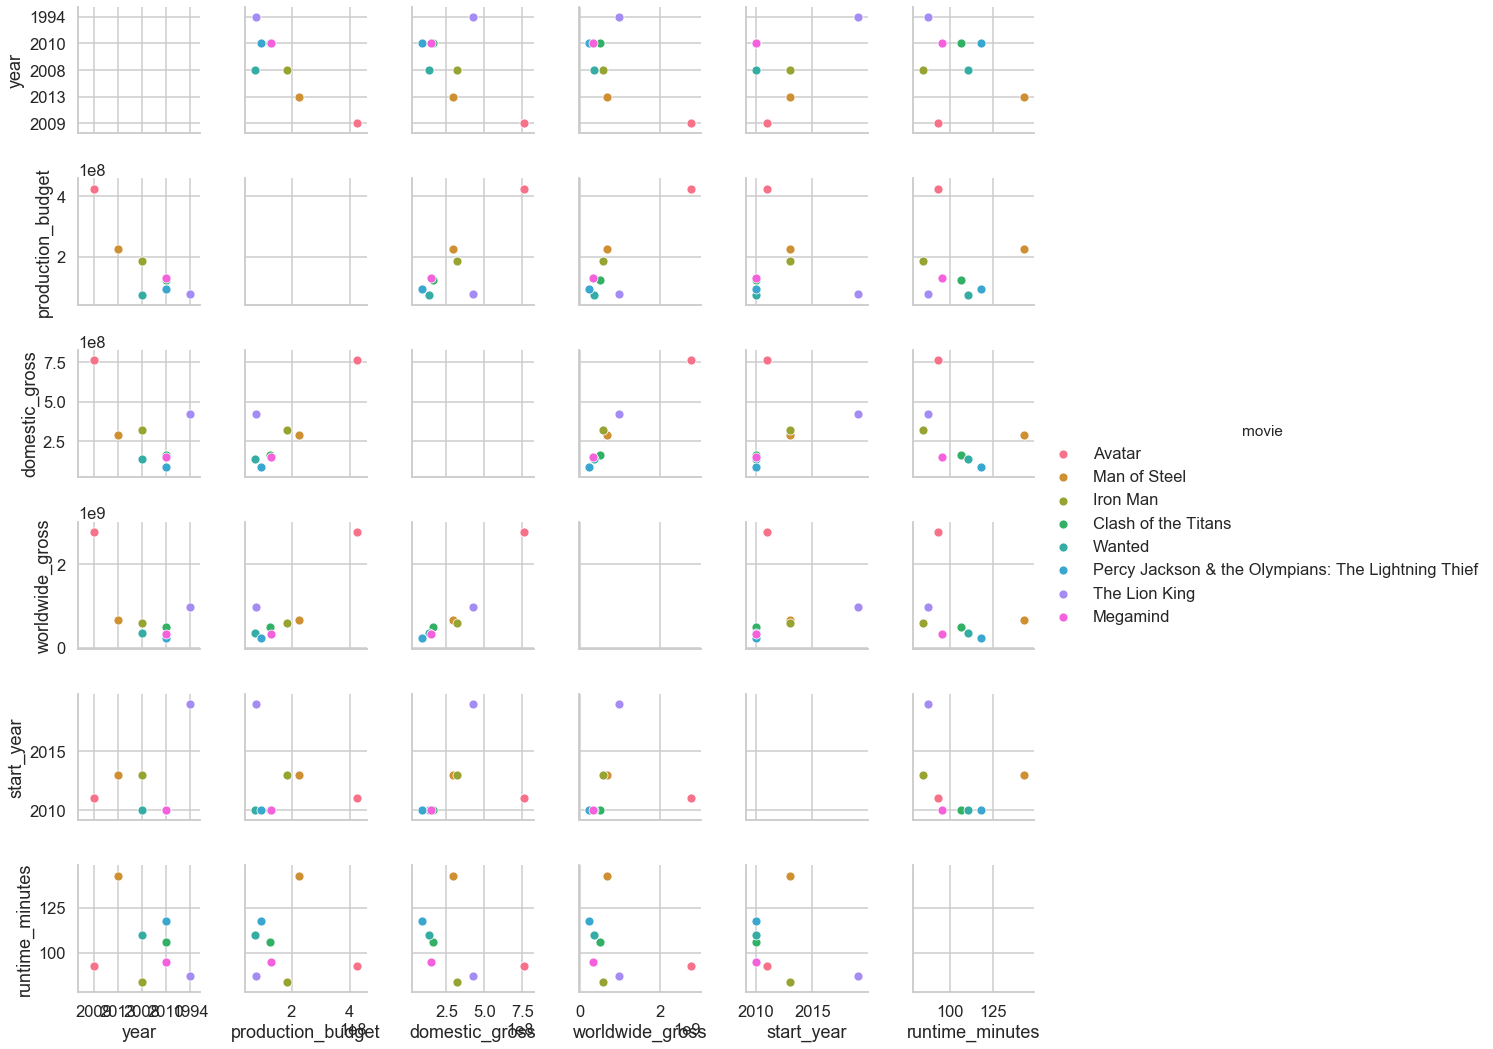

<Figure size 1440x1440 with 0 Axes>

In [212]:
sns.pairplot(hero_top, palette="husl", diag_kind="kde", hue='movie')
plt.figure(figsize=(20,20))

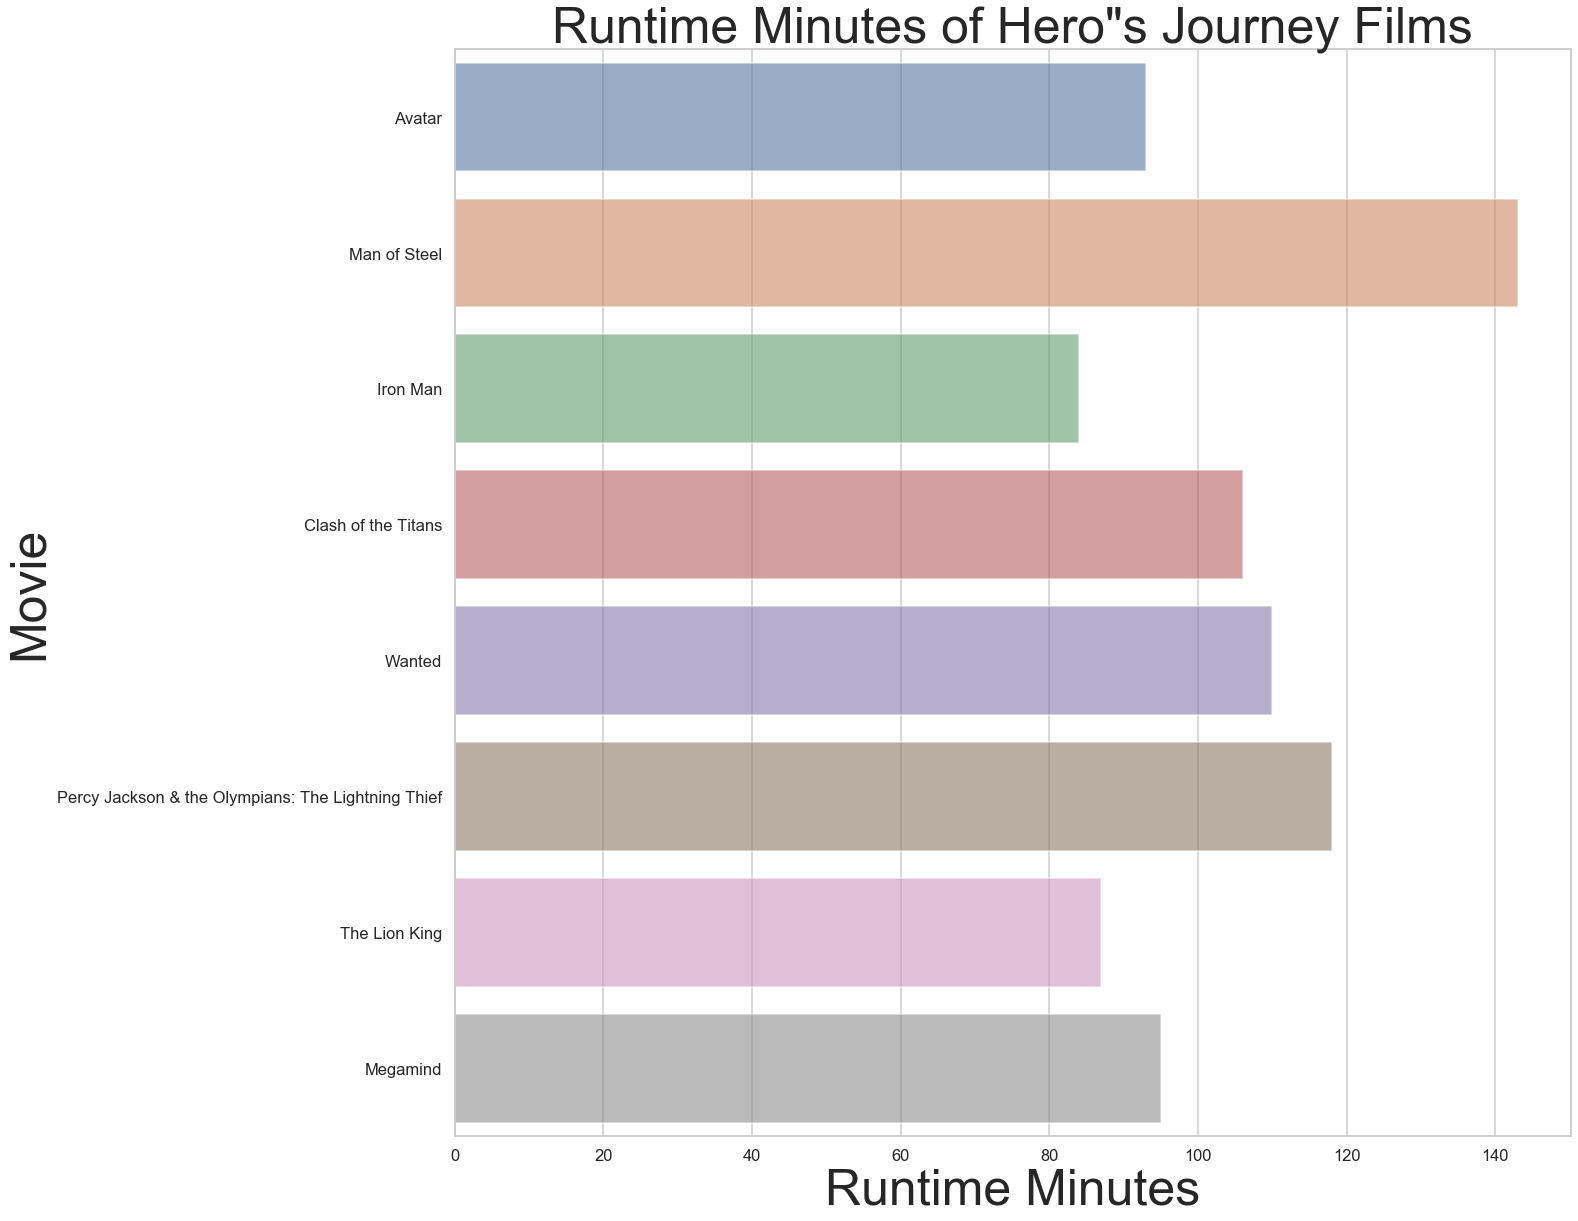

In [213]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(20, 20))
sns.barplot(x=hero_top['runtime_minutes'],
                y=hero_top['movie'], alpha=0.6, palette="deep")
plt.title('Runtime Minutes of Hero"s Journey Films', fontsize=50)
plt.ylabel('Movie', fontsize=50)
plt.xlabel('Runtime Minutes', fontsize=50)
plt.ticklabel_format(style='plain', axis='x')
#plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 0, 'Category')

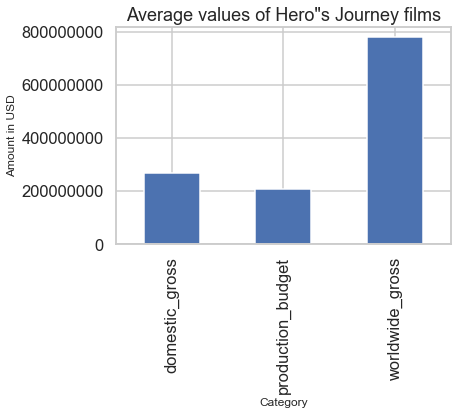

In [214]:
exclude_1 = ['start_year', 'movie', 'runtime_minutes', 'year']
df_prod_100.loc[:, hero_top.columns.difference(
    exclude_1)].mean().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average values of Hero"s Journey films')
plt.ylabel('Amount in USD', fontsize=12)
plt.xlabel('Category', fontsize=12)

AttributeError: This method only works with the ScalarFormatter.

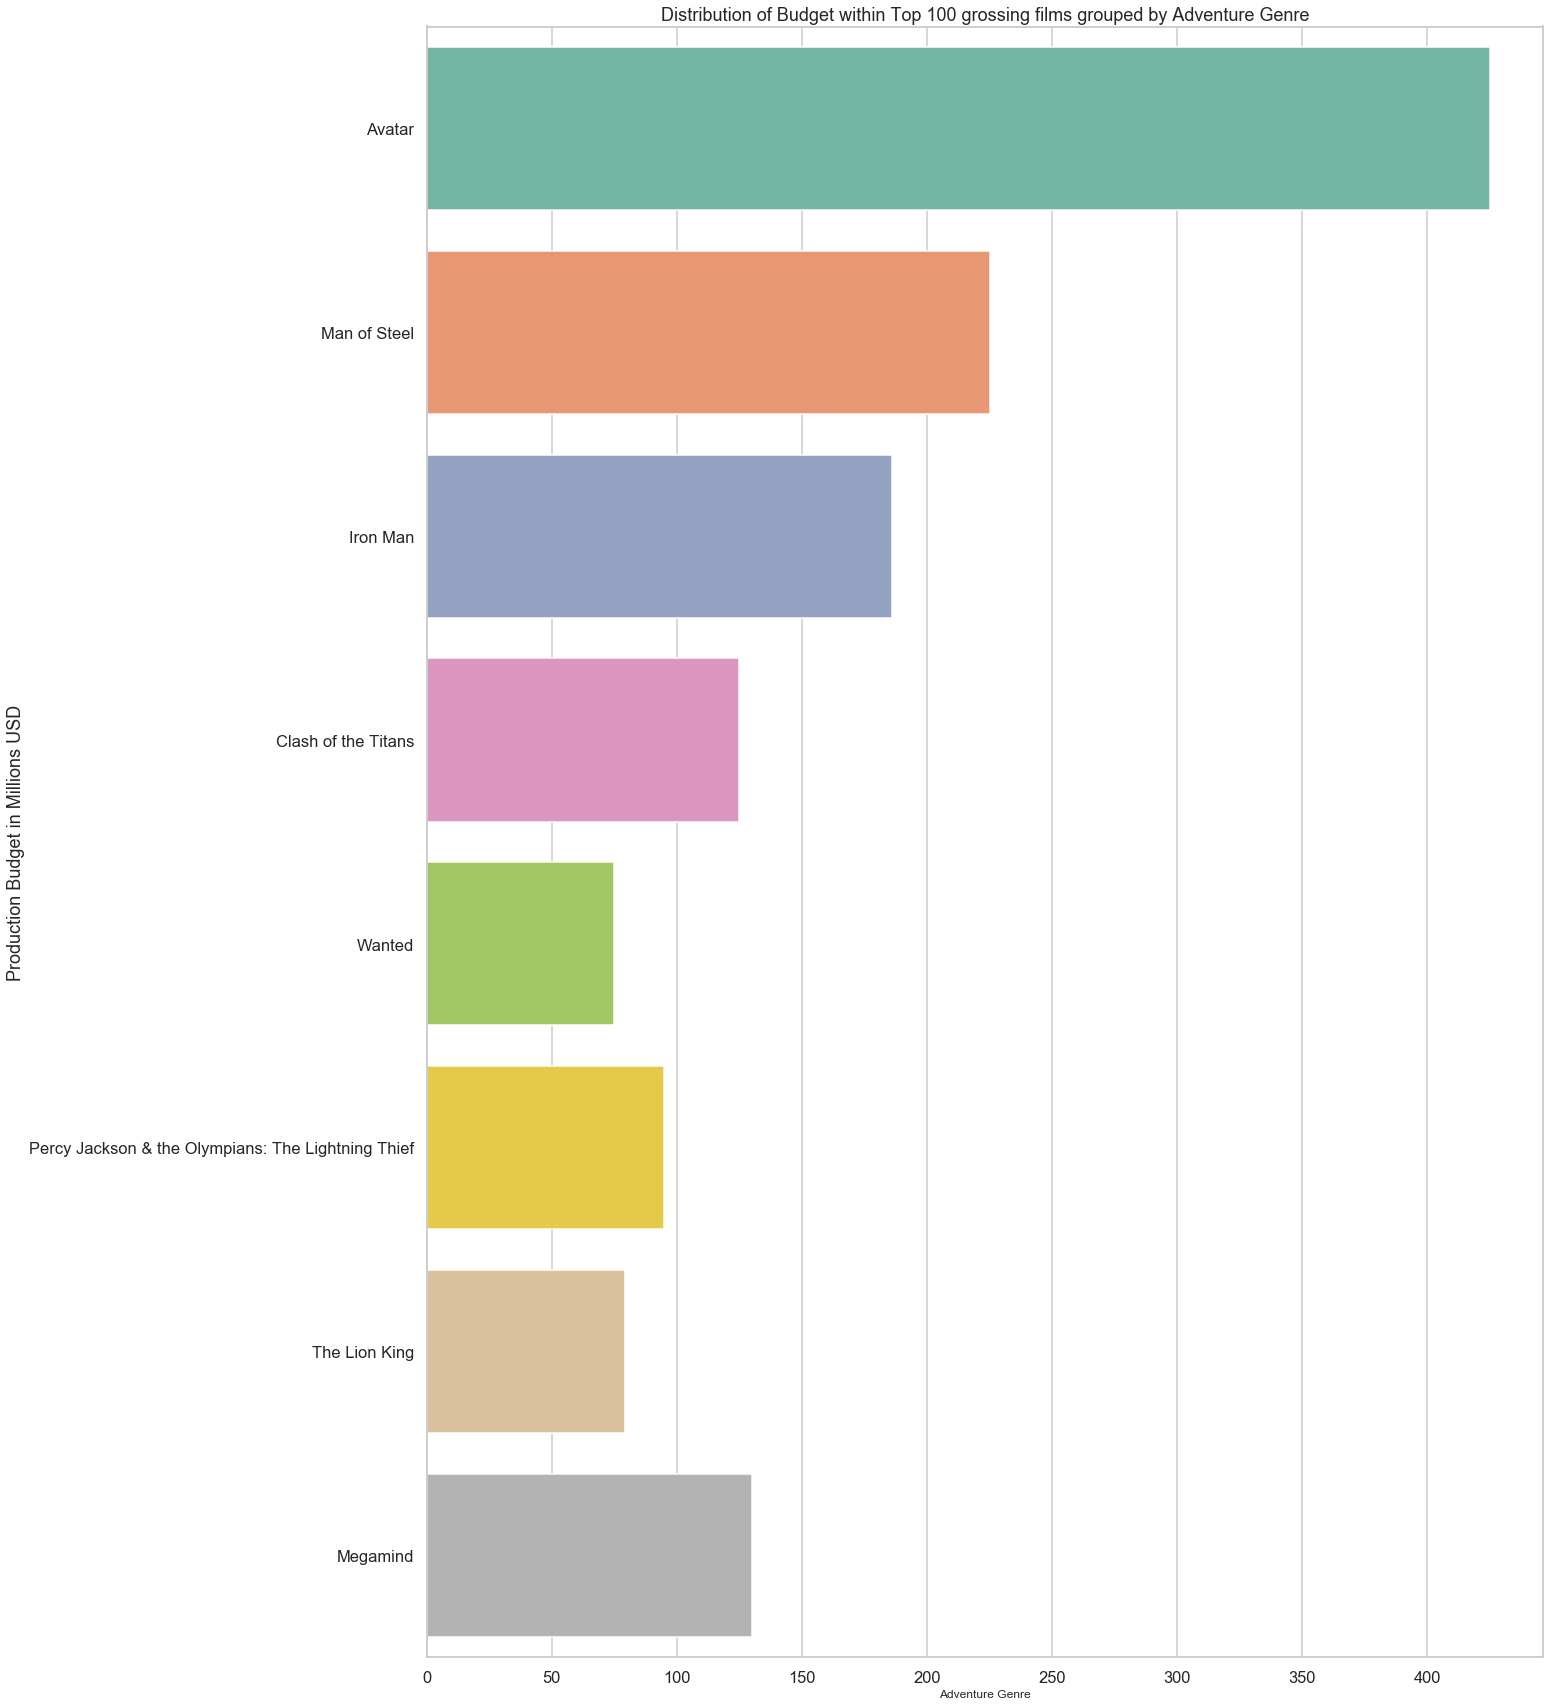

In [215]:
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(20, 30))
sns.barplot(x=hero_top['production_budget']/1000000, y=hero_top['movie'], palette="Set2")
plt.title('Distribution of Budget within Top 100 grossing films grouped by Adventure Genre')
plt.xlabel('Adventure Genre', fontsize=12)
plt.ylabel('Production Budget in Millions USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Hero's Journey Film Insights

# Conclusion